In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import powerlaw

In [2]:
#Defining the functions
def extractorYear(year):
    return(int(str(year)[:4]))

def extractorWeek(year):
    return(int(str(year)[4:]))

In [3]:
# Path for all the results
path_cent = "/home/ubuntu/NSProject/dataset/dataset-new/stage/Stats/Centrality"
path_close = "/home/ubuntu/NSProject/dataset/dataset-new/stage/Stats/Closeness"
path_degrees_stats = "/home/ubuntu/NSProject/dataset/dataset-new/stage/Stats/Degrees"
path_eigen = "/home/ubuntu/NSProject/dataset/dataset-new/stage/Stats/Eigenvector"
path_attrib = "/home/ubuntu/NSProject/dataset/dataset-new/stage/Attributes"

#Only the first week for the Degree Distribution
path_degrees = "/home/ubuntu/NSProject/dataset/dataset-new/stage/Degrees/"

#Path for the Plots
path_plots = "/home/ubuntu/NSProject/dataset/dataset-new/Plots/"

In [4]:
#Files
f_cent = glob.glob(path_cent + "/*/*.csv")
f_close = glob.glob(path_close + "/*/*.csv")
f_degrees_stats = glob.glob(path_degrees_stats + "/*/*.csv")
f_eigen = glob.glob(path_eigen + "/*/*.csv")
f_attrib = glob.glob(path_attrib + "/*/*.csv")
f_degrees = glob.glob(path_degrees+"/date=20221/*.csv")

In [5]:
#Initializing the DataFrames
df_cent = []
df_close = []
df_degrees_stats = []
df_eigen = []
df_attrib = []
df_degrees = []

In [6]:
for fname in f_cent:
    df_ce = pd.read_csv(fname, index_col=None, header=0)
    df_cent.append(df_ce)

for fname in f_close:
    df_cl = pd.read_csv(fname, index_col=None, header=0)
    df_close.append(df_cl)

for fname in f_degrees_stats:
    df_des = pd.read_csv(fname, index_col=None, header=0)
    df_degrees_stats.append(df_des)

for fname in f_eigen:
    df_e = pd.read_csv(fname, index_col=None, header=0)
    df_eigen.append(df_e)

for fname in f_attrib:
    df_a = pd.read_csv(fname, index_col=None, header=0)
    df_attrib.append(df_a)

for fname in f_degrees:
    df_de = pd.read_csv(fname, index_col=None, header=0)
    df_degrees.append(df_de)

In [7]:
frame_cent = pd.concat(df_cent, axis=0, ignore_index=True)
frame_close = pd.concat(df_close, axis=0, ignore_index=True)
frame_degrees_stats = pd.concat(df_degrees_stats, axis=0, ignore_index=True)
frame_eigen = pd.concat(df_eigen, axis=0, ignore_index=True)
frame_attrib = pd.concat(df_attrib, axis=0, ignore_index=True)
frame_degrees = pd.concat(df_degrees, axis=0, ignore_index=True)

In [8]:
frame_cent["year"]=frame_cent.time_week.apply(extractorYear)
frame_cent["week"]=frame_cent.time_week.apply(extractorWeek)

frame_close["year"]=frame_close.time_week.apply(extractorYear)
frame_close["week"]=frame_close.time_week.apply(extractorWeek)

frame_degrees_stats["year"]=frame_degrees_stats.time_week.apply(extractorYear)
frame_degrees_stats["week"]=frame_degrees_stats.time_week.apply(extractorWeek)

frame_eigen["year"]=frame_eigen.time_week.apply(extractorYear)
frame_eigen["week"]=frame_eigen.time_week.apply(extractorWeek)

frame_attrib["year"]=frame_attrib.time_week.apply(extractorYear)
frame_attrib["week"]=frame_attrib.time_week.apply(extractorWeek)

frame_degrees["year"]=frame_degrees.time_week.apply(extractorYear)
frame_degrees["week"]=frame_degrees.time_week.apply(extractorWeek)

In [9]:
final_cent = frame_cent.sort_values(by=['year','week'])
final_close = frame_close.sort_values(by=['year','week'])
final_degrees_stats = frame_degrees_stats.sort_values(by=['year','week'])
final_eigen = frame_eigen.sort_values(by=['year','week'])
final_attrib = frame_attrib.sort_values(by=['year','week'])
df_degree_distribution = frame_degrees.sort_values(by=['year','week'])

In [10]:
ex_cent = final_cent[((final_cent.year == 2018) & (final_cent.week < 26)) | ((final_cent.year == 2022) & (final_cent.week > 34))]
ex_close = final_close[((final_close.year == 2018) & (final_close.week < 26)) | ((final_close.year == 2022) & (final_close.week > 34))]
ex_degrees_stats= final_degrees_stats[((final_degrees_stats.year == 2018) & (final_degrees_stats.week < 26)) | ((final_degrees_stats.year == 2022) & (final_degrees_stats.week > 34))]
ex_eigen = final_eigen[((final_eigen.year == 2018) & (final_eigen.week < 26)) | ((final_eigen.year == 2022) & (final_eigen.week > 34))]
ex_attrib = final_attrib[((final_attrib.year == 2018) & (final_attrib.week < 26)) | ((final_attrib.year == 2022) & (final_attrib.week > 34))]


df_centrality = pd.merge(final_cent, ex_cent, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
df_closeness = pd.merge(final_close, ex_close, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
df_degrees_statistics = pd.merge(final_degrees_stats, ex_degrees_stats, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
df_eigenvector = pd.merge(final_eigen, ex_eigen, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
df_attributes = pd.merge(final_attrib, ex_attrib, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [11]:
#Determine the date
df_centrality['date'] = pd.to_datetime(df_centrality.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df_centrality.week*7, unit='days')
df_closeness['date'] = pd.to_datetime(df_closeness.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df_closeness.week*7, unit='days')
df_degrees_statistics['date'] = pd.to_datetime(df_degrees_statistics.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df_degrees_statistics.week*7, unit='days')
df_eigenvector['date'] = pd.to_datetime(df_eigenvector.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df_eigenvector.week*7, unit='days')
df_attributes['date'] = pd.to_datetime(df_attributes.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df_attributes.week*7, unit='days')

# Plots

## Basic Statistics

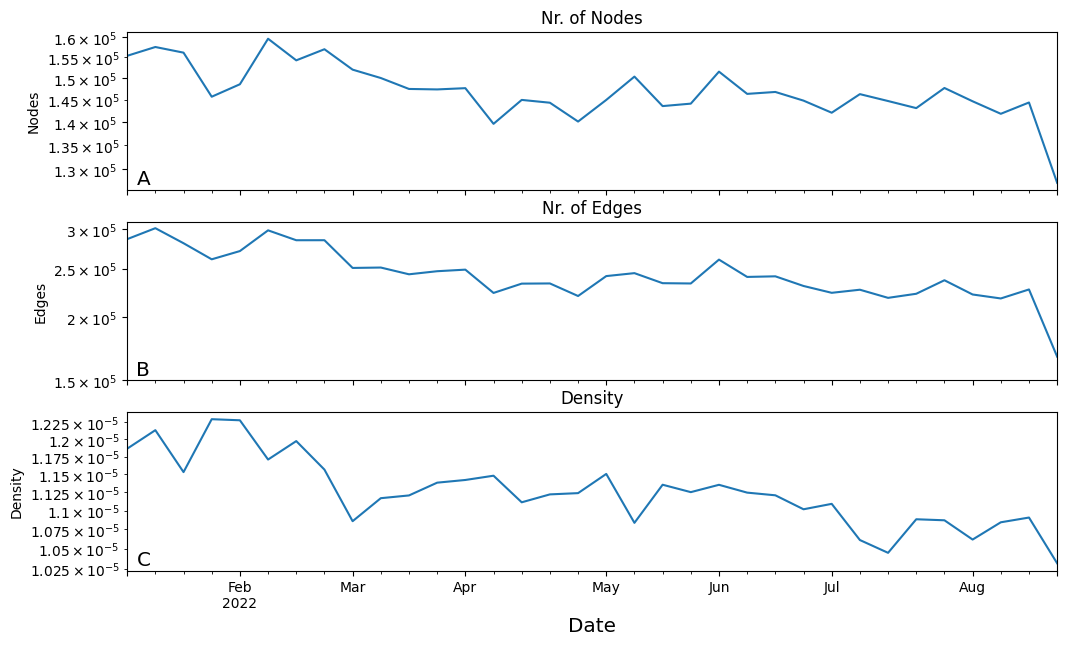

In [12]:
#Nodes, Edges, Density
figsize = (12, 7)
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
#fig.suptitle("Basic Statistics")
df_degrees_statistics.plot(x="date", y="nr_nodes", ax=ax1, figsize=figsize, legend=None, title="Nr. of Nodes", ylabel="Nodes")
df_degrees_statistics.plot(x="date", y="nr_edges", ax=ax2, figsize=figsize, legend=None, title="Nr. of Edges", ylabel="Edges")
df_degrees_statistics.plot(x="date", y="density", ax=ax3, figsize=figsize, legend=None, title="Density", ylabel="Density")

ax1.set_yscale("log")
ax1.set_yticks([1.3e5, 1.4e5, 1.5e5, 1.6e5])
ax1.text(0.01, 0.01, "A", size= "x-large", horizontalalignment='left', verticalalignment='bottom', transform=ax1.transAxes)
ax2.set_yscale("log")
ax2.set_yticks([1.5e5, 2e5, 2.5e5, 3e5])
ax2.text(0.01, 0.01, "B", size= "x-large", horizontalalignment='left', verticalalignment='bottom', transform=ax2.transAxes)
ax3.set_yscale("log")
ax3.text(0.01, 0.01, "C", size= "x-large", horizontalalignment='left', verticalalignment='bottom', transform=ax3.transAxes)

ax3.set_xlabel('Date', size="x-large")
plt.savefig(path_plots+"Basic Statistics.png", bbox_inches='tight')
plt.show()


# Degree Distribution

In [13]:
g_deg =[50954, 1, 1, 1, 1, 11, 1, 2, 801, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 16255, 9, 386, 1, 1, 1, 1, 1, 1, 6, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 24, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 23, 90, 1, 825, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 314, 1, 1, 1, 1, 1, 1, 1, 1, 6, 16838, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 42, 26, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1169, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 319, 1, 1, 1, 481, 1496, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 35, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 766, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 20, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 458, 2, 1, 1, 1, 13, 1, 1, 1, 1, 1, 1, 1, 7, 624, 1, 1, 1, 2, 481, 11, 3124, 1, 3, 3210, 4, 25, 3, 31, 13, 9, 138, 6, 744, 4, 3530, 13, 5753, 3, 5, 4392, 9, 235, 35, 201, 4, 4307, 1, 4, 4, 10, 4, 32, 6, 7, 868, 400, 4, 66, 5, 149, 4, 3, 1009, 2, 1, 1, 1, 4, 6, 3360, 14, 17, 331, 2, 3, 308, 1, 31, 327, 16, 38, 3, 5, 1133, 2, 7, 18, 11, 7, 144, 19, 7, 39, 11, 707, 1696, 8, 16, 415, 2, 21, 393, 7, 38, 184, 67, 40, 7, 24, 3, 4, 1, 1, 1, 5, 1, 8, 1, 2, 358, 7, 5, 80, 144, 1, 8, 5407, 1, 4, 3, 25, 401, 6, 4, 262, 21, 340, 1, 136, 61, 7, 12, 206, 1313, 1, 1, 2, 8, 3, 3, 5, 5, 3, 36, 153, 4, 7, 1, 17, 4, 4126, 1042, 1, 2, 16, 4293, 3, 28, 2, 8304, 111, 47, 5, 2, 9, 71, 17, 3, 1, 12, 70, 7, 3, 10, 385, 3, 7, 104, 3, 13, 6, 4, 10, 31, 17, 4, 1, 1, 1, 1, 4, 11, 269, 1, 6, 6, 4, 6, 514, 4, 6, 1386, 6, 13, 8, 6, 12, 1652, 6, 2, 5, 1, 42, 3, 1, 9, 4, 735, 22, 6, 320, 5, 2, 203, 51, 30, 4, 5, 12, 23, 5, 12, 19, 1, 5, 5, 2, 9, 3, 11, 5, 15, 13, 7, 61, 4, 285, 51, 1, 9, 11, 4, 7, 14, 7, 9, 11, 199, 1, 2, 5, 2, 2, 4, 244, 6, 4, 2, 30, 681, 2, 156, 114, 4, 578, 5, 11, 5, 1, 2, 2, 7, 881, 5, 5, 7, 287, 8, 305, 9, 201, 130, 7, 90, 4, 3, 5, 19, 3, 9, 3, 9, 9, 3, 1, 12, 127, 6, 15, 106, 5, 86, 8, 650, 3, 4, 9, 307, 19, 4, 2, 713, 12, 16, 4, 600, 48, 7, 9, 9, 49, 218, 1, 327, 2, 10, 2, 2, 19, 15, 2, 1534, 2, 7, 370, 1229, 14, 1, 17, 9, 678, 13, 34, 213, 14, 388, 1, 1, 5, 1, 8, 13, 4, 5, 26, 15, 88, 3, 3, 569, 20, 104, 13, 4, 1, 22, 12, 2, 8, 30, 4, 27, 18, 5, 1, 3, 1320, 9, 5, 3, 1, 5, 157, 5, 232, 1, 5, 7, 2, 14, 3, 4, 3, 718, 22, 27, 167, 6, 57, 11, 65, 7, 4, 114, 2, 12, 2, 9, 4, 12, 11, 2, 20, 2, 6, 11, 4, 2, 14, 207, 1, 1, 8, 88, 2, 2, 8, 26, 34, 1, 12, 2, 5, 442, 6, 931, 7, 10, 13, 2, 7, 1, 7, 11, 13, 10, 27, 6, 3, 18, 5, 4, 75, 11, 4, 12, 8, 115, 37, 52, 3, 1046, 2, 2, 5, 1, 3, 5, 3, 228, 14, 10, 6, 5784, 6, 2, 8, 4, 21, 3, 12, 16, 5, 19, 2, 1, 1737, 1, 1, 35, 1, 4, 4, 13, 4, 2, 1, 8, 1, 16, 6, 1, 1, 7, 4, 1, 5, 4, 8, 9, 23, 6, 16, 101, 11, 1, 5, 3, 4, 1, 7, 22, 2, 4, 4, 7, 22, 27, 52, 2, 1, 1, 1, 1, 1, 1, 1466, 1, 1, 1, 1, 1, 671, 2, 1, 3, 1, 87, 89, 3, 5, 4, 2, 680, 7, 3, 2, 1, 30, 8, 64, 2, 32, 3, 4, 5, 8, 18, 7, 2, 14, 5, 16, 28, 119, 32, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 172, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 6, 1, 1, 9, 3, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 71, 1, 1, 1, 1, 1, 9, 15, 69, 1, 1, 1, 1, 1, 16, 1, 1, 310, 135, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 9, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 27, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 178, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 7, 2, 101, 4, 1, 8, 186, 2, 1753, 64, 1, 2, 15, 8, 1, 19, 15, 21, 3, 7, 1, 9, 7, 7, 93, 205, 3, 28, 7, 83, 16, 10, 4, 1, 5, 2, 92, 75, 4, 1, 1, 1, 1, 1, 1, 14, 64, 1, 1, 1, 1, 1, 1, 1, 4, 4, 134, 1, 8, 16, 96, 11, 92, 57, 8, 11, 4, 1, 8, 2, 1, 14, 5, 29, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 804, 17, 153, 7, 12, 5, 6, 10, 187, 5, 55, 6, 8, 7, 198, 1, 6, 3, 9, 3, 1, 2, 22, 114, 3, 36, 22, 3, 12, 31, 8, 156, 12, 4, 4, 2, 29, 5, 11, 1, 3, 6, 5, 4, 8, 8, 163, 3, 7, 4, 6, 13, 11, 1, 2, 31, 15, 21, 1, 1, 3, 337, 2, 1, 1, 16, 8, 3, 7, 9, 14, 12, 12, 3, 90, 1, 2, 8, 1, 8, 1, 5, 1, 1, 1, 1, 1, 54, 10, 2, 1, 109, 2, 1, 12, 8, 4, 80, 63, 3, 10, 1, 1, 5, 10, 5, 40, 7, 14, 1, 28, 301, 17, 207, 101, 694, 2, 6, 2, 3, 3, 6, 8, 5, 4, 9, 2, 14, 22, 4, 77, 6, 1, 2, 1, 2, 4, 3, 48, 18, 8, 14, 17, 9, 5, 45, 8, 7, 16, 14, 11, 5, 1, 2, 322, 4, 1, 2, 41, 152, 2, 4, 1, 12, 1, 1, 8, 14, 1, 5, 15, 37, 1, 10, 2, 140, 9, 18, 18, 1, 30, 6, 61, 3, 2, 13, 4, 12, 4, 11, 4, 4, 8, 67, 23, 158, 2, 15, 1, 1, 1, 1, 1, 2, 4, 4, 11, 6, 2, 6, 37, 2, 9, 6, 2, 16, 2, 3, 11, 1, 3, 9, 339, 5, 1, 10, 2, 1, 44, 1, 19, 10, 10, 8, 10, 3, 2, 4, 4, 4, 10, 236, 305, 5, 8, 4, 2, 17, 232, 2, 522, 6, 27, 14, 113, 1, 9, 5, 3, 6, 6, 6, 1, 46, 1, 3, 7, 7, 7, 8, 65, 2, 498, 27, 10, 24, 9, 497, 4, 27, 4, 2, 4, 6, 17, 2, 7, 2, 24, 7, 10, 11, 2, 3, 14, 5, 10, 6, 11, 21, 1, 15, 10, 3, 1, 25, 10, 6, 1, 3, 1, 5, 9, 5, 39, 2, 224, 7, 5, 3, 24, 1, 12, 11, 3, 1, 9, 2, 144, 10, 2, 3, 4, 2, 5, 14, 6, 16, 26, 1260, 4, 103, 1, 11, 5, 27, 8, 31, 6, 7, 2, 34, 4, 3, 18, 2, 2, 5, 1, 23, 2, 75, 31, 3, 12, 6, 6, 1, 4, 2, 3, 6, 6, 8, 5, 5, 6, 2, 3, 1, 8, 7, 4, 9, 3, 7, 5, 1, 14, 40, 2, 9, 37, 36, 4, 11, 2, 8, 20, 2, 7, 2, 1, 3, 10, 178, 4, 1, 4, 50, 4, 4, 6, 14, 2, 4, 2, 1, 10, 17, 1, 4, 1, 1, 1, 2, 1, 1, 1, 14, 1, 1, 1, 1, 6, 1, 1, 1, 10, 104, 2, 1, 3, 14, 1, 13, 8, 7, 4, 10, 8, 12, 14, 9, 7, 10, 9, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 34, 22, 23, 19, 5, 2, 1, 15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 280, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 20, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 8, 92, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 17, 2, 2, 6, 3, 4, 7, 1, 69, 2, 7, 2, 17, 13, 207, 15, 51, 5, 71, 5, 8, 9, 8, 4, 1, 11, 6, 1, 1, 24, 1, 1, 4, 17, 1, 4, 8, 1, 1, 1, 1, 1, 1, 2, 11, 7, 1, 1, 92, 6, 8, 11, 160, 5, 6, 4, 4, 32, 140, 11, 5, 134, 1, 13, 38, 5, 2, 46, 12, 4, 39, 1, 1, 1, 1, 1, 1, 1, 12, 21, 3, 1, 32, 90, 47, 21, 4, 21, 2, 23, 11, 25, 2, 10, 29, 8, 2, 15, 5, 1, 3, 12, 10, 4, 10, 8, 12, 27, 5, 2, 16, 4, 4, 7, 7, 7, 23, 9, 7, 8, 8, 7, 2, 4, 14, 2, 8, 17, 4, 17, 47, 13, 1, 8, 6, 10, 7, 3, 5, 2, 9, 5, 12, 4, 12, 3, 1, 6, 1, 1, 1, 3, 3, 2, 44, 28, 33, 87, 10, 67, 4, 4, 1, 18, 1, 25, 8, 69, 1, 1, 7, 13, 11, 4, 26, 70, 139, 2, 7, 12, 1, 6, 30, 3, 191, 15, 13, 2, 6, 44, 1, 500, 5, 2, 4, 4, 3, 11, 9, 3, 4, 14, 1, 19, 47, 4, 2, 11, 13, 8, 1, 7, 10, 10, 47, 290, 4, 4, 12, 4, 47, 9, 76, 14, 3, 1, 18, 4, 3, 1, 5, 4, 2, 6, 3, 4, 3, 6, 1, 5, 7, 1, 16, 173, 4, 10, 3, 2, 81, 66, 49, 1, 1, 4, 2, 7, 4, 58, 8, 1, 15, 8, 5, 6, 5, 7, 18, 1, 10, 6, 8, 4, 2, 17, 11, 2, 42, 5, 3, 12, 3, 5, 2, 21, 17, 11, 6, 43, 6, 7, 11, 1, 5, 12, 8, 7, 4, 9, 32, 7, 7, 7, 6, 5, 8, 9, 1, 2, 5, 2, 1, 1, 8, 4, 1, 1, 10, 26, 11, 12, 7, 4, 2, 1, 1, 4, 5, 6, 7, 1, 4, 5, 3, 10, 9, 11, 4, 2, 5, 4, 3, 5, 4, 2, 1, 7, 28, 43, 6, 4, 8, 49, 447, 4, 1, 1, 24, 14, 2, 2, 98, 1, 4, 1, 14, 3, 2, 95, 7, 3, 2, 27, 17, 3, 5, 9, 4, 5, 3, 1, 19, 1, 4, 2, 4, 2, 5, 6, 1, 50, 9, 1, 9, 55, 3, 5, 14, 16, 16, 2, 2, 4, 5, 3, 35, 45, 28, 2, 1, 2, 6, 2, 12, 1, 9, 2, 1, 2, 5, 4, 5, 352, 4, 1, 88, 8, 5, 5, 2, 2, 4, 1, 2, 7, 4, 6, 6, 11, 13, 7, 2, 2, 4, 1, 5, 1, 3, 6, 4, 3, 7, 2, 5, 9, 2, 1, 1, 4, 22, 8, 27, 1, 8, 4, 50, 1, 2, 1, 1, 16, 3, 6, 1, 1, 1, 2, 1, 1, 1, 1, 1, 6, 9, 1, 1, 1, 1, 12, 2, 14, 13, 6, 4, 9, 11, 4, 9, 5, 5, 5, 28, 8, 1, 1, 2, 1, 169, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 25, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 5, 16, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 8, 13, 14, 6, 2, 45, 43, 4, 4, 111, 33, 6, 8, 47, 4, 27, 2, 21, 45, 11, 1, 18, 7, 3, 5, 8, 4, 4, 11, 3, 5, 20, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 11, 3, 13, 47, 6, 4, 2, 4, 3, 1, 13, 1, 5, 13, 4, 7, 12, 5, 21, 2, 6, 11, 1, 3, 1, 50, 18, 1, 2, 12, 31, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 8, 4, 6, 13, 8, 29, 8, 1, 1, 3, 11, 28, 7, 6, 14, 7, 1, 3, 7, 4, 11, 2, 1, 3, 61, 11, 1, 5, 2, 4, 10, 14, 7, 2, 11, 54, 4, 6, 5, 16, 1, 6, 2, 8, 12, 4, 1, 5, 164, 1, 1, 18, 2, 4, 30, 8, 47, 14, 1, 2, 11, 21, 13, 31, 6, 1, 3, 8, 4, 16, 1, 2, 1, 1, 1, 1, 9, 1, 1, 2, 2, 13, 14, 1, 1, 12, 8, 245, 1, 1, 6, 2, 9, 5, 7, 5, 7, 1, 2, 12, 37, 26, 10, 38, 3, 1, 5, 1, 6, 3, 5, 4, 2, 7, 5, 7, 42, 1, 10, 8, 9, 4, 8, 6, 16, 203, 2, 16, 11, 114, 1, 1, 5, 11, 1, 5, 1, 10, 5, 5, 3, 7, 4, 4, 6, 1, 1, 22, 15, 7, 5, 39, 2, 7, 3, 53, 111, 22, 17, 1, 19, 8, 2, 4, 6, 4, 3, 5, 12, 2, 11, 2, 2, 42, 6, 10, 30, 5, 1, 2, 7, 6, 7, 14, 1, 12, 5, 2, 11, 28, 13, 4, 32, 8, 10, 5, 4, 1, 4, 10, 5, 8, 10, 8, 4, 19, 6, 13, 35, 7, 4, 18, 4, 27, 7, 5, 4, 2, 3, 10, 2, 2, 32, 1, 2, 6, 2, 4, 6, 5, 3, 25, 14, 1, 17, 53, 4, 10, 4, 10, 8, 4, 16, 4, 8, 6, 10, 29, 2, 1, 4, 10, 5, 8, 2, 2, 12, 10, 6, 4, 6, 11, 15, 12, 14, 3, 1, 9, 3, 1, 11, 2, 8, 11, 2, 4, 7, 6, 8, 20, 13, 6, 15, 7, 8, 8, 111, 1, 1, 1, 2, 29, 1, 15, 2, 1, 2, 2, 3, 4, 3, 2, 9, 13, 11, 101, 8, 3, 5, 141, 4, 7, 10, 4, 7, 1, 6, 4, 7, 5, 8, 5, 21, 2, 7, 12, 101, 1, 4, 29, 3, 14, 1, 18, 4, 1, 2, 112, 2, 54, 20, 4, 2, 3, 4, 51, 9, 4, 155, 15, 5, 36, 6, 28, 56, 1, 5, 9, 4, 100, 4, 1, 1, 4, 3, 41, 2, 1, 55, 54, 10, 9, 8, 9, 215, 6, 1, 1, 1, 1, 15, 37, 1, 1, 9, 19, 1, 1, 1, 18, 1, 1, 3, 30, 13, 8, 14, 7, 6, 4, 8, 13, 6, 6, 8, 1, 6, 9, 12, 6, 5, 10, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 7, 1, 1, 16, 1, 1, 1, 1, 6, 1, 8, 1, 1, 1, 1, 15, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 5, 1, 17, 1, 1, 1, 2, 1, 1, 1, 1, 16, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 13, 1, 1, 1, 1, 1, 2, 1, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 1, 4, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 13, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 1, 2, 1, 1, 1, 1, 1, 1, 22, 1, 1, 1, 1, 1, 1, 1, 74, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 3, 4, 2, 5, 4, 6, 2, 10, 4, 1, 5, 6, 12, 15, 3, 7, 4, 1, 14, 4, 60, 19, 12, 3, 2, 28, 4, 3, 6, 21, 6, 5, 1, 1, 41, 4, 6, 13, 8, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 3, 8, 2, 3, 33, 5, 7, 5, 11, 4, 1, 1, 304, 45, 8, 5, 21, 22, 9, 5, 1, 6, 1, 1, 8, 1, 2, 1, 1, 1, 1, 6, 5, 2, 4, 1, 1, 3, 12, 4, 4, 21, 84, 9, 2, 4, 5, 11, 2, 17, 1, 1, 7, 11, 13, 7, 2, 4, 29, 1, 5, 8, 6, 3, 3, 6, 7, 8, 106, 2, 7, 9, 7, 2, 12, 10, 2, 2, 1, 15, 22, 14, 6, 3, 1, 1, 1, 5, 8, 1, 6, 4, 9, 1, 3, 27, 4, 14, 5, 10, 2, 2, 4, 6, 39, 14, 3, 3, 2, 4, 3, 8, 6, 1, 1, 2, 5, 6, 10, 27, 7, 1, 1, 5, 3, 7, 10, 1, 13, 4, 5, 4, 34, 3, 4, 1, 2, 4, 11, 14, 17, 10, 5, 9, 7, 6, 2, 8, 194, 4, 18, 9, 8, 54, 3, 5, 7, 12, 5, 1, 12, 44, 2, 2, 3, 5, 9, 7, 5, 5, 37, 49, 30, 4, 3, 3, 2, 5, 7, 4, 12, 2, 5, 4, 12, 10, 11, 7, 45, 5, 4, 12, 4, 30, 5, 6, 5, 12, 5, 3, 6, 1, 7, 36, 3, 39, 6, 13, 8, 7, 1, 10, 15, 5, 4, 12, 3, 8, 1, 8, 3, 3, 13, 1, 9, 14, 27, 14, 1, 9, 2, 1, 1, 5, 1, 6, 4, 22, 4, 2, 2, 4, 7, 8, 8, 2, 1, 2, 3, 27, 2, 14, 7, 25, 5, 2, 5, 9, 22, 9, 7, 2, 6, 4, 2, 6, 6, 2, 3, 26, 5, 20, 5, 5, 1, 2, 5, 3, 2, 6, 7, 4, 6, 12, 15, 7, 2, 21, 4, 2, 1, 19, 12, 37, 3, 3, 4, 2, 2, 11, 1, 7, 24, 5, 2, 1, 5, 4, 7, 2, 1, 19, 4, 13, 51, 6, 9, 4, 4, 116, 2, 3, 22, 15, 2, 1, 4, 2, 2, 16, 9, 2, 10, 2, 2, 8, 7, 10, 8, 1, 6, 5, 2, 8, 1, 1, 8, 14, 12, 7, 4, 3, 2, 2, 5, 1, 22, 1, 4, 4, 1, 4, 5, 12, 1, 3, 4, 2, 20, 110, 7, 7, 8, 24, 39, 10, 11, 9, 5, 1, 13, 4, 49, 2, 8, 8, 12, 13, 9, 22, 13, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 23, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 16, 5, 14, 7, 6, 11, 8, 2, 13, 6, 5, 15, 1, 1, 9, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 14, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 1, 1, 1, 1, 1, 1, 1, 1, 6, 16, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 22, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 1, 1, 25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 12, 1, 9, 14, 45, 10, 14, 3, 3, 1, 4, 16, 1, 9, 20, 4, 10, 6, 6, 77, 18, 4, 3, 4, 2, 2, 3, 5, 2, 10, 1, 1, 49, 1, 6, 29, 1, 1, 13, 1, 18, 5, 19, 7, 6, 6, 19, 7, 1, 22, 40, 1, 4, 5, 6, 1, 2, 1, 1, 1, 1, 1, 21, 4, 4, 6, 9, 13, 29, 48, 1, 1, 17, 4, 28, 18, 13, 7, 3, 19, 4, 6, 7, 9, 5, 7, 4, 6, 1, 4, 3, 1, 12, 9, 4, 6, 1, 2, 1, 41, 30, 9, 7, 5, 3, 17, 2, 5, 7, 12, 4, 6, 2, 1, 10, 21, 3, 17, 2, 20, 3, 14, 1, 1, 1, 3, 1, 1, 4, 83, 12, 9, 1, 1, 3, 5, 102, 7, 9, 11, 10, 50, 12, 8, 12, 3, 1, 1, 3, 7, 3, 5, 2, 16, 4, 13, 4, 13, 10, 5, 4, 14, 9, 13, 7, 11, 4, 3, 1, 3, 13, 7, 7, 1, 26, 3, 7, 2, 2, 48, 11, 1, 50, 9, 1, 1, 16, 1, 5, 2, 7, 3, 10, 8, 4, 1, 2, 1, 4, 6, 4, 20, 4, 3, 5, 5, 11, 12, 8, 12, 31, 26, 16, 8, 8, 5, 1, 1, 1, 3, 2, 20, 18, 4, 1, 2, 9, 45, 2, 8, 19, 2, 2, 8, 4, 14, 6, 8, 5, 5, 1, 5, 7, 5, 5, 1, 7, 8, 9, 2, 12, 11, 7, 4, 2, 18, 9, 2, 9, 18, 7, 2, 73, 12, 25, 3, 14, 1, 5, 13, 4, 5, 8, 12, 9, 9, 1, 4, 27, 18, 1, 4, 18, 34, 12, 1, 4, 29, 1, 2, 10, 1, 8, 7, 10, 1, 2, 1, 2, 29, 7, 6, 10, 4, 2, 8, 3, 5, 6, 6, 11, 3, 4, 4, 1, 3, 11, 2, 4, 3, 8, 12, 9, 11, 5, 10, 20, 9, 22, 2, 5, 2, 11, 1, 5, 7, 3, 1, 5, 6, 24, 15, 23, 2, 7, 7, 13, 10, 84, 1, 4, 6, 4, 30, 1, 37, 10, 4, 2, 8, 7, 8, 22, 1, 1, 4, 21, 2, 1, 8, 1, 1, 1, 8, 1, 17, 1, 4, 2, 5, 5, 8, 1, 2, 4, 5, 6, 6, 3, 4, 272, 14, 17, 10, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 14, 8, 1, 12, 8, 4, 8, 16, 9, 9, 13, 2, 3, 2, 5, 2, 10, 1, 21, 47, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 19, 1, 1, 5, 1, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 17, 28, 5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 2, 114, 6, 14, 2, 32, 5, 1, 4, 11, 5, 1, 10, 3, 8, 4, 22, 1, 1, 10, 30, 53, 17, 10, 15, 5, 1, 7, 5, 6, 7, 8, 19, 1, 6, 4, 1, 1, 1, 1, 13, 5, 6, 16, 1, 3, 15, 4, 4, 11, 1, 3, 6, 19, 19, 29, 1, 5, 2, 3, 17, 83, 8, 20, 3, 1, 1, 4, 129, 1, 3, 8, 1, 4, 6, 22, 7, 1, 5, 5, 12, 3, 3, 7, 24, 1, 3, 7, 14, 4, 8, 4, 12, 3, 13, 5, 2, 11, 1, 2, 19, 19, 59, 1, 17, 1, 3, 6, 16, 4, 5, 10, 3, 2, 6, 5, 3, 25, 1, 3, 6, 7, 11, 14, 4, 1, 15, 1, 6, 6, 79, 22, 4, 6, 20, 2, 4, 33, 1, 13, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 6, 4, 10, 1, 5, 4, 66, 8, 1, 19, 17, 4, 11, 8, 2, 2, 1, 4, 71, 24, 3, 4, 6, 21, 3, 13, 2, 16, 10, 4, 34, 4, 9, 4, 1, 9, 2, 10, 5, 21, 4, 4, 4, 3, 8, 13, 2, 32, 4, 5, 1, 1, 4, 5, 11, 10, 7, 1, 4, 11, 1, 6, 4, 5, 1, 4, 7, 2, 2, 16, 15, 2, 4, 2, 1, 1, 6, 2, 4, 27, 4, 2, 4, 1, 3, 9, 37, 2, 2, 2, 9, 89, 2, 7, 2, 7, 2, 4, 15, 5, 1, 4, 1, 8, 2, 1, 4, 10, 4, 6, 2, 2, 1, 1, 6, 1, 1, 6, 18, 1, 5, 5, 6, 7, 3, 7, 4, 1, 1, 7, 3, 1, 13, 5, 12, 3, 10, 2, 4, 25, 4, 3, 1, 6, 9, 1, 5, 25, 6, 3, 5, 16, 1, 6, 2, 6, 2, 1, 2, 7, 11, 1, 16, 1, 5, 1, 2, 2, 5, 4, 6, 20, 2, 11, 9, 1, 2, 2, 14, 5, 2, 5, 29, 1, 16, 22, 7, 1, 2, 4, 18, 3, 1, 27, 2, 7, 12, 1, 1, 11, 30, 3, 7, 1, 1, 3, 11, 4, 11, 9, 3, 37, 8, 4, 11, 6, 9, 1, 2, 10, 5, 6, 5, 6, 3, 8, 5, 5, 3, 13, 79, 36, 1, 3, 3, 5, 9, 9, 1, 5, 8, 5, 3, 1, 3, 5, 5, 1, 34, 6, 7, 5, 2, 18, 1, 13, 6, 9, 2, 1, 3, 4, 10, 18, 10, 3, 3, 7, 6, 1, 9, 14, 4, 13, 7, 8, 5, 8, 6, 4, 10, 6, 10, 1, 3, 6, 1, 1, 1, 14, 1, 1, 5, 1, 1, 1, 1, 1, 4, 1, 32, 31, 10, 7, 4, 3, 3, 8, 2, 4, 10, 1, 6, 12, 5, 10, 32, 5, 1, 4, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 10, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 88, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 4, 34, 11, 7, 10, 9, 77, 29, 29, 26, 7, 3, 3, 69, 8, 11, 4, 4, 8, 1, 15, 90, 17, 3, 10, 9, 22, 3, 4, 4, 6, 13, 1, 1, 1, 1, 1, 22, 1, 6, 1, 1, 1, 1, 1, 7, 6, 7, 9, 2, 12, 37, 1, 1, 1, 1, 2, 1, 2, 1, 293, 1, 38, 16, 24, 1, 1, 1, 9, 6, 4, 3, 12, 3, 15, 9, 8, 7, 12, 14, 16, 37, 4, 10, 7, 37, 13, 4, 2, 1, 18, 90, 11, 2, 10, 31, 16, 1, 3, 2, 3, 5, 1, 9, 7, 12, 2, 7, 2, 6, 141, 6, 1, 2, 4, 17, 20, 5, 12, 1, 4, 1, 24, 5, 2, 1, 1, 1, 1, 1, 6, 4, 8, 2, 10, 5, 3, 12, 1, 1, 3, 9, 12, 7, 26, 11, 2, 25, 3, 5, 6, 5, 1, 1, 7, 2, 22, 2, 73, 6, 43, 8, 7, 4, 2, 12, 5, 2, 17, 5, 8, 7, 8, 19, 6, 8, 5, 19, 6, 5, 4, 2, 38, 14, 23, 2, 7, 3, 5, 2, 1, 5, 13, 5, 5, 8, 3, 7, 1, 1, 13, 1, 16, 3, 10, 92, 1, 15, 5, 12, 8, 8, 8, 4, 6, 7, 7, 3, 5, 4, 6, 6, 9, 4, 2, 21, 13, 2, 8, 1, 7, 5, 12, 2, 4, 6, 2, 2, 22, 11, 11, 3, 5, 2, 17, 2, 7, 26, 4, 12, 3, 5, 10, 62, 4, 20, 51, 5, 2, 2, 24, 8, 9, 3, 2, 2, 13, 11, 22, 32, 13, 2, 1, 18, 5, 45, 7, 4, 1, 2, 1, 4, 3, 1, 1, 1, 2, 2, 2, 7, 1, 3, 6, 1, 9, 1, 5, 1, 5, 7, 4, 6, 1, 34, 8, 1, 2, 1, 5, 1, 4, 30, 6, 5, 7, 1, 1, 2, 1, 3, 2, 7, 2, 2, 4, 3, 1, 3, 34, 5, 6, 3, 4, 4, 5, 7, 10, 7, 9, 8, 2, 29, 1, 73, 24, 4, 6, 12, 2, 8, 2, 1, 6, 21, 8, 18, 3, 2, 30, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 11, 13, 14, 2, 4, 13, 1, 1, 5, 6, 12, 5, 15, 4, 7, 7, 9, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 37, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 24, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 19, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 6, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 18, 4, 4, 2, 4, 1, 9, 27, 9, 9, 19, 4, 1, 6, 17, 5, 88, 4, 4, 1, 4, 14, 2, 9, 19, 4, 4, 3, 3, 2, 1, 1, 2, 10, 1, 2, 1, 2, 5, 1, 9, 1, 2, 8, 3, 13, 10, 3, 2, 16, 53, 81, 37, 1, 3, 15, 6, 22, 16, 3, 4, 6, 2, 2, 9, 2, 8, 15, 1, 1, 1, 1, 1, 1, 5, 1, 6, 4, 5, 3, 3, 6, 34, 3, 1, 6, 5, 3, 4, 6, 17, 62, 2, 11, 10, 11, 13, 1, 4, 5, 8, 1, 5, 4, 3, 9, 2, 2, 1, 1, 6, 57, 12, 21, 10, 1, 3, 2, 11, 22, 2, 6, 1, 7, 3, 1, 1, 6, 5, 3, 1, 23, 8, 16, 3, 1, 13, 7, 4, 1, 2, 1, 13, 1, 17, 2, 2, 2, 2, 54, 11, 1, 1, 4, 2, 14, 10, 1, 2, 7, 5, 29, 2, 7, 3, 4, 25, 8, 7, 10, 4, 7, 41, 3, 19, 14, 10, 4, 9, 21, 102, 6, 5, 10, 14, 3, 7, 11, 12, 8, 5, 6, 2, 7, 9, 1, 2, 1, 7, 8, 6, 7, 5, 2, 5, 5, 3, 12, 1, 1, 5, 2, 6, 3, 4, 5, 6, 8, 8, 1, 2, 6, 1, 4, 9, 5, 8, 2, 8, 1, 3, 1, 20, 1, 2, 1, 4, 1, 8, 12, 4, 8, 5, 7, 2, 3, 6, 4, 11, 9, 4, 16, 5, 8, 23, 2, 21, 23, 4, 17, 5, 39, 9, 8, 8, 1, 1, 4, 11, 3, 18, 11, 9, 3, 23, 2, 31, 3, 14, 1, 3, 4, 2, 2, 11, 15, 41, 46, 1, 2, 3, 3, 3, 4, 1, 12, 8, 5, 2, 6, 4, 3, 8, 1, 2, 11, 11, 2, 11, 12, 1, 1, 6, 4, 1, 24, 4, 4, 1, 2, 1, 7, 6, 5, 7, 2, 37, 7, 19, 2, 2, 2, 19, 62, 1, 6, 19, 2, 5, 5, 7, 5, 1, 1, 1, 2, 1, 2, 3, 24, 8, 9, 12, 12, 28, 6, 8, 4, 1, 2, 50, 4, 23, 67, 4, 10, 4, 4, 5, 4, 5, 3, 6, 4, 13, 4, 8, 5, 1, 7, 9, 6, 9, 7, 4, 3, 6, 16, 13, 7, 2, 1, 3, 2, 6, 12, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 3, 9, 7, 5, 6, 5, 8, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 7, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 66, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 9, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 71, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 19, 1, 6, 1, 5, 1, 4, 4, 4, 1, 3, 4, 147, 2, 40, 49, 4, 14, 22, 4, 4, 7, 4, 4, 7, 21, 11, 7, 53, 1, 1, 3, 1, 1, 20, 22, 38, 31, 1, 1, 1, 2, 5, 1, 9, 7, 15, 6, 7, 24, 9, 14, 13, 53, 23, 107, 1, 1, 1, 1, 1, 11, 1, 1, 4, 20, 4, 16, 3, 1, 1, 24, 6, 3, 1, 4, 4, 2, 1, 2, 1, 17, 3, 4, 6, 1, 2, 1, 5, 6, 18, 3, 2448, 18, 10, 2, 9, 1, 2, 9, 5, 1, 1, 7, 5, 3, 6, 4, 1, 23, 8, 8, 12, 2, 3, 9, 10, 153, 1, 1, 1, 6, 12, 2, 11, 3, 1, 3, 1, 12, 7, 1, 1, 6, 1, 3, 6, 4, 8, 7, 6, 6, 18, 4, 1, 2, 4, 4, 4, 5, 14, 2, 3, 2, 2, 1, 6, 1, 9, 2, 9, 7, 2, 5, 1, 13, 17, 3, 3, 5, 8, 11, 54, 8, 8, 4, 19, 13, 4, 1, 2, 3, 1, 13, 7, 9, 1, 18, 18, 5, 6, 1, 1, 7, 1, 11, 6, 5, 5, 9, 2, 2, 2, 3, 4, 1, 1, 7, 58, 4, 4, 5, 4, 1, 1, 5, 4, 1, 2, 1, 4, 3, 20, 15, 1, 6, 2, 1, 1, 4, 1, 2, 7, 5, 2, 2, 5, 1, 3, 4, 33, 4, 1, 7, 21, 4, 11, 29, 2, 3, 6, 6, 6, 2, 4, 7, 9, 4, 1, 7, 7, 4, 4, 16, 7, 13, 5, 6, 1, 1, 6, 6, 1, 4, 71, 13, 17, 4, 2, 1, 5, 3, 6, 21, 6, 2, 6, 2, 6, 8, 4, 19, 1, 5, 3, 4, 1, 2, 6, 21, 2, 12, 4, 10, 5, 4, 4, 1, 6, 9, 16, 1, 14, 7, 4, 4, 5, 8, 5, 9, 8, 2, 2, 4, 8, 5, 4, 7, 11, 5, 2, 47, 1, 4, 14, 2, 29, 21, 6, 6, 1, 5, 6, 5, 8, 1, 1, 1, 6, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 10, 6, 3, 6, 23, 12, 4, 6, 4, 16, 2, 5, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 30, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 2, 1, 1, 1, 6, 6, 1, 1, 4, 1, 1, 1, 14, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 28, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 19, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 15, 9, 11, 1, 5, 10, 4, 48, 5, 7, 3, 6, 20, 27, 3, 1, 5, 4, 6, 20, 5, 1, 6, 1, 1, 1, 1, 1, 1, 18, 17, 11, 6, 4, 1, 1, 2, 6, 10, 1, 5, 4, 1, 9, 1, 2, 6, 1, 1, 5, 22, 4, 11, 1, 2, 2, 4, 1, 8, 11, 7, 8, 10, 9, 8, 4, 2, 10, 10, 13, 9, 10, 6, 1, 20, 22, 6, 25, 76, 4, 7, 6, 10, 3, 17, 7, 25, 8, 1, 11, 5, 1, 3, 1, 1, 1, 12, 1, 3, 34, 14, 16, 4, 1, 2, 8, 11, 12, 3, 5, 4, 2, 2, 4, 16, 5, 2, 3, 7, 2, 4, 23, 5, 2, 31, 4, 4, 2, 1, 6, 3, 3, 1, 12, 5, 2, 21, 5, 5, 22, 32, 2, 17, 2, 4, 6, 2, 5, 5, 9, 2, 8, 2, 11, 2, 2, 9, 1, 5, 7, 12, 2, 9, 3, 4, 2, 9, 10, 1, 1, 11, 31, 8, 5, 12, 2, 1, 1, 1, 1, 1, 32, 18, 17, 1, 8, 1, 10, 8, 4, 4, 1, 1, 5, 6, 10, 7, 4, 8, 9, 6, 2, 25, 15, 3, 1, 8, 7, 2, 36, 10, 12, 6, 3, 26, 5, 17, 6, 12, 2, 2, 3, 5, 2, 7, 8, 4, 2, 1, 3, 8, 3, 16, 5, 3, 5, 2, 1, 7, 4, 2, 5, 1, 10, 1, 5, 4, 13, 8, 9, 9, 1, 9, 9, 2, 4, 3, 1, 1, 4, 1, 4, 1, 5, 2, 2, 6, 2, 3, 7, 4, 6, 1, 2, 8, 4, 3, 2, 1, 3, 5, 1, 35, 18, 2, 3, 8, 9, 3, 12, 5, 4, 18, 10, 11, 19, 4, 2, 9, 2, 9, 11, 4, 4, 2, 16, 2, 7, 5, 5, 4, 2, 2, 1, 5, 5, 4, 4, 1, 1, 2, 8, 2, 1, 22, 5, 35, 13, 5, 2, 22, 16, 1, 1, 5, 1, 11, 1, 1, 1, 1, 1, 1, 1, 7, 4, 1, 1, 1, 1, 5, 1, 1, 2, 8, 2, 11, 9, 6, 9, 3, 10, 10, 5, 1, 8, 3, 12, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 6, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 13, 1, 1, 1, 1, 1, 19, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 28, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 8, 65, 5, 9, 6, 6, 5, 11, 10, 9, 1, 1, 7, 10, 3, 11, 3, 3, 5, 7, 1, 2, 1, 1, 1, 1, 5, 6, 1, 1, 1, 4, 1, 3, 1, 6, 1, 15, 7, 3, 8, 4, 21, 6, 4, 22, 30, 6, 8, 3, 20, 8, 1, 1, 1, 1, 1, 16, 1, 6, 4, 5, 1, 5, 5, 14, 5, 1, 1, 10, 14, 8, 3, 1, 7, 85, 2, 1, 9, 6, 4, 7, 5, 4, 3, 4, 12, 10, 2, 3, 4, 1, 3, 2, 5, 7, 6, 4, 3, 18, 7, 3, 2, 4, 6, 20, 8, 6, 7, 5, 1, 6, 11, 4, 1, 11, 1, 6, 9, 2, 7, 1, 1, 2, 2, 3, 38, 1, 1, 1, 19, 7, 1, 14, 2, 2, 4, 9, 8, 5, 23, 1, 1, 38, 2, 3, 6, 2, 14, 1, 1, 4, 2, 2, 2, 2, 11, 3, 7, 7, 13, 11, 6, 24, 1, 5, 1, 4, 6, 1, 4, 9, 5, 2, 2, 6, 1, 1, 1, 6, 2, 2, 8, 1, 3, 2, 3, 14, 9, 2, 6, 1, 6, 2, 1, 11, 2, 4, 4, 1, 11, 6, 5, 5, 5, 4, 4, 8, 6, 1, 1, 1, 4, 3, 2, 12, 1, 17, 13, 5, 8, 3, 31, 6, 5, 1, 3, 18, 4, 4, 11, 1, 11, 3, 7, 7, 5, 4, 6, 4, 6, 3, 21, 1, 2, 3, 5, 7, 6, 1, 2, 6, 3, 2, 2, 4, 3, 5, 4, 4, 2, 6, 4, 4, 27, 1, 3, 2, 1, 2, 9, 4, 22, 2, 5, 5, 1, 2, 15, 13, 2, 2, 4, 13, 4, 6, 5, 5, 3, 1, 2, 1, 4, 15, 12, 6, 3, 1, 4, 1, 6, 4, 2, 6, 13, 2, 17, 30, 22, 23, 33, 3, 3, 2, 60, 9, 3, 1, 5, 2, 7, 3, 7, 1, 2, 16, 6, 8, 4, 5, 1, 6, 56, 14, 2, 7, 37, 4, 7, 11, 2, 6, 2, 2, 10, 7, 9, 3, 13, 20, 7, 12, 5, 9, 1, 1, 1, 8, 1, 1, 1, 1, 6, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 2, 2, 19, 3, 4, 4, 2, 11, 5, 18, 8, 7, 5, 8, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 77, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 15, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 7, 1, 8, 6, 3, 4, 7, 8, 6, 9, 7, 3, 1, 2, 11, 15, 1, 7, 4, 4, 6, 12, 15, 1, 1, 1, 8, 7, 5, 13, 4, 2, 5, 110, 1, 3, 4, 3, 7, 3, 1, 4, 11, 5, 4, 6, 2, 3, 8, 6, 8, 5, 10, 3, 21, 1, 1, 4, 1, 1, 1, 9, 1, 1, 1, 9, 6, 12, 4, 10, 2, 22, 2, 1, 1, 13, 1, 17, 6, 5, 4, 9, 1, 8, 3, 10, 3, 9, 2, 3, 27, 20, 5, 6, 1, 20, 10, 13, 2, 6, 36, 6, 1, 5, 1, 3, 5, 1, 8, 1, 6, 8, 1, 9, 24, 30, 9, 3, 5, 3, 1, 1, 1, 1, 47, 16, 11, 1, 1, 3, 1, 11, 9, 1, 4, 2, 2, 5, 8, 4, 9, 4, 13, 1, 9, 2, 1, 5, 7, 66, 4, 1, 6, 4, 2, 3, 7, 2, 2, 2, 20, 3, 1, 1, 13, 5, 6, 3, 24, 6, 1, 4, 4, 4, 7, 8, 13, 35, 2, 5, 13, 4, 42, 1, 3, 22, 13, 2, 1, 4, 6, 11, 3, 9, 8, 10, 8, 9, 7, 5, 11, 3, 4, 1, 5, 1, 4, 2, 2, 2, 7, 8, 3, 12, 4, 8, 8, 1, 1, 5, 4, 1, 17, 4, 2, 12, 11, 3, 12, 2, 2, 7, 2, 7, 2, 1, 5, 3, 12, 28, 6, 2, 5, 3, 2, 2, 2, 12, 6, 5, 1, 5, 4, 6, 2, 23, 3, 1, 1, 6, 2, 2, 6, 2, 2, 4, 6, 40, 10, 2, 10, 1, 10, 8, 8, 12, 1, 9, 3, 6, 7, 5, 1, 7, 5, 2, 2, 3, 5, 16, 9, 11, 25, 2, 5, 2, 3, 1, 7, 10, 11, 10, 5, 6, 1, 1, 2, 12, 3, 4, 4, 14, 6, 6, 14, 5, 3, 4, 3, 2, 1, 7, 1, 6, 1, 3, 3, 3, 3, 5, 10, 22, 6, 3, 1, 1, 2, 14, 13, 1, 7, 14, 4, 12, 2, 13, 3, 7, 1, 3, 3, 7, 1, 8, 3, 2, 1, 2, 3, 1, 89, 1, 13, 4, 1, 5, 1, 1, 1, 1, 13, 9, 1, 2, 1, 1, 22, 6, 1, 1, 22, 1, 1, 1, 1, 1, 1, 4, 3, 5, 9, 13, 3, 9, 14, 5, 8, 2, 2, 4, 6, 15, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 2, 7, 3, 7, 1, 10, 11, 3, 9, 4, 13, 4, 14, 1, 1, 4, 10, 4, 1, 4, 4, 7, 29, 5, 4, 4, 8, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 3, 1, 1, 6, 1, 1, 4, 9, 2, 2, 7, 1, 10, 19, 1, 6, 7, 1, 1, 5, 1, 1, 1, 1, 1, 20, 1, 7, 33, 1, 1, 12, 4, 9, 2, 3, 5, 1, 2, 6, 11, 4, 2, 4, 5, 1, 2, 6, 7, 2, 7, 1, 2, 12, 4, 5, 14, 4, 5, 10, 5, 2, 9, 2, 9, 2, 8, 1, 1, 1, 1, 1, 6, 11, 49, 9, 3, 3, 5, 1, 7, 1, 1, 1, 1, 7, 2, 7, 8, 4, 1, 8, 7, 16, 2, 5, 8, 2, 1, 1, 6, 2, 28, 5, 3, 5, 8, 4, 6, 42, 4, 3, 1, 27, 9, 1, 4, 10, 5, 8, 7, 9, 6, 2, 3, 1, 6, 11, 4, 2, 4, 8, 4, 11, 12, 5, 1, 9, 2, 2, 3, 6, 4, 6, 4, 1, 1, 2, 14, 3, 2, 7, 1, 5, 1, 2, 8, 4, 1, 1, 1, 10, 10, 4, 4, 7, 9, 2, 1, 2, 4, 6, 3, 7, 6, 4, 6, 6, 4, 1, 1, 19, 2, 5, 1, 10, 7, 3, 1, 6, 11, 20, 3, 5, 7, 2, 5, 4, 7, 23, 10, 3, 6, 3, 4, 5, 5, 1, 2, 6, 8, 10, 5, 5, 5, 7, 5, 4, 2, 14, 8, 3, 1, 6, 7, 4, 3, 11, 1, 5, 2, 2, 20, 2, 10, 10, 7, 3, 3, 7, 2, 9, 3, 18, 10, 17, 8, 3, 8, 3, 16, 16, 6, 4, 16, 8, 7, 1, 16, 7, 14, 8, 1, 14, 3, 7, 7, 1, 5, 6, 4, 1, 8, 4, 2, 9, 5, 4, 1, 3, 1, 3, 4, 10, 3, 2, 4, 8, 19, 1, 6, 14, 4, 3, 5, 1, 15, 3, 7, 7, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 3, 5, 12, 5, 7, 12, 5, 15, 12, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 4, 1, 1, 1, 1, 1, 1, 9, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 2, 1, 1, 9, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 6, 7, 4, 7, 2, 1, 4, 7, 2, 7, 3, 11, 27, 9, 14, 2, 3, 5, 6, 5, 57, 11, 4, 5, 4, 2, 11, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 1, 3, 26, 4, 4, 4, 19, 4, 6, 5, 5, 9, 15, 10, 13, 1, 6, 5, 1, 1, 1, 5, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 5, 8, 3, 11, 10, 1, 118, 9, 3, 3, 7, 2, 6, 6, 1, 21, 3, 12, 2, 11, 36, 1, 5, 2, 7, 1, 2, 8, 1, 9, 3, 5, 3, 6, 7, 4, 4, 10, 4, 14, 5, 4, 8, 12, 4, 23, 17, 4, 19, 18, 1, 2, 5, 1, 2, 16, 2, 7, 7, 2, 1, 11, 1, 3, 7, 1, 2, 1, 2, 2, 4, 4, 13, 7, 3, 20, 4, 14, 4, 1, 1, 1, 4, 15, 10, 5, 6, 2, 3, 5, 2, 2, 3, 13, 14, 3, 1, 11, 4, 7, 3, 34, 1, 25, 7, 7, 11, 6, 4, 4, 1, 7, 15, 14, 13, 1, 2, 1, 2, 22, 10, 4, 7, 8, 3, 1, 21, 7, 6, 2, 3, 2, 5, 8, 3, 8, 3, 4, 12, 1, 6, 7, 6, 12, 8, 7, 3, 3, 10, 7, 10, 3, 15, 21, 3, 9, 1, 1, 11, 1, 4, 7, 2, 4, 2, 2, 3, 6, 5, 4, 1, 1, 2, 1, 7, 1, 2, 1, 1, 18, 99, 2, 2, 2, 17, 7, 8, 5, 5, 8, 3, 5, 6, 4, 1, 2, 2, 1, 1, 10, 3, 10, 1, 2, 7, 1, 1, 2, 9, 5, 1, 7, 13, 9, 2, 9, 4, 1, 10, 3, 5, 3, 2, 6, 2, 1, 15, 1, 3, 8, 7, 2, 2, 3, 73, 7, 12, 1, 7, 9, 7, 6, 9, 21, 7, 16, 8, 1, 7, 1, 4, 9, 18, 8, 4, 7, 30, 1, 18, 11, 4, 2, 3, 4, 13, 10, 7, 11, 19, 93, 2, 7, 9, 6, 1, 2, 4, 4, 5, 3, 1, 7, 10, 4, 8, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 8, 13, 7, 2, 2, 5, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 35, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 20, 2, 4, 4, 5, 4, 5, 5, 7, 4, 2, 3, 4, 26, 4, 7, 7, 2, 22, 1, 5, 1, 1, 5, 3, 28, 3, 1, 1, 1, 3, 2, 5, 4, 9, 5, 3, 6, 13, 5, 1, 4, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 11, 1, 1, 3, 15, 5, 6, 2, 7, 4, 11, 8, 5, 8, 3, 5, 6, 1, 1, 11, 6, 6, 12, 2, 3, 9, 12, 3, 1, 2, 2, 9, 27, 12, 20, 12, 2, 5, 8, 4, 7, 1, 8, 10, 1, 1, 1, 1, 1, 1, 17, 6, 2, 3, 1, 3, 6, 11, 10, 4, 12, 13, 10, 11, 6, 2, 9, 3, 4, 4, 18, 1, 1, 4, 8, 2, 5, 4, 2, 4, 10, 8, 8, 3, 3, 9, 3, 3, 4, 5, 9, 5, 5, 11, 3, 13, 10, 9, 14, 12, 8, 2, 5, 7, 2, 6, 19, 21, 7, 4, 12, 2, 10, 5, 26, 8, 6, 1, 2, 1, 30, 1, 8, 4, 6, 8, 3, 11, 4, 4, 3, 5, 7, 2, 2, 13, 2, 12, 3, 8, 8, 1, 1, 1, 6, 5, 11, 2, 8, 10, 15, 2, 6, 1, 16, 3, 3, 1, 1, 2, 1, 5, 4, 7, 23, 31, 2, 1, 11, 3, 12, 12, 3, 2, 5, 4, 8, 6, 5, 6, 7, 19, 1, 2, 2, 2, 2, 8, 1, 7, 2, 6, 8, 1, 2, 2, 1, 3, 4, 8, 8, 12, 3, 4, 8, 1, 3, 16, 7, 2, 4, 1, 13, 5, 1, 10, 2, 2, 2, 2, 2, 11, 1, 19, 75, 6, 2, 2, 6, 5, 4, 4, 1, 1, 1, 1, 2, 9, 1, 1, 1, 8, 4, 8, 5, 6, 1, 5, 1, 10, 2, 7, 3, 10, 2, 2, 2, 1, 1, 1, 6, 4, 4, 3, 3, 1, 1, 2, 1, 5, 6, 4, 11, 5, 2, 7, 8, 8, 2, 3, 16, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 4, 3, 25, 5, 5, 4, 8, 3, 7, 7, 1, 3, 15, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 5, 1, 10, 2, 9, 7, 1, 2, 2, 7, 5, 7, 11, 2, 1, 4, 4, 1, 6, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 6, 4, 1, 1, 1, 1, 1, 1, 3, 5, 7, 8, 2, 1, 2, 3, 3, 7, 5, 2, 2, 1, 1, 1, 1, 1, 3, 4, 6, 8, 1, 2, 17, 4, 2, 5, 2, 8, 9, 4, 1, 1, 2, 3, 8, 6, 4, 3, 3, 4, 12, 2, 2, 1, 9, 4, 1, 6, 5, 21, 1, 7, 12, 4, 3, 2, 1, 33, 2, 3, 6, 1, 1, 1, 1, 2, 3, 11, 6, 5, 3, 1, 38, 4, 5, 4, 9, 9, 13, 6, 186, 3, 5, 4, 8, 17, 10, 3, 1, 15, 19, 22, 15, 10, 36, 1, 2, 13, 1, 5, 6, 1, 26, 16, 2, 8, 1, 1, 1, 5, 2, 7, 2, 13, 13, 17, 10, 3, 16, 17, 4, 3, 7, 5, 4, 2, 2, 14, 1, 8, 13, 1, 1, 1, 2, 2, 2, 4, 2, 2, 14, 24, 2, 1, 5, 6, 2, 2, 27, 14, 1, 2, 17, 87, 9, 1, 1, 7, 3, 2, 5, 19, 10, 2, 6, 23, 4, 3, 2, 6, 7, 7, 21, 13, 5, 19, 1, 2, 15, 8, 3, 8, 4, 5, 5, 1, 2, 1, 5, 10, 9, 3, 5, 1, 14, 5, 5, 4, 6, 19, 5, 6, 19, 6, 2, 6, 6, 10, 2, 3, 1, 10, 5, 4, 6, 1, 2, 2, 4, 7, 4, 8, 5, 9, 11, 9, 5, 31, 35, 2, 2, 2, 2, 1, 19, 5, 3, 7, 13, 2, 4, 4, 1, 7, 2, 6, 11, 11, 5, 5, 4, 4, 4, 3, 8, 15, 7, 5, 7, 5, 2, 9, 4, 2, 2, 16, 2, 1, 12, 12, 6, 4, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 11, 2, 1, 1, 1, 1, 1, 1, 1, 13, 2, 1, 1, 6, 4, 1, 1, 6, 13, 15, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 10, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 24, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 8, 14, 17, 6, 14, 1, 6, 5, 6, 5, 32, 18, 5, 3, 7, 4, 4, 9, 4, 22, 4, 4, 8, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 7, 7, 1, 1, 1, 1, 13, 8, 1, 97, 14, 19, 5, 1, 1, 1, 1, 2, 1, 1, 3, 9, 1, 1, 22, 2, 1, 1, 23, 3, 11, 7, 8, 1, 6, 14, 7, 1, 1, 1, 19, 6, 6, 19, 4, 9, 3, 2, 22, 4, 2, 1, 10, 1, 8, 7, 2, 12, 6, 13, 3, 8, 1, 3, 3, 15, 6, 5, 12, 14, 14, 5, 1, 1, 3, 5, 4, 2, 16, 3, 6, 10, 3, 6, 6, 2, 5, 9, 9, 13, 13, 1, 1, 2, 2, 4, 2, 18, 4, 2, 3, 3, 6, 3, 1, 2, 6, 2, 12, 15, 7, 6, 4, 4, 2, 11, 9, 7, 6, 22, 4, 2, 5, 6, 2, 2, 8, 2, 10, 2, 2, 5, 8, 10, 4, 1, 1, 1, 4, 10, 10, 8, 3, 1, 13, 8, 2, 13, 8, 5, 3, 5, 5, 8, 2, 3, 7, 1, 3, 1, 7, 1, 2, 5, 17, 5, 2, 7, 7, 7, 5, 6, 6, 5, 11, 4, 5, 11, 4, 17, 2, 4, 4, 1, 11, 5, 1, 2, 2, 3, 5, 1, 7, 2, 5, 18, 2, 3, 4, 2, 1, 2, 1, 4, 10, 6, 17, 7, 6, 5, 6, 1, 7, 5, 1, 3, 3, 19, 22, 4, 2, 2, 6, 4, 15, 15, 2, 1, 6, 5, 11, 5, 1, 11, 28, 11, 20, 2, 6, 1, 2, 7, 3, 2, 9, 4, 1, 9, 2, 50, 6, 2, 16, 2, 20, 3, 3, 2, 12, 11, 2, 4, 2, 4, 5, 13, 6, 8, 13, 14, 9, 3, 4, 4, 7, 1, 6, 5, 4, 4, 2, 3, 6, 2, 11, 6, 8, 3, 5, 11, 6, 12, 5, 10, 6, 1, 6, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 2, 1, 8, 4, 4, 3, 7, 6, 4, 5, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 7, 5, 7, 1, 1, 1, 1, 23, 1, 3, 2, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 2, 2, 1, 1, 1, 15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 13, 1, 1, 1, 1, 1, 1, 1, 5, 19, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 5, 5, 2, 1, 4, 1, 2, 6, 5, 1, 13, 4, 4, 1, 1, 1, 1, 5, 8, 1, 7, 4, 6, 2, 3, 39, 1, 5, 1, 4, 19, 4, 2, 1, 7, 1, 1, 2, 1, 2, 1, 1, 3, 1, 11, 2, 12, 3, 5, 3, 4, 23, 2, 4, 20, 7, 6, 9, 9, 5, 8, 9, 9, 6, 4, 4, 5, 2, 9, 1, 9, 6, 34, 8, 6, 7, 4, 5, 4, 8, 5, 11, 8, 1, 1, 7, 20, 2, 5, 1, 1, 7, 11, 3, 2, 16, 1, 1, 1, 1, 5, 9, 2, 1, 1, 1, 4, 4, 1, 3, 6, 3, 7, 4, 18, 4, 8, 9, 16, 1, 2, 5, 14, 18, 2, 3, 3, 3, 5, 2, 4, 2, 5, 8, 2, 4, 6, 8, 7, 44, 2, 2, 3, 3, 8, 2, 3, 5, 10, 3, 7, 4, 6, 2, 14, 7, 3, 3, 1, 3, 2, 4, 8, 10, 1, 8, 6, 6, 47, 11, 4, 4, 2, 17, 8, 3, 18, 8, 3, 3, 3, 6, 7, 10, 1, 2, 4, 9, 2, 3, 1, 2, 2, 9, 2, 3, 11, 40, 1, 1, 5, 1, 8, 16, 13, 2, 5, 2, 1, 8, 5, 2, 1, 26, 1, 1, 3, 25, 4, 3, 1, 6, 7, 1, 9, 2, 1, 4, 2, 1, 18, 3, 3, 2, 1, 66, 6, 1, 3, 2, 3, 2, 7, 1, 3, 20, 6, 9, 4, 2, 14, 5, 2, 2, 2, 8, 2, 1, 3, 18, 8, 10, 7, 5, 4, 25, 1, 3, 7, 6, 1, 16, 1, 1, 7, 5, 2, 6, 5, 1, 7, 1, 2, 9, 11, 8, 3, 5, 1, 14, 2, 16, 7, 5, 4, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 5, 8, 5, 5, 8, 10, 23, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 20, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 6, 2, 7, 1, 1, 1, 2, 8, 5, 3, 13, 2, 1, 3, 2, 5, 4, 4, 4, 10, 4, 7, 4, 4, 3, 1, 2, 1, 4, 7, 1, 1, 1, 1, 5, 2, 4, 7, 5, 1, 6, 6, 10, 6, 6, 25, 7, 11, 5, 5, 4, 4, 8, 6, 3, 1, 1, 1, 1, 1, 1, 1, 4, 11, 5, 10, 5, 1, 8, 1, 1, 2, 1, 6, 5, 83, 4, 10, 8, 4, 2, 8, 10, 5, 5, 2, 47, 4, 5, 4, 5, 2, 6, 17, 8, 7, 2, 1, 11, 1, 4, 18, 1, 3, 12, 8, 2, 7, 8, 1, 1, 1, 1, 1, 16, 10, 5, 11, 6, 2, 2, 3, 9, 1, 13, 2, 2, 4, 3, 2, 6, 2, 3, 5, 2, 1, 4, 4, 10, 4, 2, 7, 3, 1, 16, 7, 7, 1, 4, 1, 3, 9, 12, 1, 8, 1, 1, 1, 3, 17, 2, 4, 4, 2, 18, 4, 6, 2, 12, 5, 13, 18, 1, 9, 3, 7, 1, 8, 2, 17, 1, 6, 23, 2, 1, 1, 1, 3, 2, 9, 7, 2, 1, 2, 3, 10, 1, 4, 6, 1, 3, 2, 4, 7, 5, 8, 3, 2, 2, 2, 11, 3, 3, 16, 1, 3, 1, 6, 4, 1, 13, 11, 2, 12, 2, 27, 1, 1, 2, 13, 2, 13, 11, 4, 3, 4, 8, 1, 7, 4, 9, 14, 1, 8, 6, 1, 8, 7, 1, 12, 30, 3, 2, 4, 10, 3, 5, 5, 5, 16, 1, 4, 10, 26, 3, 2, 3, 1, 50, 5, 19, 22, 9, 3, 3, 11, 8, 6, 2, 5, 1, 7, 7, 12, 13, 3, 1, 3, 5, 4, 3, 1, 2, 4, 1, 4, 12, 9, 4, 2, 4, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 4, 15, 6, 7, 4, 4, 4, 8, 8, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 2, 8, 5, 3, 20, 9, 5, 10, 1, 8, 1, 9, 5, 1, 37, 8, 2, 7, 1, 7, 1, 1, 1, 1, 1, 1, 30, 3, 1, 2, 10, 1, 2, 1, 6, 23, 3, 6, 10, 27, 20, 1, 1, 4, 7, 1, 7, 1, 1, 7, 1, 1, 5, 3, 1, 2, 1, 6, 10, 1, 2, 3, 3, 4, 4, 1, 4, 11, 1, 1, 10, 4, 1, 7, 4, 9, 2, 1, 12, 8, 13, 7, 8, 11, 2, 3, 3, 10, 15, 3, 1, 8, 5, 1, 6, 2, 1, 1, 1, 1, 5, 2, 4, 7, 2, 4, 6, 1, 10, 3, 5, 1, 1, 1, 1, 7, 1, 6, 1, 5, 6, 2, 1, 6, 8, 3, 8, 3, 1, 14, 2, 4, 16, 3, 16, 6, 4, 8, 24, 5, 6, 5, 7, 12, 15, 1, 8, 5, 16, 4, 8, 2, 2, 6, 8, 5, 3, 5, 4, 8, 5, 6, 4, 5, 1, 1, 1, 5, 9, 1, 16, 2, 3, 1, 4, 5, 5, 8, 32, 1, 4, 1, 1, 8, 6, 1, 5, 3, 2, 3, 1, 6, 1, 19, 4, 6, 2, 10, 1, 7, 1, 2, 2, 5, 18, 12, 22, 4, 21, 4, 2, 8, 13, 1, 1, 3, 4, 1, 1, 2, 28, 8, 2, 5, 24, 13, 2, 3, 1, 1, 3, 6, 3, 2, 2, 1, 5, 7, 1, 2, 5, 2, 1, 2, 1, 1, 4, 5, 4, 4, 1, 4, 2, 2, 7, 2, 4, 2, 4, 6, 3, 5, 4, 1, 2, 6, 1, 6, 2, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 3, 1, 8, 8, 1, 4, 10, 20, 6, 2, 4, 7, 5, 2, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 16, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 6, 7, 2, 1, 10, 1, 10, 20, 2, 8, 23, 12, 7, 3, 13, 4, 8, 5, 9, 3, 1, 2, 1, 2, 1, 5, 10, 4, 8, 4, 1, 1, 16, 1, 1, 1, 7, 2, 14, 1, 13, 1, 6, 55, 6, 3, 1, 13, 1, 1, 1, 1, 1, 1, 4, 1, 3, 7, 1, 1, 1, 1, 9, 2, 2, 10, 6, 3, 4, 7, 3, 13, 5, 11, 5, 9, 6, 3, 3, 13, 3, 5, 10, 5, 9, 1, 11, 9, 24, 40, 1, 4, 11, 4, 15, 6, 2, 1, 5, 25, 6, 1, 2, 12, 9, 4, 3, 1, 2, 6, 4, 1, 11, 11, 7, 9, 7, 9, 8, 2, 1, 2, 1, 4, 3, 12, 2, 2, 1, 2, 13, 9, 2, 3, 5, 10, 2, 4, 1, 2, 2, 3, 11, 5, 2, 32, 5, 1, 1, 3, 2, 10, 2, 4, 16, 2, 6, 4, 3, 4, 3, 6, 2, 2, 7, 5, 5, 1, 6, 1, 2, 4, 7, 2, 8, 8, 7, 4, 5, 1, 1, 1, 8, 4, 1, 10, 4, 2, 2, 5, 6, 5, 5, 12, 5, 6, 3, 1, 11, 4, 32, 13, 9, 14, 3, 8, 6, 5, 12, 3, 1, 8, 5, 3, 30, 8, 10, 2, 2, 11, 1, 3, 1, 15, 1, 1, 7, 2, 1, 28, 1, 2, 11, 7, 4, 11, 2, 8, 8, 3, 1, 4, 3, 3, 1, 1, 4, 6, 6, 9, 11, 31, 5, 3, 11, 1, 13, 4, 3, 6, 2, 5, 6, 6, 6, 1, 2, 7, 4, 1, 1, 4, 4, 3, 5, 12, 10, 2, 2, 4, 1, 1, 2, 1, 4, 1, 14, 16, 7, 2, 3, 8, 3, 9, 8, 7, 8, 1, 2, 3, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 3, 13, 7, 2, 5, 8, 4, 10, 1, 5, 9, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 3, 2, 1, 1, 1, 1, 4, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 4, 23, 2, 2, 8, 9, 4, 8, 4, 4, 4, 4, 9, 1, 2, 4, 3, 7, 1, 1, 1, 1, 1, 4, 3, 1, 1, 9, 6, 1, 17, 5, 3, 4, 5, 2, 3, 1, 1, 1, 1, 1, 1, 1, 7, 3, 11, 1, 1, 3, 18, 2, 2, 2, 1, 1, 2, 4, 14, 6, 3, 4, 3, 4, 5, 1, 5, 2, 4, 8, 29, 3, 3, 7, 4, 6, 1, 1, 1, 4, 11, 1, 1, 1, 1, 1, 6, 17, 6, 2, 18, 11, 7, 2, 1, 1, 1, 5, 4, 1, 2, 11, 3, 3, 2, 8, 3, 10, 10, 11, 2, 6, 8, 2, 2, 11, 3, 4, 3, 3, 1, 4, 3, 2, 3, 12, 10, 7, 3, 5, 2, 2, 3, 10, 1, 3, 22, 2, 8, 5, 11, 4, 5, 4, 7, 4, 5, 3, 4, 5, 2, 11, 1, 4, 8, 7, 4, 2, 6, 6, 1, 1, 1, 1, 1, 1, 3, 2, 22, 2, 2, 2, 6, 2, 7, 7, 4, 2, 1, 2, 7, 7, 7, 6, 4, 2, 6, 9, 6, 8, 5, 3, 1, 4, 4, 2, 3, 5, 9, 2, 9, 3, 4, 2, 8, 28, 1, 2, 3, 4, 15, 3, 3, 4, 27, 3, 5, 8, 6, 4, 1, 3, 4, 5, 1, 4, 4, 2, 4, 5, 6, 4, 14, 5, 6, 2, 1, 1, 3, 2, 3, 2, 5, 4, 2, 3, 3, 6, 2, 9, 1, 9, 5, 7, 8, 17, 6, 3, 4, 1, 2, 1, 1, 2, 12, 3, 1, 4, 4, 2, 4, 5, 5, 2, 4, 1, 8, 4, 4, 4, 7, 7, 1, 4, 8, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 4, 6, 2, 2, 15, 18, 6, 1, 3, 17, 24, 1, 5, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 18, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 18, 1, 1, 1, 1, 1, 1, 1, 1, 1, 18, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 8, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 4, 22, 1, 15, 1, 9, 21, 5, 3, 1, 2, 3, 4, 1, 18, 2, 1, 1, 1, 2, 12, 1, 1, 1, 1, 4, 4, 4, 2, 3, 4, 19, 13, 1, 12, 5, 3, 4, 8, 4, 4, 3, 4, 1, 1, 15, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 7, 1, 3, 6, 14, 10, 3, 2, 2, 10, 1, 6, 3, 6, 4, 10, 34, 4, 7, 5, 1, 1, 6, 8, 4, 2, 8, 7, 9, 1, 4, 3, 2, 8, 3, 4, 1, 2, 1, 6, 10, 10, 4, 3, 1, 1, 1, 1, 1, 4, 1, 8, 1, 4, 5, 3, 1, 9, 4, 32, 7, 3, 5, 1, 25, 2, 8, 21, 3, 14, 3, 5, 3, 5, 3, 1, 1, 9, 7, 1, 7, 4, 3, 4, 9, 7, 24, 6, 2, 12, 4, 3, 11, 4, 1, 8, 3, 1, 2, 2, 4, 2, 19, 4, 11, 13, 13, 5, 22, 6, 3, 2, 8, 13, 7, 1, 1, 2, 16, 2, 6, 3, 1, 1, 21, 2, 14, 4, 3, 2, 5, 3, 1, 11, 2, 3, 5, 8, 6, 6, 6, 5, 1, 28, 6, 3, 1, 2, 1, 2, 4, 17, 1, 7, 21, 1, 1, 4, 3, 11, 1, 1, 7, 2, 7, 15, 6, 1, 19, 7, 9, 5, 8, 1, 7, 6, 5, 2, 3, 1, 5, 2, 5, 2, 2, 2, 1, 2, 11, 6, 2, 2, 6, 19, 4, 5, 5, 7, 8, 1, 2, 2, 2, 2, 6, 2, 8, 6, 2, 5, 4, 1, 4, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 4, 6, 4, 13, 5, 9, 18, 4, 5, 2, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 5, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 13, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 6, 6, 2, 2, 7, 3, 6, 2, 4, 6, 4, 4, 21, 1, 1, 1, 18, 4, 1, 1, 1, 1, 4, 4, 3, 4, 4, 3, 5, 1, 38, 1, 1, 8, 3, 5, 1, 1, 11, 1, 1, 5, 6, 4, 7, 1, 5, 11, 1, 5, 5, 17, 3, 16, 5, 10, 6, 11, 1, 4, 1, 6, 4, 7, 2, 9, 3, 10, 2, 3, 22, 5, 9, 12, 1, 4, 1, 1, 7, 3, 9, 1, 6, 3, 2, 1, 8, 4, 1, 10, 1, 3, 1, 4, 8, 12, 1, 3, 3, 1, 2, 1, 4, 2, 2, 4, 3, 8, 4, 8, 11, 5, 5, 2, 3, 11, 2, 8, 3, 1, 4, 5, 2, 11, 1, 5, 4, 2, 2, 6, 6, 4, 21, 4, 2, 2, 1, 1, 3, 5, 5, 8, 2, 1, 16, 1, 3, 1, 5, 4, 1, 11, 2, 4, 6, 4, 11, 5, 4, 2, 6, 6, 1, 1, 3, 2, 3, 1, 1, 4, 1, 1, 6, 6, 8, 6, 1, 3, 4, 3, 8, 10, 1, 30, 8, 2, 1, 4, 2, 3, 1, 4, 4, 1, 3, 1, 1, 6, 9, 5, 8, 11, 2, 11, 5, 5, 8, 2, 12, 2, 2, 1, 5, 1, 5, 13, 6, 10, 7, 4, 1, 8, 5, 2, 1, 2, 2, 4, 13, 4, 5, 7, 14, 8, 7, 6, 7, 12, 7, 2, 5, 5, 1, 11, 5, 3, 4, 2, 3, 3, 2, 1, 2, 2, 3, 3, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 5, 5, 1, 1, 1, 1, 3, 5, 13, 2, 1, 4, 1, 5, 10, 6, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 14, 4, 6, 4, 11, 3, 9, 4, 10, 5, 5, 4, 2, 1, 2, 15, 1, 2, 1, 1, 1, 4, 2, 21, 4, 5, 1, 2, 14, 6, 1, 1, 1, 1, 2, 2, 1, 10, 11, 4, 1, 12, 14, 2, 4, 7, 7, 1, 7, 5, 2, 21, 11, 8, 2, 2, 8, 7, 1, 24, 6, 2, 4, 19, 6, 1, 2, 3, 3, 38, 7, 4, 2, 4, 1, 1, 2, 2, 4, 1, 1, 5, 10, 22, 3, 12, 2, 1, 5, 5, 3, 6, 2, 11, 4, 2, 8, 1, 1, 3, 6, 4, 19, 3, 3, 2, 4, 25, 6, 4, 8, 7, 8, 5, 6, 2, 3, 10, 4, 9, 3, 14, 5, 8, 1, 7, 9, 3, 2, 2, 1, 2, 5, 9, 5, 10, 5, 2, 1, 3, 4, 1, 2, 1, 1, 6, 1, 9, 3, 6, 14, 7, 1, 1, 5, 2, 2, 9, 1, 7, 2, 1, 6, 8, 6, 10, 1, 2, 1, 1, 4, 2, 3, 1, 8, 7, 10, 13, 7, 2, 3, 1, 1, 12, 8, 7, 3, 1, 1, 4, 2, 4, 2, 14, 7, 6, 3, 10, 1, 1, 1, 29, 19, 5, 4, 1, 17, 14, 1, 2, 7, 6, 1, 2, 4, 1, 12, 2, 11, 1, 3, 3, 10, 8, 5, 2, 5, 3, 3, 2, 14, 2, 2, 12, 2, 1, 5, 2, 2, 2, 12, 6, 8, 13, 4, 4, 2, 25, 10, 6, 5, 6, 4, 6, 10, 5, 4, 1, 7, 3, 4, 4, 1, 4, 2, 10, 1, 3, 1, 2, 4, 6, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 10, 1, 1, 1, 1, 4, 1, 1, 1, 4, 16, 4, 2, 2, 4, 7, 1, 6, 5, 5, 6, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 4, 3, 1, 1, 18, 4, 23, 4, 2, 7, 3, 5, 27, 6, 4, 1, 1, 1, 3, 4, 4, 5, 1, 29, 1, 7, 1, 1, 58, 4, 11, 5, 8, 4, 8, 6, 3, 8, 3, 3, 1, 4, 11, 1, 1, 1, 8, 3, 4, 1, 1, 1, 4, 4, 2, 2, 1, 4, 5, 13, 1, 4, 4, 3, 1, 2, 2, 3, 15, 15, 1, 7, 2, 10, 4, 19, 5, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 6, 5, 2, 1, 3, 4, 1, 1, 5, 6, 2, 12, 2, 1, 1, 9, 3, 1, 1, 1, 1, 11, 9, 2, 7, 4, 5, 2, 1, 2, 2, 6, 1, 4, 4, 27, 4, 8, 1, 5, 5, 8, 2, 3, 3, 6, 3, 3, 3, 2, 8, 3, 4, 4, 22, 6, 4, 2, 5, 8, 3, 8, 8, 11, 5, 6, 2, 5, 12, 8, 7, 20, 1, 7, 5, 7, 5, 5, 10, 2, 2, 5, 12, 1, 6, 18, 8, 7, 18, 4, 4, 5, 1, 14, 8, 2, 6, 15, 9, 3, 3, 32, 2, 2, 6, 4, 5, 9, 1, 2, 4, 1, 2, 4, 6, 7, 9, 4, 7, 3, 7, 2, 2, 3, 9, 3, 1, 2, 5, 6, 3, 65, 1, 3, 1, 2, 12, 20, 5, 4, 7, 4, 4, 3, 4, 4, 8, 6, 1, 2, 3, 7, 2, 1, 1, 1, 1, 2, 6, 16, 5, 3, 1, 8, 2, 10, 11, 2, 4, 4, 27, 4, 4, 15, 3, 4, 9, 2, 1, 5, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 6, 2, 3, 10, 4, 6, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 30, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 6, 5, 4, 17, 1, 1, 1, 1, 1, 1, 1, 6, 1, 2, 1, 1, 13, 1, 5, 9, 1, 13, 2, 7, 1, 1, 1, 1, 1, 5, 9, 1, 1, 1, 22, 3, 14, 4, 1, 4, 4, 9, 12, 6, 4, 2, 5, 2, 1, 3, 7, 14, 10, 1, 1, 4, 1, 1, 1, 1, 4, 22, 12, 1, 1, 23, 3, 2, 2, 5, 3, 1, 3, 7, 3, 1, 1, 3, 10, 3, 7, 5, 1, 6, 7, 8, 17, 1, 1, 1, 2, 4, 1, 10, 9, 12, 11, 7, 3, 1, 2, 15, 7, 3, 1, 5, 2, 5, 4, 18, 22, 9, 1, 11, 2, 1, 1, 1, 1, 1, 9, 7, 2, 1, 1, 1, 9, 10, 5, 5, 1, 4, 6, 9, 3, 4, 1, 12, 1, 3, 1, 10, 7, 1, 4, 6, 4, 5, 7, 8, 5, 1, 3, 1, 7, 13, 3, 2, 1, 10, 6, 1, 2, 7, 6, 1, 1, 1, 2, 2, 20, 2, 5, 2, 1, 2, 2, 7, 12, 2, 1, 1, 6, 9, 1, 7, 10, 4, 3, 2, 3, 6, 19, 13, 3, 1, 7, 9, 5, 2, 7, 2, 2, 4, 11, 3, 8, 12, 7, 16, 8, 12, 2, 2, 1, 3, 2, 2, 2, 3, 3, 6, 13, 5, 11, 4, 4, 14, 6, 6, 3, 1, 5, 5, 7, 8, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 2, 4, 5, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 24, 14, 13, 14, 4, 2, 3, 6, 1, 3, 43, 5, 8, 6, 9, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 8, 7, 6, 4, 1, 21, 24, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 14, 8, 5, 7, 2, 3, 5, 4, 9, 6, 2, 2, 4, 6, 4, 1, 1, 1, 2, 2, 2, 14, 2, 2, 1, 4, 3, 1, 1, 1, 2, 1, 7, 27, 1, 3, 5, 3, 7, 5, 2, 1, 6, 10, 1, 2, 3, 28, 2, 1, 3, 3, 4, 6, 3, 8, 1, 7, 6, 7, 5, 5, 1, 5, 9, 10, 5, 4, 12, 1, 2, 4, 4, 8, 6, 17, 4, 11, 2, 4, 2, 4, 5, 2, 8, 4, 7, 26, 3, 6, 4, 1, 4, 7, 8, 1, 1, 12, 2, 1, 1, 1, 1, 4, 8, 7, 8, 2, 1, 1, 1, 11, 5, 1, 3, 19, 6, 17, 23, 2, 2, 1, 5, 5, 5, 1, 1, 4, 21, 3, 5, 6, 1, 5, 1, 1, 1, 3, 8, 5, 8, 21, 2, 2, 2, 7, 1, 2, 1, 7, 1, 2, 4, 2, 6, 2, 12, 5, 1, 7, 1, 2, 10, 2, 8, 2, 8, 2, 10, 9, 16, 21, 3, 9, 25, 1, 16, 2, 6, 1, 18, 6, 2, 1, 4, 1, 5, 4, 1, 3, 4, 2, 2, 7, 5, 4, 2, 2, 4, 1, 1, 2, 3, 5, 7, 9, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 4, 6, 8, 6, 1, 8, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 10, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 7, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 5, 13, 4, 8, 2, 4, 5, 14, 1, 1, 1, 1, 1, 1, 17, 6, 1, 1, 1, 1, 2, 1, 3, 1, 8, 7, 4, 3, 15, 1, 4, 1, 1, 1, 1, 1, 4, 8, 1, 1, 2, 15, 3, 3, 3, 26, 6, 19, 2, 3, 4, 3, 1, 2, 2, 5, 6, 19, 1, 1, 1, 1, 25, 2, 1, 2, 1, 4, 1, 4, 42, 7, 5, 2, 3, 1, 1, 5, 8, 4, 1, 23, 2, 30, 4, 1, 1, 1, 1, 2, 1, 4, 1, 12, 3, 3, 5, 4, 1, 20, 2, 1, 7, 11, 6, 2, 5, 4, 11, 3, 1, 2, 1, 7, 1, 2, 9, 9, 1, 1, 51, 3, 3, 12, 7, 5, 1, 2, 1, 6, 6, 8, 4, 5, 5, 1, 2, 10, 6, 6, 2, 4, 8, 1, 1, 1, 3, 1, 6, 12, 1, 10, 2, 1, 5, 10, 10, 5, 6, 1, 3, 2, 1, 3, 8, 6, 1, 2, 4, 1, 1, 1, 5, 7, 4, 3, 10, 8, 1, 2, 1, 4, 4, 1, 3, 2, 5, 1, 6, 3, 2, 6, 13, 13, 5, 5, 4, 4, 3, 5, 3, 9, 6, 15, 2, 3, 1, 1, 7, 1, 10, 2, 4, 1, 5, 1, 3, 1, 8, 3, 6, 10, 3, 4, 1, 4, 8, 2, 11, 6, 1, 17, 4, 4, 8, 2, 3, 1, 1, 3, 4, 7, 3, 1, 5, 1, 7, 1, 5, 1, 9, 15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 1, 1, 1, 1, 2, 1, 13, 1, 6, 6, 4, 7, 3, 5, 9, 1, 1, 2, 2, 48, 1, 1, 1, 1, 1, 1, 3, 2, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 31, 3, 6, 2, 2, 6, 6, 5, 2, 1, 1, 1, 5, 6, 9, 2, 1, 2, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 2, 1, 1, 3, 8, 3, 1, 4, 29, 4, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 4, 9, 5, 1, 7, 2, 9, 9, 1, 5, 10, 2, 1, 7, 9, 8, 15, 4, 2, 1, 11, 6, 1, 1, 1, 1, 1, 8, 1, 5, 5, 1, 1, 1, 1, 1, 2, 3, 2, 1, 5, 3, 1, 1, 2, 3, 1, 2, 5, 10, 12, 6, 1, 5, 11, 1, 1, 8, 5, 5, 5, 12, 2, 7, 4, 1, 1, 8, 17, 1, 2, 1, 10, 3, 2, 6, 5, 1, 10, 1, 2, 2, 3, 5, 3, 1, 4, 2, 2, 2, 4, 1, 2, 1, 3, 1, 3, 5, 7, 1, 4, 2, 3, 6, 1, 1, 2, 4, 4, 3, 4, 2, 1, 4, 6, 2, 5, 7, 4, 4, 1, 4, 4, 4, 2, 3, 5, 5, 2, 13, 1, 4, 6, 11, 2, 3, 1, 3, 1, 4, 1, 23, 19, 2, 11, 2, 9, 1, 6, 2, 4, 5, 8, 1, 6, 2, 1, 3, 7, 1, 2, 11, 3, 4, 1, 1, 6, 6, 16, 5, 7, 9, 8, 2, 9, 1, 1, 2, 1, 7, 7, 1, 3, 4, 1, 6, 5, 1, 38, 3, 10, 2, 2, 1, 4, 4, 2, 5, 3, 1, 4, 10, 7, 2, 2, 4, 1, 3, 1, 6, 1, 7, 1, 1, 3, 1, 2, 2, 10, 3, 3, 6, 3, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 1, 1, 21, 6, 2, 2, 7, 1, 2, 4, 7, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 11, 7, 17, 11, 12, 3, 14, 20, 9, 12, 1, 1, 2, 1, 24, 1, 1, 1, 1, 1, 1, 1, 14, 11, 14, 7, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 13, 9, 1, 3, 3, 3, 2, 10, 3, 8, 2, 3, 3, 3, 10, 9, 7, 4, 4, 3, 10, 13, 5, 3, 2, 1, 1, 5, 2, 4, 5, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 10, 1, 2, 2, 6, 1, 2, 2, 1, 4, 1, 3, 13, 1, 1, 2, 1, 2, 2, 3, 1, 3, 31, 1, 2, 1, 6, 2, 4, 5, 4, 2, 2, 1, 3, 17, 5, 3, 5, 7, 13, 16, 9, 1, 5, 4, 1, 6, 3, 14, 4, 4, 1, 7, 1, 4, 4, 1, 1, 4, 1, 1, 3, 12, 8, 5, 1, 3, 3, 4, 4, 8, 23, 8, 1, 8, 1, 2, 4, 6, 4, 2, 12, 3, 1, 3, 1, 1, 10, 15, 2, 2, 1, 5, 2, 3, 5, 3, 3, 7, 6, 8, 2, 4, 3, 5, 3, 2, 3, 2, 1, 5, 2, 9, 6, 4, 2, 2, 2, 8, 4, 4, 9, 2, 28, 12, 3, 2, 2, 2, 1, 4, 7, 8, 7, 4, 3, 2, 20, 2, 2, 2, 6, 6, 3, 5, 7, 4, 9, 4, 5, 7, 12, 1, 4, 3, 8, 1, 4, 11, 9, 5, 2, 7, 1, 3, 1, 1, 2, 6, 1, 7, 2, 3, 1, 4, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 5, 17, 3, 4, 6, 3, 6, 6, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 6, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 2, 5, 7, 1, 3, 2, 8, 4, 4, 4, 1, 18, 1, 1, 1, 1, 1, 3, 7, 11, 6, 4, 8, 7, 3, 1, 1, 1, 1, 8, 1, 2, 1, 1, 1, 4, 4, 6, 1, 2, 1, 3, 1, 3, 8, 7, 3, 7, 2, 4, 5, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 16, 1, 12, 1, 4, 5, 9, 15, 14, 1, 9, 1, 5, 2, 9, 7, 6, 2, 9, 2, 5, 1, 16, 2, 2, 5, 12, 1, 9, 2, 5, 6, 6, 2, 5, 15, 2, 7, 5, 3, 5, 4, 2, 1, 10, 18, 18, 2, 2, 2, 1, 5, 4, 8, 4, 5, 1, 12, 1, 5, 12, 2, 1, 10, 7, 4, 3, 9, 2, 2, 8, 14, 3, 9, 3, 2, 1, 5, 2, 7, 5, 1, 4, 5, 1, 4, 11, 5, 3, 6, 2, 7, 8, 3, 3, 4, 7, 6, 2, 2, 1, 2, 1, 8, 4, 15, 3, 4, 4, 6, 4, 1, 9, 4, 1, 11, 10, 2, 5, 14, 6, 7, 9, 6, 1, 1, 7, 7, 7, 14, 2, 1, 6, 8, 3, 5, 2, 6, 1, 2, 4, 6, 3, 8, 2, 5, 7, 11, 6, 2, 6, 13, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 3, 4, 8, 10, 1, 1, 1, 3, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 3, 4, 4, 4, 1, 3, 1, 6, 4, 9, 2, 9, 8, 9, 6, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 9, 7, 4, 7, 1, 1, 1, 1, 1, 6, 1, 1, 1, 3, 5, 2, 3, 2, 1, 3, 9, 12, 1, 1, 2, 12, 13, 2, 9, 6, 1, 1, 6, 1, 1, 1, 2, 10, 3, 7, 1, 2, 7, 10, 1, 2, 1, 4, 15, 2, 1, 17, 6, 1, 1, 1, 1, 1, 6, 2, 10, 1, 2, 7, 1, 1, 5, 3, 1, 21, 8, 12, 2, 1, 1, 4, 16, 1, 5, 1, 3, 2, 1, 7, 1, 5, 8, 8, 4, 12, 8, 4, 8, 6, 1, 2, 8, 8, 22, 8, 10, 3, 1, 1, 17, 5, 4, 1, 1, 4, 2, 7, 4, 5, 4, 19, 5, 3, 2, 8, 2, 4, 1, 2, 42, 4, 3, 1, 5, 25, 2, 4, 2, 1, 8, 1, 4, 1, 4, 13, 11, 1, 4, 10, 7, 4, 2, 5, 1, 6, 9, 7, 4, 10, 6, 4, 7, 9, 2, 2, 2, 2, 2, 19, 2, 11, 1, 3, 1, 7, 1, 1, 11, 6, 6, 10, 4, 4, 9, 1, 12, 4, 4, 3, 7, 70, 2, 1, 3, 2, 2, 8, 4, 3, 7, 1, 2, 1, 4, 6, 5, 3, 1, 4, 5, 1, 9, 4, 3, 14, 2, 5, 20, 7, 8, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 223, 2, 6, 6, 6, 5, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 19, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 10, 13, 5, 2, 1, 1, 9, 6, 5, 1, 2, 6, 1, 1, 1, 8, 10, 1, 4, 4, 1, 1, 1, 2, 12, 1, 1, 24, 2, 3, 9, 1, 2, 4, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 7, 4, 3, 1, 6, 2, 1, 4, 11, 3, 2, 5, 5, 2, 3, 7, 4, 6, 11, 1, 3, 3, 2, 1, 9, 1, 2, 22, 3, 1, 1, 1, 1, 3, 1, 1, 4, 7, 5, 5, 8, 5, 10, 6, 1, 9, 1, 2, 19, 1, 6, 5, 4, 7, 5, 8, 6, 2, 2, 1, 1, 2, 8, 4, 7, 2, 5, 2, 1, 1, 6, 8, 1, 9, 2, 2, 11, 1, 6, 1, 1, 4, 2, 6, 1, 2, 2, 7, 2, 12, 6, 4, 4, 6, 1, 10, 1, 4, 1, 1, 3, 5, 9, 20, 5, 10, 1, 9, 6, 2, 1, 2, 2, 3, 3, 5, 16, 15, 2, 13, 2, 22, 2, 2, 14, 7, 1, 2, 5, 3, 3, 2, 1, 1, 1, 1, 1, 7, 3, 8, 1, 1, 1, 3, 3, 1, 1, 1, 2, 3, 1, 2, 2, 4, 3, 6, 1, 2, 11, 2, 4, 1, 2, 1, 4, 2, 3, 9, 2, 8, 2, 2, 2, 4, 4, 13, 8, 9, 4, 3, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 11, 3, 2, 1, 1, 1, 1, 3, 2, 4, 6, 4, 6, 6, 9, 9, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 8, 3, 4, 8, 2, 2, 7, 4, 6, 1, 5, 4, 4, 16, 7, 1, 2, 9, 4, 3, 5, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 24, 1, 3, 4, 1, 1, 7, 4, 10, 1, 1, 9, 3, 1, 1, 1, 1, 4, 3, 1, 2, 1, 6, 2, 1, 1, 3, 1, 2, 6, 2, 1, 14, 2, 4, 10, 20, 9, 5, 1, 2, 1, 6, 9, 1, 5, 12, 6, 1, 1, 1, 5, 3, 6, 4, 1, 2, 2, 20, 1, 2, 5, 1, 2, 3, 8, 1, 3, 7, 1, 11, 2, 1, 6, 4, 4, 7, 7, 1, 5, 8, 1, 11, 3, 4, 8, 4, 2, 2, 4, 3, 1, 4, 7, 2, 3, 2, 5, 2, 2, 1, 2, 2, 9, 3, 5, 1, 3, 5, 7, 3, 12, 1, 1, 4, 6, 4, 9, 1, 2, 4, 9, 4, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 5, 3, 10, 2, 8, 9, 4, 2, 4, 17, 1, 3, 2, 9, 5, 1, 1, 6, 2, 6, 9, 1, 9, 7, 7, 4, 2, 5, 1, 5, 2, 1, 1, 8, 6, 2, 12, 3, 5, 1, 5, 11, 1, 7, 3, 2, 1, 1, 4, 6, 4, 7, 2, 1, 1, 1, 10, 1, 2, 6, 3, 9, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 7, 1, 23, 3, 5, 1, 23, 6, 5, 6, 1, 1, 1, 5, 4, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 6, 8, 7, 9, 2, 6, 2, 1, 1, 6, 6, 8, 1, 1, 1, 1, 1, 1, 2, 11, 21, 1, 4, 3, 1, 1, 8, 1, 1, 1, 1, 1, 1, 7, 8, 1, 6, 3, 3, 1, 1, 5, 2, 1, 7, 7, 1, 6, 14, 4, 11, 10, 1, 4, 6, 5, 5, 5, 1, 8, 1, 4, 4, 6, 25, 4, 30, 7, 3, 3, 8, 6, 1, 9, 4, 2, 3, 1, 8, 2, 9, 10, 3, 11, 2, 1, 19, 4, 3, 8, 1, 1, 2, 3, 5, 3, 1, 9, 2, 2, 1, 7, 14, 9, 6, 4, 7, 7, 7, 2, 9, 1, 2, 3, 4, 7, 24, 2, 1, 4, 4, 8, 10, 5, 7, 1, 1, 5, 1, 2, 1, 1, 2, 10, 5, 2, 3, 4, 3, 1, 5, 2, 1, 5, 5, 3, 1, 1, 3, 4, 1, 7, 2, 1, 4, 6, 5, 3, 2, 2, 1, 1, 1, 1, 3, 16, 5, 1, 1, 5, 1, 1, 2, 1, 13, 2, 10, 2, 2, 1, 5, 3, 3, 2, 9, 1, 2, 4, 5, 11, 1, 2, 5, 5, 4, 1, 1, 4, 19, 6, 2, 1, 11, 10, 4, 9, 1, 2, 3, 2, 7, 2, 4, 9, 4, 7, 1, 2, 3, 3, 5, 1, 2, 6, 8, 2, 2, 4, 3, 5, 2, 2, 8, 4, 6, 11, 5, 6, 11, 1, 2, 4, 2, 1, 8, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 2, 14, 7, 8, 1, 2, 34, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 5, 1, 6, 1, 13, 10, 1, 1, 1, 16, 6, 4, 3, 4, 8, 2, 17, 2, 1, 1, 1, 5, 4, 7, 1, 1, 7, 12, 2, 7, 15, 5, 2, 3, 12, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 4, 1, 1, 3, 1, 8, 5, 3, 4, 1, 1, 2, 12, 5, 1, 2, 5, 2, 2, 3, 24, 3, 1, 3, 5, 3, 2, 1, 1, 1, 1, 1, 1, 1, 5, 8, 2, 5, 6, 2, 4, 6, 5, 5, 6, 2, 14, 4, 2, 7, 6, 2, 1, 1, 4, 1, 3, 1, 1, 3, 3, 9, 8, 5, 2, 4, 11, 4, 1, 3, 3, 4, 4, 2, 1, 7, 4, 5, 6, 2, 25, 1, 1, 4, 4, 4, 10, 4, 1, 8, 2, 2, 1, 1, 6, 2, 7, 1, 1, 4, 1, 7, 10, 5, 3, 1, 3, 7, 3, 3, 11, 1, 1, 1, 2, 2, 2, 7, 6, 3, 4, 5, 4, 1, 9, 2, 4, 4, 6, 7, 6, 1, 8, 6, 1, 2, 3, 5, 8, 3, 3, 1, 6, 1, 8, 1, 11, 32, 2, 2, 16, 3, 11, 1, 2, 1, 4, 5, 1, 7, 2, 4, 4, 1, 1, 6, 2, 9, 3, 4, 2, 4, 10, 8, 3, 9, 3, 6, 8, 1, 7, 4, 2, 2, 9, 5, 9, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 17, 1, 1, 1, 1, 2, 1, 1, 1, 1, 11, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 6, 8, 2, 5, 18, 1, 12, 1, 2, 1, 1, 1, 1, 6, 1, 3, 2, 2, 2, 3, 5, 4, 1, 6, 1, 5, 7, 28, 1, 1, 1, 1, 1, 7, 1, 6, 1, 3, 2, 4, 2, 6, 3, 4, 3, 1, 1, 1, 1, 8, 1, 4, 1, 7, 1, 6, 3, 4, 12, 5, 13, 6, 7, 1, 8, 2, 4, 2, 6, 1, 5, 1, 1, 1, 1, 11, 1, 1, 9, 9, 4, 4, 3, 1, 15, 4, 2, 1, 2, 4, 1, 15, 9, 1, 3, 3, 2, 4, 1, 1, 11, 37, 2, 4, 2, 2, 3, 2, 1, 7, 10, 1, 4, 6, 2, 7, 2, 4, 1, 6, 6, 1, 1, 5, 6, 3, 1, 1, 3, 7, 1, 2, 2, 2, 11, 1, 2, 8, 7, 3, 7, 1, 3, 4, 1, 5, 5, 4, 1, 7, 7, 4, 1, 1, 2, 1, 1, 12, 2, 6, 1, 6, 4, 7, 2, 9, 1, 4, 16, 6, 7, 2, 5, 1, 1, 13, 3, 3, 4, 1, 1, 2, 1, 11, 5, 8, 1, 4, 11, 5, 1, 6, 12, 3, 7, 6, 1, 3, 8, 3, 1, 5, 1, 8, 8, 7, 18, 4, 7, 3, 1, 2, 4, 4, 1, 5, 1, 18, 6, 5, 2, 9, 1, 7, 4, 3, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 23, 7, 6, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 5, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 4, 4, 1, 1, 6, 1, 2, 1, 1, 12, 1, 8, 16, 1, 2, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 13, 8, 13, 3, 2, 12, 3, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 6, 1, 4, 3, 9, 22, 1, 7, 5, 8, 4, 1, 5, 7, 5, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 5, 21, 3, 2, 4, 1, 4, 3, 9, 12, 3, 1, 5, 21, 1, 1, 13, 6, 3, 1, 3, 4, 1, 4, 1, 2, 4, 5, 4, 4, 6, 11, 4, 1, 25, 10, 1, 2, 1, 1, 1, 1, 9, 5, 4, 2, 2, 2, 8, 6, 5, 3, 10, 5, 4, 6, 4, 5, 3, 11, 1, 6, 5, 2, 6, 3, 4, 1, 1, 6, 3, 3, 5, 6, 6, 10, 2, 7, 1, 6, 2, 10, 2, 2, 2, 1, 3, 9, 2, 4, 1, 3, 8, 1, 5, 2, 20, 9, 4, 1, 4, 5, 1, 6, 5, 1, 2, 4, 1, 4, 1, 8, 4, 3, 4, 1, 13, 2, 2, 4, 9, 1, 1, 4, 6, 8, 5, 8, 2, 3, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 4, 6, 1, 3, 6, 19, 4, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 15, 3, 8, 3, 2, 5, 1, 1, 4, 4, 5, 1, 1, 1, 1, 14, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 15, 12, 1, 12, 2, 6, 12, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 13, 13, 1, 1, 3, 2, 2, 1, 26, 4, 1, 5, 5, 1, 1, 9, 2, 1, 4, 5, 4, 9, 2, 2, 7, 1, 10, 3, 1, 3, 18, 14, 1, 2, 6, 1, 2, 1, 1, 1, 1, 8, 1, 4, 11, 10, 10, 1, 7, 1, 11, 1, 6, 17, 1, 5, 2, 1, 8, 6, 5, 5, 11, 12, 9, 2, 8, 1, 1, 13, 5, 2, 1, 7, 2, 1, 4, 4, 5, 7, 3, 3, 5, 7, 4, 1, 1, 5, 3, 4, 2, 9, 1, 3, 1, 5, 36, 1, 6, 10, 2, 4, 4, 4, 1, 13, 10, 16, 11, 5, 1, 2, 5, 1, 10, 5, 4, 2, 1, 1, 5, 4, 1, 2, 1, 1, 2, 1, 6, 2, 6, 23, 4, 3, 1, 3, 7, 4, 11, 2, 2, 2, 3, 6, 10, 7, 3, 1, 1, 2, 2, 11, 4, 8, 7, 2, 2, 13, 8, 3, 2, 1, 2, 2, 5, 1, 1, 12, 1, 3, 4, 7, 1, 2, 4, 1, 21, 7, 2, 2, 2, 8, 1, 1, 1, 1, 1, 1, 1, 1, 12, 6, 1, 3, 11, 4, 12, 3, 3, 7, 9, 3, 1, 2, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 7, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 24, 4, 1, 6, 3, 8, 6, 3, 1, 5, 1, 1, 4, 7, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 3, 3, 5, 7, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 5, 9, 1, 5, 16, 2, 10, 1, 3, 4, 2, 8, 4, 2, 3, 2, 4, 1, 4, 2, 2, 2, 6, 8, 4, 4, 1, 7, 1, 1, 3, 2, 5, 4, 2, 5, 1, 7, 6, 1, 1, 1, 1, 19, 1, 13, 3, 6, 5, 1, 1, 5, 1, 1, 1, 1, 11, 7, 1, 5, 5, 2, 3, 2, 10, 9, 15, 17, 2, 1, 19, 13, 20, 3, 4, 3, 1, 4, 11, 5, 4, 4, 27, 4, 1, 6, 2, 10, 4, 1, 3, 2, 2, 10, 5, 2, 4, 11, 4, 2, 8, 8, 15, 2, 8, 6, 8, 17, 4, 1, 1, 4, 1, 4, 5, 4, 6, 1, 1, 1, 8, 1, 3, 1, 2, 9, 12, 5, 1, 5, 5, 7, 3, 1, 1, 1, 1, 10, 1, 1, 3, 3, 3, 3, 2, 4, 13, 3, 1, 2, 2, 7, 2, 13, 5, 16, 9, 6, 1, 13, 5, 1, 2, 3, 1, 2, 2, 2, 4, 3, 7, 1, 1, 1, 1, 3, 9, 8, 9, 2, 4, 4, 2, 2, 2, 2, 14, 4, 2, 2, 1, 1, 1, 8, 2, 7, 4, 4, 8, 2, 2, 11, 19, 3, 1, 3, 5, 2, 8, 8, 4, 3, 2, 18, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 4, 1, 2, 5, 7, 4, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 1, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 7, 1, 2, 5, 4, 4, 4, 1, 2, 6, 2, 1, 1, 1, 11, 1, 1, 1, 1, 1, 6, 5, 3, 1, 2, 1, 7, 9, 1, 1, 1, 1, 1, 7, 1, 9, 1, 1, 6, 1, 4, 1, 4, 5, 5, 11, 1, 7, 4, 21, 7, 4, 21, 7, 4, 6, 1, 6, 1, 2, 2, 4, 3, 2, 3, 4, 7, 1, 6, 1, 1, 1, 1, 1, 16, 5, 12, 4, 2, 2, 2, 2, 3, 1, 3, 1, 1, 1, 7, 7, 3, 4, 2, 1, 2, 1, 2, 7, 4, 6, 6, 5, 1, 3, 1, 1, 1, 1, 2, 2, 2, 1, 5, 1, 5, 5, 3, 3, 2, 1945, 3, 5, 1, 10, 1, 2, 1, 11, 3, 2, 1, 1, 6, 1, 1, 4, 4, 4, 1, 4, 2, 4, 5, 4, 2, 1, 2, 5, 7, 1, 1, 1, 2, 1, 1, 3, 4, 3, 7, 4, 1, 6, 1, 6, 8, 2, 4, 8, 2, 1, 3, 5, 1, 2, 13, 15, 6, 5, 2, 1, 4, 2, 7, 2, 17, 5, 1, 2, 1, 3, 1, 10, 8, 5, 3, 4, 1, 7, 4, 4, 4, 5, 2, 12, 1, 13, 5, 1, 2, 5, 4, 10, 4, 6, 3, 3, 3, 1, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 11, 6, 15, 6, 1, 1, 2, 1, 2, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 2, 14, 3, 1, 1, 2, 3, 1, 4, 1, 2, 2, 6, 4, 1, 7, 2, 1, 1, 1, 2, 6, 1, 1, 1, 6, 2, 2, 1, 1, 1, 2, 4, 6, 1, 9, 7, 9, 1, 2, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 1, 12, 1, 1, 1, 8, 2, 4, 2, 2, 6, 6, 9, 4, 3, 4, 3, 12, 2, 14, 3, 1, 5, 4, 1, 1, 1, 8, 1, 1, 1, 1, 3, 1, 11, 8, 5, 7, 8, 1, 3, 13, 5, 6, 2, 5, 24, 9, 1, 1, 4, 5, 5, 5, 6, 1, 10, 4, 5, 1, 5, 13, 2, 4, 10, 6, 2, 12, 4, 1, 9, 8, 7, 1, 3, 8, 1, 1, 1, 10, 1, 4, 1, 1, 8, 3, 2, 2, 8, 20, 1, 21, 3, 9, 4, 1, 1, 7, 2, 3, 2, 5, 1, 7, 3, 10, 2, 13, 1, 5, 4, 5, 8, 5, 4, 8, 2, 8, 7, 12, 11, 16, 6, 2, 5, 3, 4, 2, 9, 2, 2, 2, 4, 7, 8, 3, 2, 10, 8, 7, 14, 2, 18, 5, 3, 7, 1, 5, 2, 1, 1, 2, 3, 2, 7, 3, 4, 7, 4, 1, 2, 1, 2, 2, 1, 4, 4, 1, 2, 2, 3, 4, 5, 2, 2, 4, 5, 3, 15, 1, 1, 4, 13, 15, 4, 1, 1, 1, 1, 8, 2, 2, 6, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 6, 3, 2, 1, 2, 3, 2, 1, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 1, 1, 1, 5, 2, 1, 2, 5, 8, 7, 1, 1, 1, 1, 1, 1, 7, 1, 2, 4, 1, 4, 1, 1, 1, 2, 6, 2, 4, 12, 4, 5, 2, 1, 1, 1, 1, 1, 1, 4, 12, 1, 1, 2, 14, 1, 1, 19, 3, 3, 3, 2, 3, 7, 5, 4, 10, 1, 9, 2, 3, 1, 2, 5, 8, 7, 1, 4, 2, 2, 1, 1, 5, 1, 1, 1, 1, 1, 6, 1, 2, 7, 3, 1, 2, 2, 1, 5, 3, 1, 2, 4, 2, 1, 3, 1, 2, 12, 13, 11, 5, 1, 3, 5, 3, 2, 4, 2, 5, 3, 4, 4, 3, 1, 6, 1, 6, 8, 6, 2, 3, 15, 11, 4, 1, 6, 1, 1, 1, 6, 2, 3, 8, 8, 4, 7, 3, 1, 1, 4, 7, 4, 72, 1, 7, 1, 6, 1, 7, 5, 4, 2, 2, 1, 3, 4, 3, 5, 2, 2, 4, 3, 9, 4, 6, 5, 1, 2, 1, 1, 2, 12, 5, 4, 11, 1, 7, 1, 1, 2, 2, 2, 1, 2, 8, 1, 3, 3, 2, 3, 22, 18, 4, 2, 1, 6, 1, 4, 1, 12, 4, 2, 9, 8, 4, 3, 4, 1, 5, 4, 2, 1, 5, 3, 14, 2, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 10, 4, 4, 1, 1, 1, 1, 6, 5, 8, 4, 4, 5, 12, 8, 10, 3, 4, 1, 22, 1, 1, 1, 1, 1, 1, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 1, 5, 5, 3, 2, 13, 1, 1, 4, 4, 4, 2, 7, 9, 5, 3, 1, 1, 2, 2, 1, 4, 1, 1, 6, 7, 6, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 6, 4, 1, 4, 5, 8, 10, 36, 1, 1, 3, 3, 7, 1, 4, 2, 1, 1, 1, 6, 6, 1, 2, 14, 1, 6, 1, 1, 7, 3, 4, 9, 1, 3, 6, 4, 1, 15, 12, 3, 10, 6, 1, 1, 1, 1, 1, 2, 1, 1, 6, 8, 9, 4, 3, 1, 6, 2, 1, 6, 9, 6, 1, 1, 2, 7, 19, 1, 1, 2, 4, 2, 1, 5, 11, 4, 4, 3, 2, 1, 6, 2, 8, 4, 1, 4, 3, 3, 2, 1, 1, 3, 2, 2, 2, 7, 1, 1, 18, 6, 2, 2, 7, 5, 10, 1, 4, 5, 1, 1, 1, 1, 1, 6, 4, 5, 8, 4, 15, 2, 1, 3, 11, 2, 3, 2, 5, 9, 9, 13, 1, 3, 4, 2, 4, 12, 2, 7, 1, 2, 7, 5, 7, 5, 7, 3, 3, 3, 11, 1, 6, 6, 2, 1, 13, 17, 1, 2, 4, 3, 12, 1, 1, 2, 1, 2, 1, 1, 9, 5, 2, 2, 4, 2, 3, 3, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5, 13, 8, 1, 1, 1, 6, 1, 1, 11, 10, 1, 6, 2, 3, 2, 5, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 30, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 2, 1, 1, 1, 1, 7, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 5, 16, 5, 2, 4, 8, 5, 6, 4, 2, 1, 1, 1, 1, 1, 4, 1, 1, 4, 5, 1, 5, 7, 5, 13, 6, 5, 4, 1, 1, 3, 4, 1, 1, 1, 1, 1, 3, 2, 1, 3, 6, 4, 1, 4, 17, 6, 1, 2, 4, 9, 1, 3, 1, 3, 1, 2, 2, 2, 2, 4, 18, 1, 24, 2, 2, 4, 2, 14, 1, 1, 5, 17, 2, 1, 1, 1, 1, 1, 1, 4, 3, 1, 4, 1, 2, 1, 1, 2, 1, 4, 2, 1, 2, 3, 4, 7, 2, 2, 3, 6, 1, 9, 10, 2, 8, 1, 1, 6, 2, 1, 2, 4, 1, 4, 3, 1, 1, 1, 1, 1, 3, 4, 2, 1, 11, 4, 5, 1, 1, 8, 1, 7, 1, 1, 4, 1, 1, 1, 1, 1, 2, 3, 3, 2, 1, 3, 2, 6, 1, 2, 1, 1, 2, 2, 6, 3, 12, 9, 1, 14, 1, 13, 2, 2, 6, 4, 1, 1, 3, 4, 4, 1, 1, 9, 6, 8, 2, 2, 5, 2, 5, 2, 2, 1, 1, 4, 3, 8, 5, 12, 1, 3, 7, 2, 2, 2, 5, 3, 7, 2, 2, 1, 7, 7, 4, 1, 1, 10, 1, 1, 2, 5, 2, 1, 1, 5, 3, 5, 2, 3, 3, 4, 2, 1, 2, 1, 4, 5, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 4, 2, 4, 5, 3, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 4, 2, 3, 11, 6, 4, 2, 3, 3, 1, 2, 8, 4, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 4, 7, 8, 10, 15, 1, 1, 1, 1, 1, 1, 3, 15, 1, 1, 13, 3, 20, 5, 1, 5, 3, 1, 1, 3, 2, 6, 2, 3, 4, 3, 11, 1, 2, 1, 4, 4, 4, 12, 1, 4, 4, 1, 1, 8, 1, 1, 1, 1, 4, 8, 1, 1, 4, 1, 1, 6, 4, 4, 9, 7, 4, 10, 4, 3, 1, 5, 2, 7, 4, 1, 3, 10, 4, 2, 4, 2, 2, 4, 2, 3, 4, 5, 5, 1, 1, 2, 1, 4, 2, 3, 3, 1, 1, 1, 3, 3, 4, 1, 4, 9, 10, 3, 4, 8, 2, 5, 4, 6, 10, 1, 3, 4, 3, 4, 6, 5, 1, 2, 2, 2, 1, 1, 1, 5, 3, 2, 10, 1, 2, 15, 8, 9, 5, 2, 5, 15, 3, 2, 2, 1, 1, 2, 3, 3, 2, 8, 4, 4, 1, 5, 5, 1, 2, 1, 3, 2, 3, 3, 1, 4, 3, 2, 1, 6, 1, 7, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 8, 5, 4, 1, 5, 4, 1, 7, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 3, 1, 1, 6, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 4, 1, 2, 6, 1, 8, 2, 4, 4, 18, 1, 2, 1, 1, 1, 2, 1, 1, 3, 2, 6, 6, 5, 10, 2, 5, 1, 13, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 14, 1, 6, 1, 2, 1, 4, 9, 3, 5, 5, 1, 2, 2, 7, 3, 2, 1, 1, 6, 1, 4, 15, 10, 7, 1, 2, 2, 7, 6, 3, 9, 10, 15, 1, 3, 4, 4, 1, 1, 1, 2, 5, 5, 1, 8, 15, 1, 7, 2, 6, 4, 7, 1, 8, 10, 3, 1, 2, 5, 5, 4, 5, 2, 4, 1, 5, 4, 4, 1, 5, 5, 12, 4, 6, 9, 1, 2, 3, 2, 1, 5, 3, 9, 4, 5, 11, 1, 1, 4, 1, 1, 14, 9, 1, 1, 1, 5, 2, 1, 2, 7, 3, 17, 1, 1, 1, 2, 3, 1, 1, 7, 1, 5, 1, 3, 1, 6, 10, 9, 3, 9, 1, 1, 1, 2, 4, 1, 12, 7, 1, 3, 1, 2, 5, 1, 4, 2, 3, 2, 9, 3, 3, 1, 2, 2, 7, 14, 4, 2, 1, 2, 2, 2, 8, 1, 6, 1, 7, 1, 3, 11, 3, 7, 1, 1, 10, 6, 7, 1, 3, 6, 7, 1, 4, 1, 2, 1, 1, 4, 4, 10, 8, 1, 5, 18, 3, 5, 1, 1, 1, 1, 1, 1, 1, 15, 1, 1, 1, 1, 1, 3, 1, 2, 5, 5, 5, 16, 22, 6, 9, 4, 3, 12, 2, 6, 1, 6, 1, 2, 2, 5, 5, 3, 7, 2, 2, 1, 2, 3, 2, 4, 10, 6, 6, 12, 4, 1, 2, 1, 3, 12, 2, 9, 6, 5, 18, 4, 5, 12, 3, 8, 7, 2, 5, 2, 7, 6, 2, 3, 2, 7, 6, 12, 1, 1, 6, 11, 2, 5, 1, 2, 5, 1, 1, 2, 18, 6, 14, 14, 24, 2, 84, 2, 2, 6, 6, 2, 2, 11, 241, 2, 3, 4, 1, 8, 3, 1, 1, 1, 3, 24, 4, 4, 3, 1, 5, 3, 2, 1, 4, 5, 9, 8, 18, 3, 4, 2, 2, 9, 8, 11, 5, 5, 1, 4, 4, 6, 2, 2, 7, 24, 5, 5, 5, 9, 68, 1, 829, 1, 3, 3, 4, 2, 2, 4, 8, 13, 4, 3, 4, 1, 2, 2, 5, 4, 6, 10, 14, 1, 2, 6, 2, 2, 5, 7, 7, 6, 1, 13, 418, 1, 11, 6, 5, 2, 7, 2, 3, 10, 2, 2, 4, 7, 5, 1, 4, 1, 3, 6, 2, 3, 7, 8, 5, 6, 2, 3, 16, 5, 2, 8, 23, 2, 1, 5, 17, 4, 1, 5, 10, 2, 2, 4, 2, 2, 7, 6, 1, 2, 4, 3, 178, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2383, 1, 1, 2262, 1, 1, 362, 1, 1, 1, 1, 869, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 797, 3, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 3, 6570, 1, 3433, 1, 1, 1212, 1, 1, 387, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 302, 1, 3, 2, 1, 1210, 1, 2, 1, 3, 933, 1, 1, 1, 2, 1, 1, 1, 955, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 447, 1, 1, 1, 1, 1, 1, 6, 301, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 674, 1, 1, 1, 1, 1, 6, 266, 1, 192, 1, 3, 6, 2, 961, 1, 1, 1, 1, 3, 2, 1, 4, 2, 8, 1, 160, 1, 5, 5, 3, 7, 844, 1, 1, 5, 2, 3, 6, 6, 9, 9, 8, 15, 2, 4, 3, 1, 1, 2, 4, 2, 7, 7, 2, 6, 5, 2, 2, 6, 6, 5, 2, 8, 1, 4, 4, 9, 5, 3, 20, 8, 2, 1, 5, 7, 4, 3, 1, 5, 4, 13, 11, 8, 7, 5, 2, 4, 2, 3, 2, 8, 5, 5, 3, 2, 13, 1, 10, 1, 4, 3, 4, 8, 12, 1, 19, 1, 1, 9, 3, 10, 3, 1, 16, 4, 2, 10, 4, 9, 8, 3, 8, 2, 2, 375, 2, 4, 14, 12, 3, 9, 4, 4, 4, 1, 1, 4, 7, 3, 1, 5, 5, 12, 1, 2, 6, 1, 8, 7, 9, 4, 7, 8, 59, 5, 21, 5, 5, 2, 4, 5, 3, 6, 9, 3, 13, 1, 1, 1, 1, 2, 11, 3, 4, 5, 2, 4, 9, 3, 1, 2, 5, 2, 1, 2, 5, 1, 3, 3, 3, 6, 5, 5, 3, 3, 3, 7, 1, 9, 1, 29, 1, 1, 1, 1, 1, 2, 10, 7, 4, 4, 30, 5, 1, 3, 11, 3, 6, 3, 8, 2, 4, 5, 4, 7, 2, 3, 19, 1, 3, 3, 2, 2, 3, 1, 15, 1, 8, 13, 8, 4, 6, 4, 1, 1, 4, 3, 4, 8, 3, 5, 2, 2, 6, 1, 5, 6, 1, 6, 19, 6, 2, 11, 3, 4, 1, 2, 2, 20, 15, 11, 53, 1, 9, 4, 3, 11, 1, 1, 1, 1, 5, 1, 1, 1, 223, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 94, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 19, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 23, 1, 5, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 26, 5, 2, 8, 7, 3, 10, 6, 5, 1, 30, 1, 1, 2, 4, 5, 8, 8, 3, 22, 19, 1, 4, 2, 5, 2, 18, 4, 4, 4, 6, 6, 4, 2, 3, 1, 12, 3, 20, 5, 1, 6, 1, 4, 28, 4, 3, 4, 5, 2, 6, 1, 5, 14, 11, 5, 4, 4, 1, 8, 3, 5, 6, 1, 6, 31, 5, 5, 2, 1, 13, 1, 10, 6, 5, 5, 6, 1, 7, 5, 4, 3, 4, 9, 4, 2, 3, 7, 4, 1, 1, 4, 1, 5, 4, 9, 3, 2, 3, 1, 7, 22, 1, 13, 3, 4, 9, 15, 4, 4, 7, 14, 2, 1, 13, 9, 11, 7, 2, 3, 1, 15, 5, 13, 5, 8, 6, 11, 11, 1, 6, 2, 2, 3, 4, 6, 20, 4, 2, 4, 2, 2, 2, 2, 11, 13, 1, 18, 3, 4, 5, 10, 3, 1, 1, 10, 5, 5, 2, 2, 7, 2, 2, 4, 2, 2, 15, 4, 1, 2, 2, 5, 8, 2, 1, 3, 18, 1, 13, 5, 7, 9, 13, 6, 2, 4, 6, 11, 9, 2, 4, 4, 3, 5, 2, 6, 2, 8, 4, 2, 7, 4, 2, 5, 3, 5, 3, 3, 13, 13, 4, 22, 2, 3, 27, 2, 106, 8, 3, 3, 6, 1, 5, 3, 8, 1, 4, 2, 3, 25, 1, 4, 1, 2, 5, 3, 4, 1, 1, 4, 6, 22, 1, 2, 4, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 68, 1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 55, 1, 1, 1, 1, 1, 1, 1, 1, 19, 12, 9, 2, 1, 1, 1, 5, 184, 1, 15, 4, 2, 7, 10, 4, 12, 1, 5, 1, 13, 4, 4, 3, 18, 21, 11, 4, 4, 1, 1, 1, 1, 1, 8, 10, 16, 16, 6, 8, 6, 4, 3, 7, 14, 10, 6, 3, 7, 4, 1, 1, 4, 2, 3, 7, 1, 8, 2, 4, 10, 9, 40, 9, 5, 5, 9, 11, 9, 22, 5, 4, 3, 15, 3, 2, 2, 3, 1, 5, 5, 4, 24, 3, 11, 1, 5, 3, 4, 6, 2, 4, 3, 3, 4, 12, 42, 5, 1, 3, 7, 5, 2, 5, 3, 2, 4, 3, 1, 17, 5, 6, 5, 6, 1, 2, 4, 8, 4, 1, 11, 2, 21, 6, 9, 1, 1, 9, 2, 2, 4, 2, 5, 2, 1, 7, 6, 6, 1, 2, 1, 1, 8, 1, 6, 1, 1, 5, 7, 4, 4, 6, 2, 2, 3, 37, 1, 1, 1, 1, 2, 1, 9, 9, 6, 5, 70, 6, 2, 2, 2, 6, 3, 5, 2, 1, 2, 1, 5, 3, 6, 4, 2, 1, 1, 2, 2, 6, 3, 2, 2, 2, 2, 2, 1, 2, 4, 5, 2, 4, 5, 1, 14, 10, 3, 4, 2, 2, 5, 29, 5, 4, 1, 3, 5, 1, 1, 10, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 53, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 173, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 3, 144, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 19, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 2, 1, 1, 7, 4, 1, 2, 4, 1, 6, 2, 3, 71, 1, 9, 10, 9, 2, 1, 1, 1, 4, 1, 20, 6, 22, 9, 20, 8, 1, 1, 8, 4, 3, 5, 4, 6, 4, 10, 39, 2, 7, 1, 3, 2, 1, 3, 2, 5, 6, 5, 5, 7, 5, 6, 2, 4, 5, 1, 1, 5, 7, 8, 22, 9, 13, 2, 2, 6, 2, 1, 5, 1, 1, 5, 11, 10, 5, 3, 32, 15, 4, 3, 3, 6, 7, 5, 1, 3, 13, 5, 9, 9, 2, 4, 2, 3, 26, 57, 19, 2, 6, 5, 8, 1, 9, 7, 8, 3, 8, 3, 6, 4, 2, 4, 1, 5, 14, 7, 2, 3, 2, 2, 17, 7, 2, 2, 3, 3, 1, 1, 2, 1, 4, 1, 4, 2, 3, 2, 8, 6, 3, 5, 9, 2, 12, 2, 14, 2, 8, 6, 2, 2, 9, 7, 6, 2, 13, 2, 2, 4, 1, 15, 7, 7, 1, 5, 13, 35, 1, 1, 1, 1, 2, 7, 17, 9, 2, 7, 9, 1, 5, 1, 8, 13, 4, 1, 10, 5, 4, 15, 1, 2, 5, 4, 2, 2, 3, 3, 1, 4, 1, 1, 6, 6, 5, 9, 34, 11, 11, 7, 4, 18, 1, 4, 4, 4, 3, 2, 6, 1, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 2, 1, 2, 1, 6, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 5, 1, 1, 1, 7, 3, 7, 2, 1, 1, 1, 4, 1, 7, 5, 1, 1, 3, 2, 4, 6, 6, 3, 1, 1, 1, 17, 6, 8, 9, 5, 2, 1, 2, 5, 4, 8, 6, 14, 16, 5, 2, 4, 12, 3, 1, 12, 8, 7, 2, 1, 2, 7, 12, 3, 9, 7, 6, 1, 5, 5, 16, 4, 7, 6, 4, 4, 3, 1, 12, 1, 1, 1, 3, 3, 1, 12, 3, 11, 8, 12, 7, 6, 1, 8, 2, 4, 1, 6, 4, 3, 1, 20, 1, 11, 6, 7, 6, 14, 1, 1, 8, 2, 3, 5, 4, 7, 1, 2, 4, 3, 5, 2, 1, 7, 5, 21, 68, 1, 2, 3, 4, 2, 3, 2, 2, 3, 6, 15, 1, 2, 1, 11, 2, 2, 2, 3, 2, 9, 1, 1, 9, 2, 9, 2, 2, 1, 3, 2, 4, 1, 10, 15, 2, 2, 4, 1, 5, 1, 1, 6, 1, 6, 2, 2, 4, 2, 2, 2, 2, 2, 1, 1, 1, 5, 6, 4, 1, 40, 4, 6, 14, 4, 7, 5, 4, 4, 3, 3, 5, 1, 6, 3, 3, 1, 4, 6, 4, 10, 4, 2, 5, 3, 4, 2, 9, 5, 7, 6, 3, 12, 5, 8, 4, 1, 3, 14, 11, 9, 1, 3, 9, 1, 2, 1, 2, 4, 3, 1, 1, 1, 5, 5, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 51, 2, 1, 1, 1, 1, 27, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 41, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 3, 4, 2, 7, 3, 1, 1, 1, 1, 1, 3, 3, 11, 3, 4, 1, 3, 5, 5, 1, 17, 5, 3, 7, 1, 8, 2, 3, 9, 9, 6, 11, 7, 8, 6, 1, 2, 9, 4, 8, 5, 4, 5, 1, 6, 3, 1, 6, 4, 5, 4, 5, 5, 4, 13, 2, 3, 3, 5, 9, 2, 2, 6, 3, 6, 16, 2, 2, 6, 2, 2, 4, 1, 1, 10, 3, 1, 7, 3, 1, 4, 2, 7, 4, 17, 10, 6, 5, 3, 2, 4, 4, 1, 8, 2, 3, 4, 12, 3, 7, 9, 7, 3, 9, 1, 3, 5, 5, 1, 4, 3, 2, 2, 2, 42, 5, 5, 7, 2, 16, 3, 1, 7, 5, 1, 4, 3, 12, 6, 19, 6, 1, 8, 19, 5, 4, 5, 6, 2, 5, 6, 10, 9, 4, 1, 1, 1, 4, 10, 4, 6, 6, 7, 10, 4, 20, 4, 10, 5, 2, 2, 1, 2, 8, 2, 12, 5, 5, 6, 3, 2, 1, 10, 2, 6, 9, 2, 3, 4, 3, 6, 4, 1, 4, 2, 4, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 15, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 5, 1, 1, 2, 1, 1, 1, 1, 5, 1, 9, 1, 6, 2, 5, 6, 21, 5, 5, 1, 5, 7, 7, 81, 1, 7, 7, 2, 3, 2, 31, 6, 9, 2, 1, 2, 3, 2, 4, 4, 7, 7, 6, 1, 1, 1, 2, 8, 3, 11, 1, 3, 1, 4, 4, 5, 6, 4, 6, 6, 7, 8, 2, 2, 12, 3, 2, 12, 17, 8, 6, 14, 6, 5, 6, 1, 1, 4, 6, 10, 2, 8, 3, 4, 5, 9, 5, 3, 1, 13, 9, 9, 1, 4, 2, 2, 1, 5, 10, 5, 2, 6, 7, 2, 2, 5, 5, 13, 2, 4, 18, 2, 16, 5, 11, 17, 2, 1, 2, 23, 3, 5, 5, 7, 4, 5, 3, 7, 8, 4, 4, 1, 7, 9, 15, 2, 16, 6, 2, 2, 5, 11, 16, 9, 10, 7, 2, 2, 8, 1, 6, 1, 3, 17, 2, 2, 2, 6, 2, 3, 6, 2, 3, 2, 8, 3, 2, 2, 2, 4, 2, 5, 5, 3, 6, 1, 1, 8, 5, 6, 3, 4, 2, 4, 15, 8, 3, 7, 1, 1, 16, 9, 5, 7, 6, 8, 6, 8, 2, 2, 3, 5, 7, 3, 5, 5, 1, 4, 1, 3, 11, 4, 2, 2, 1, 1, 1, 5, 51, 1, 1, 1, 3, 8, 5, 5, 7, 28, 1, 4, 5, 7, 3, 4, 7, 14, 5, 4, 3, 15, 1, 2, 2, 7, 7, 1, 1, 1, 9, 1, 1, 1, 1, 1, 46, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 9, 9, 5, 1, 5, 1, 4, 3, 12, 5, 1, 1, 1, 6, 2, 1, 1, 3, 2, 18, 4, 15, 18, 2, 1, 1, 2, 10, 1, 1, 6, 8, 1, 10, 5, 3, 2, 1, 8, 2, 4, 6, 4, 8, 4, 3, 4, 1, 2, 9, 5, 4, 4, 3, 3, 10, 1, 6, 3, 7, 1, 3, 2, 4, 3, 11, 3, 3, 1, 6, 2, 3, 5, 2, 1, 4, 5, 11, 4, 5, 7, 2, 10, 2, 8, 3, 1, 5, 6, 3, 4, 5, 2, 3, 7, 4, 4, 3, 3, 4, 15, 3, 3, 6, 2, 3, 1, 3, 1, 11, 1, 9, 1, 2, 2, 2, 21, 5, 3, 1, 10, 4, 2, 3, 7, 1, 8, 1, 12, 41, 4, 11, 3, 3, 1, 5, 9, 6, 1, 2, 6, 4, 2, 19, 6, 7, 4, 2, 2, 4, 1, 2, 2, 2, 3, 1, 1, 13, 9, 1, 5, 7, 5, 1, 4, 3, 2, 1, 2, 4, 11, 24, 11, 2, 4, 9, 4, 3, 7, 9, 4, 2, 1, 1, 2, 2, 6, 12, 3, 5, 1, 1, 28, 11, 11, 4, 1, 3, 9, 4, 12, 1, 10, 4, 4, 1, 36, 2, 4, 96, 1, 3, 11, 1, 1, 2, 2, 9, 15, 1, 8, 7, 1, 1, 1, 1, 1, 1, 12, 5, 1, 7, 1, 1, 1, 1, 1, 1, 1, 10, 1, 45, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 64, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 7, 7, 1, 1, 1, 1, 5, 5, 3, 1, 1, 5, 3, 2, 28, 1, 2, 1, 1, 1, 2, 6, 5, 1, 1, 9, 3, 1, 17, 1, 6, 5, 4, 1, 6, 2, 5, 4, 12, 6, 7, 4, 3, 7, 7, 3, 10, 6, 6, 4, 5, 6, 3, 4, 11, 9, 10, 1, 5, 4, 1, 5, 1, 5, 4, 3, 2, 9, 9, 3, 12, 6, 3, 3, 9, 6, 8, 3, 14, 1, 9, 4, 4, 2, 4, 1, 2, 5, 4, 5, 5, 22, 4, 5, 2, 6, 4, 2, 2, 1, 2, 2, 6, 7, 2, 4, 8, 4, 1, 3, 9, 4, 8, 1, 4, 14, 19, 2, 4, 1, 8, 5, 1, 2, 2, 5, 8, 7, 2, 2, 16, 6, 1, 1, 3, 2, 4, 22, 2, 2, 7, 1, 2, 2, 4, 8, 6, 2, 2, 3, 4, 7, 38, 9, 19, 6, 4, 6, 10, 1, 3, 1, 1, 1, 5, 1, 10, 13, 1, 2, 6, 5, 1, 6, 2, 6, 8, 8, 8, 4, 1, 2, 5, 12, 6, 1, 7, 5, 6, 4, 12, 8, 3, 2, 1, 2, 2, 7, 10, 1, 1, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 55, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 2, 2, 5, 2, 4, 2, 6, 1, 4, 3, 7, 5, 5, 18, 3, 5, 28, 6, 10, 7, 7, 3, 5, 12, 18, 8, 10, 10, 2, 9, 6, 2, 14, 1, 4, 4, 1, 8, 13, 1, 7, 7, 3, 4, 4, 3, 1, 1, 4, 4, 21, 3, 5, 8, 11, 4, 2, 10, 6, 2, 22, 4, 4, 3, 9, 2, 2, 1, 5, 5, 2, 5, 9, 3, 1, 3, 3, 12, 4, 2, 2, 3, 6, 1, 5, 5, 43, 7, 8, 2, 2, 3, 4, 2, 1, 2, 4, 13, 7, 2, 2, 1, 10, 11, 2, 2, 8, 7, 12, 1, 3, 12, 7, 15, 13, 6, 2, 1, 1, 2, 9, 22, 9, 3, 3, 2, 6, 1, 7, 3, 1, 1, 5, 2, 5, 8, 11, 10, 7, 2, 2, 1, 15, 5, 7, 4, 7, 7, 3, 1, 1, 1, 1, 1, 5, 12, 3, 2, 13, 2, 3, 1, 3, 7, 3, 2, 4, 2, 7, 2, 1, 16, 7, 19, 4, 2, 10, 6, 1, 2, 3, 5, 5, 9, 6, 10, 4, 6, 2, 3, 8, 2, 5, 10, 3, 9, 1, 2, 7, 4, 9, 2, 23, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 23, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 9, 1, 1, 1, 2, 49, 1, 7, 3, 10, 13, 4, 1, 1, 1, 1, 2, 1, 3, 3, 3, 1, 7, 1, 4, 6, 2, 1, 5, 3, 10, 1, 7, 7, 3, 7, 4, 5, 1, 2, 4, 3, 3, 2, 6, 6, 4, 7, 2, 2, 6, 10, 8, 4, 6, 5, 13, 1, 8, 11, 5, 5, 11, 2, 4, 2, 3, 1, 5, 7, 3, 7, 5, 2, 7, 10, 6, 1, 1, 3, 7, 3, 21, 4, 5, 5, 5, 5, 9, 6, 6, 17, 4, 8, 4, 5, 6, 9, 1, 1, 2, 14, 2, 9, 5, 7, 3, 11, 4, 4, 8, 7, 5, 6, 10, 3, 3, 14, 2, 1, 2, 4, 10, 3, 5, 9, 2, 5, 20, 5, 4, 2, 1, 3, 9, 18, 1, 4, 4, 1, 2, 6, 1, 4, 2, 8, 6, 2, 3, 8, 10, 11, 1, 1, 1, 1, 4, 2, 6, 2, 3, 1, 2, 4, 5, 7, 5, 3, 7, 3, 5, 9, 3, 1, 2, 3, 4, 1, 3, 1, 1, 2, 1, 1, 6, 5, 1, 4, 5, 1, 8, 8, 3, 11, 2, 7, 1, 1, 1, 7, 6, 4, 1, 1, 1, 1, 6, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 10, 1, 1, 1, 2, 10, 7, 2, 25, 7, 4, 10, 4, 4, 5, 5, 2, 1, 1, 1, 4, 10, 2, 2, 2, 8, 3, 6, 5, 7, 7, 6, 2, 6, 11, 3, 10, 12, 2, 8, 2, 2, 8, 2, 1, 2, 5, 6, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 11, 8, 3, 5, 9, 7, 3, 7, 10, 6, 4, 2, 11, 6, 4, 4, 13, 2, 5, 3, 5, 5, 2, 7, 2, 4, 7, 2, 1, 4, 16, 2, 6, 12, 13, 9, 13, 4, 21, 2, 4, 1, 3, 4, 3, 6, 7, 2, 4, 10, 2, 1, 6, 8, 4, 4, 6, 3, 8, 6, 2, 6, 2, 2, 8, 2, 5, 6, 6, 15, 5, 3, 3, 2, 5, 2, 15, 2, 4, 2, 8, 6, 6, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 6, 1, 3, 18, 7, 3, 1, 2, 7, 5, 8, 1, 4, 7, 3, 8, 1, 2, 1, 12, 1, 1, 2, 3, 4, 9, 8, 1, 22, 2, 3, 5, 2, 3, 2, 4, 7, 1, 13, 5, 1, 2, 5, 4, 1, 15, 9, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 9, 2, 8, 1, 2, 6, 4, 5, 1, 1, 37, 4, 6, 2, 6, 5, 2, 2, 20, 8, 2, 15, 5, 4, 5, 3, 5, 11, 2, 10, 10, 8, 1, 2, 2, 3, 5, 8, 2, 2, 1, 5, 4, 3, 2, 2, 1, 13, 2, 1, 5, 3, 3, 3, 3, 13, 4, 2, 1, 8, 17, 8, 3, 2, 1, 9, 8, 2, 26, 6, 7, 3, 5, 5, 5, 15, 1, 5, 21, 1, 5, 4, 9, 4, 4, 9, 5, 5, 8, 6, 2, 2, 6, 5, 7, 8, 2, 2, 9, 4, 2, 6, 8, 1, 4, 2, 7, 4, 6, 6, 5, 5, 4, 1, 2, 11, 7, 4, 14, 1, 4, 6, 1, 3, 9, 4, 3, 4, 2, 1, 1, 1, 4, 5, 3, 10, 1, 2, 2, 4, 1, 4, 1, 2, 1, 1, 4, 1, 7, 2, 2, 5, 4, 3, 2, 1, 4, 12, 1, 2, 4, 1, 5, 2, 7, 8, 4, 6, 4, 4, 10, 1, 4, 11, 1, 1, 4, 3, 6, 4, 7, 5, 12, 3, 1, 9, 6, 5, 4, 1, 16, 6, 1, 4, 3, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 9, 2, 6, 10, 4, 1, 1, 3, 3, 6, 2, 1, 1, 2, 1, 1, 1, 6, 5, 5, 6, 8, 4, 6, 4, 6, 6, 7, 5, 2, 6, 3, 7, 3, 2, 6, 6, 5, 5, 7, 2, 3, 4, 7, 6, 4, 7, 4, 4, 2, 5, 3, 5, 1, 2, 5, 4, 5, 2, 10, 6, 5, 5, 1, 6, 2, 6, 2, 6, 7, 2, 1, 2, 2, 2, 2, 6, 7, 2, 11, 4, 6, 7, 5, 3, 10, 27, 5, 2, 2, 2, 5, 5, 5, 4, 7, 2, 6, 4, 2, 15, 7, 1, 2, 8, 2, 8, 1, 5, 5, 4, 2, 2, 2, 9, 12, 2, 4, 1, 4, 7, 4, 1, 2, 34, 2, 2, 1, 1, 17, 2, 2, 5, 4, 2, 1, 2, 2, 7, 2, 7, 3, 12, 12, 1, 1, 1, 1, 2, 2, 4, 6, 3, 9, 3, 3, 2, 4, 1, 4, 1, 17, 6, 3, 5, 10, 1, 1, 8, 4, 3, 5, 2, 19, 3, 4, 1, 3, 4, 10, 4, 13, 7, 1, 3, 4, 14, 1, 2, 6, 11, 3, 15, 9, 2, 1, 14, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 1, 6, 1, 5, 1, 1, 1, 1, 6, 8, 11, 9, 9, 3, 6, 9, 1, 2, 3, 3, 12, 10, 3, 30, 4, 2, 10, 3, 2, 2, 4, 10, 2, 1, 2, 2, 9, 7, 1, 1, 3, 4, 9, 3, 13, 2, 6, 3, 3, 2, 2, 3, 5, 4, 8, 6, 12, 6, 4, 2, 2, 1, 5, 6, 2, 20, 3, 4, 7, 1, 5, 4, 6, 5, 7, 6, 5, 4, 6, 6, 17, 2, 2, 4, 2, 14, 10, 3, 5, 4, 3, 14, 2, 4, 2, 1, 4, 1, 10, 6, 6, 2, 9, 1, 1, 4, 4, 3, 1, 4, 2, 10, 4, 8, 8, 2, 1, 2, 6, 9, 8, 9, 2, 2, 4, 7, 2, 11, 2, 2, 1, 1, 4, 17, 4, 4, 4, 5, 10, 6, 5, 7, 6, 3, 1, 1, 2, 8, 8, 1, 1, 4, 10, 9, 4, 6, 4, 1, 6, 6, 3, 8, 3, 5, 1, 1, 3, 4, 8, 5, 8, 7, 20, 1, 2, 1, 3, 9, 1, 2, 7, 1, 4, 1, 1, 1, 1, 1, 11, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 35, 1, 3, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 5, 2, 2, 2, 14, 1, 1, 1, 1, 1, 2, 3, 12, 8, 4, 5, 3, 11, 5, 48, 10, 6, 5, 6, 3, 5, 8, 2, 4, 4, 2, 3, 4, 4, 2, 2, 4, 6, 4, 2, 3, 9, 2, 6, 5, 7, 5, 1, 14, 2, 10, 12, 7, 3, 2, 1, 5, 5, 10, 1, 1, 4, 1, 1, 5, 2, 3, 2, 6, 4, 1, 3, 4, 4, 3, 2, 2, 2, 7, 4, 4, 1, 3, 6, 2, 2, 2, 5, 2, 10, 5, 9, 1, 4, 2, 5, 1, 2, 6, 7, 2, 8, 5, 2, 21, 8, 3, 12, 4, 1, 1, 6, 2, 2, 13, 5, 2, 7, 2, 3, 1, 3, 3, 3, 6, 3, 5, 2, 2, 3, 3, 5, 4, 4, 3, 11, 4, 3, 11, 2, 1, 1, 3, 3, 2, 2, 1, 16, 7, 2, 4, 2, 3, 11, 2, 6, 7, 3, 1, 12, 5, 2, 4, 3, 4, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 2, 4, 4, 7, 6, 2, 6, 3, 6, 1, 1, 1, 2, 1, 6, 11, 3, 6, 7, 5, 2, 1, 16, 5, 3, 4, 1, 2, 14, 2, 8, 3, 2, 2, 1, 6, 2, 2, 4, 2, 3, 1, 5, 6, 1, 3, 6, 13, 4, 6, 2, 4, 3, 11, 2, 8, 3, 10, 7, 5, 5, 3, 12, 3, 3, 3, 6, 7, 6, 9, 1, 8, 2, 6, 5, 20, 10, 4, 2, 4, 4, 10, 2, 2, 6, 6, 7, 1, 8, 6, 2, 1, 1, 3, 3, 3, 1, 4, 2, 2, 3, 2, 2, 1, 4, 5, 1, 3, 2, 3, 8, 2, 2, 2, 4, 2, 2, 2, 2, 4, 12, 5, 7, 4, 4, 1, 1, 1, 1, 1, 2, 6, 7, 1, 6, 5, 3, 4, 4, 1, 3, 11, 11, 3, 6, 4, 1, 1, 1, 6, 2, 5, 2, 4, 1, 3, 1, 8, 7, 4, 6, 14, 4, 4, 2, 4, 4, 3, 1, 1, 7, 8, 5, 1, 1, 6, 3, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 5, 5, 7, 1, 11, 9, 1, 6, 3, 3, 3, 7, 7, 5, 1, 3, 1, 2, 1, 2, 3, 10, 8, 1, 3, 6, 1, 2, 3, 4, 1, 2, 2, 3, 2, 6, 19, 2, 6, 6, 3, 6, 1, 2, 2, 6, 2, 5, 2, 5, 9, 3, 1, 5, 1, 4, 2, 2, 7, 4, 12, 3, 7, 3, 8, 1, 5, 3, 1, 6, 4, 2, 2, 1, 5, 7, 2, 8, 6, 5, 1, 3, 3, 4, 2, 2, 3, 18, 1, 1, 2, 4, 1, 9, 5, 10, 4, 4, 1, 2, 10, 5, 3, 1, 1, 1, 2, 2, 5, 1, 15, 7, 8, 2, 6, 2, 2, 2, 3, 1, 7, 7, 6, 11, 2, 3, 6, 9, 4, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5, 1, 16, 8, 1, 1, 2, 4, 2, 2, 1, 5, 9, 12, 8, 2, 5, 1, 2, 6, 10, 5, 5, 4, 5, 11, 3, 1, 6, 3, 1, 4, 6, 4, 6, 1, 1, 1, 1, 1, 2, 3, 12, 7, 3, 2, 1, 1, 1, 6, 4, 7, 7, 4, 5, 4, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 5, 1, 6, 1, 1, 6, 1, 3, 2, 2, 1, 1, 7, 3, 5, 8, 6, 2, 18, 10, 4, 11, 6, 3, 2, 4, 3, 2, 5, 4, 3, 2, 2, 1, 5, 4, 1, 1, 2, 2, 2, 11, 1, 5, 5, 3, 4, 4, 6, 6, 4, 4, 2, 15, 4, 3, 4, 3, 3, 1, 1, 1, 4, 5, 5, 3, 3, 6, 6, 7, 2, 3, 3, 1, 3, 1, 1, 3, 4, 2, 4, 4, 2, 3, 3, 3, 1, 13, 7, 1, 8, 4, 4, 5, 2, 4, 8, 1, 2, 3, 5, 1, 17, 2, 3, 6, 4, 5, 2, 1, 1, 1, 2, 4, 2, 1, 2, 1, 8, 2, 8, 1, 2, 4, 1, 2, 2, 2, 19, 7, 5, 2, 1, 1, 1, 1, 9, 5, 2, 5, 1, 2, 6, 2, 6, 6, 2, 2, 1, 2, 4, 2, 10, 4, 6, 2, 5, 2, 1, 2, 2, 1, 2, 1, 1, 3, 7, 12, 3, 4, 5, 7, 2, 3, 7, 1, 1, 7, 1, 9, 4, 10, 1, 1, 1, 1, 6, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 7, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 2, 5, 10, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 4, 7, 1, 8, 1, 2, 3, 3, 2, 1, 11, 6, 1, 4, 6, 6, 4, 2, 9, 2, 5, 10, 7, 4, 16, 7, 4, 9, 6, 4, 4, 4, 5, 1, 7, 7, 6, 6, 11, 2, 2, 5, 4, 4, 1, 2, 2, 13, 5, 5, 2, 5, 11, 9, 8, 14, 6, 2, 4, 2, 5, 4, 11, 1, 1, 3, 11, 2, 5, 1, 2, 1, 6, 3, 1, 1, 4, 4, 8, 2, 3, 9, 2, 8, 10, 7, 2, 2, 2, 4, 1, 12, 8, 1, 2, 2, 8, 3, 4, 6, 5, 2, 2, 4, 4, 5, 4, 4, 2, 1, 7, 21, 11, 5, 1, 6, 2, 8, 4, 7, 6, 1, 3, 3, 2, 1, 1, 1, 1, 2, 27, 4, 4, 10, 5, 5, 6, 12, 7, 3, 1, 6, 2, 6, 2, 2, 5, 1, 3, 4, 2, 2, 2, 1, 3, 13, 4, 14, 3, 1, 6, 10, 3, 9, 4, 6, 2, 2, 3, 1, 5, 1, 11, 3, 2, 2, 4, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 12, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 5, 8, 6, 1, 5, 7, 1, 19, 24, 1, 8, 2, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 3, 1, 2, 1, 9, 6, 1, 1, 7, 1, 2, 1, 7, 3, 2, 2, 9, 10, 4, 2, 1, 5, 13, 8, 1, 7, 6, 4, 2, 12, 5, 4, 2, 6, 5, 2, 3, 10, 5, 6, 1, 2, 2, 6, 2, 3, 2, 3, 6, 4, 2, 8, 6, 2, 7, 4, 2, 4, 2, 3, 1, 5, 1, 11, 3, 6, 4, 1, 5, 1, 7, 2, 2, 2, 4, 1, 6, 9, 8, 1, 4, 4, 3, 2, 2, 3, 1, 5, 9, 3, 6, 1, 4, 9, 1, 2, 1, 2, 4, 5, 5, 2, 11, 1, 4, 2, 3, 2, 4, 2, 2, 1, 1, 8, 2, 5, 2, 4, 5, 11, 8, 1, 5, 10, 1, 3, 1, 8, 5, 4, 3, 2, 2, 1, 2, 4, 1, 4, 4, 3, 4, 6, 4, 3, 2, 12, 2, 1, 1, 1, 1, 3, 1, 7, 5, 1, 6, 7, 7, 6, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5, 1, 1, 2, 1, 1, 1, 1, 1, 20, 5, 1, 1, 4, 1, 1, 1, 1, 1, 6, 1, 2, 1, 4, 11, 2, 6, 1, 22, 9, 9, 2, 9, 10, 8, 5, 6, 1, 6, 4, 2, 6, 4, 1, 4, 3, 6, 4, 4, 7, 10, 8, 13, 12, 9, 5, 1, 2, 1, 4, 6, 3, 2, 11, 3, 4, 10, 3, 2, 2, 2, 8, 8, 5, 3, 2, 4, 1, 8, 7, 1, 2, 2, 12, 2, 6, 6, 15, 7, 4, 7, 6, 5, 4, 5, 7, 5, 3, 1, 5, 5, 2, 4, 2, 5, 3, 2, 13, 15, 3, 1, 1, 3, 5, 4, 10, 1, 5, 2, 8, 6, 4, 6, 9, 3, 5, 8, 5, 1, 5, 2, 6, 3, 1, 4, 2, 5, 2, 3, 2, 4, 29, 1, 1, 1, 3, 1, 6, 2, 11, 4, 2, 4, 22, 1, 9, 2, 2, 6, 22, 3, 6, 1, 7, 5, 1, 3, 1, 3, 12, 2, 3, 2, 6, 11, 3, 9, 5, 2, 6, 11, 1, 7, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 7, 2, 3, 1, 7, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 7, 4, 2, 1, 1, 6, 2, 1, 8, 9, 1, 7, 3, 8, 6, 2, 2, 5, 1, 3, 4, 7, 1, 4, 4, 4, 4, 4, 6, 4, 5, 3, 9, 6, 6, 6, 10, 5, 5, 2, 4, 1, 7, 6, 4, 6, 4, 2, 3, 5, 1, 2, 8, 3, 3, 2, 1, 5, 7, 5, 3, 4, 9, 7, 4, 3, 11, 2, 1, 9, 2, 1, 1, 7, 3, 3, 3, 4, 3, 5, 6, 4, 2, 18, 1, 2, 5, 4, 2, 8, 1, 1, 13, 1, 2, 3, 2, 3, 1, 4, 6, 10, 2, 6, 2, 5, 3, 6, 11, 4, 2, 8, 4, 2, 7, 4, 1, 2, 6, 4, 3, 6, 1, 2, 2, 7, 1, 2, 5, 11, 1, 1, 1, 2, 7, 2, 7, 1, 7, 4, 10, 2, 2, 3, 1, 4, 2, 7, 2, 1, 1, 5, 4, 2, 2, 1, 3, 4, 9, 8, 2, 3, 1, 1, 4, 1, 4, 13, 1, 12, 3, 2, 1, 9, 1, 6, 4, 1, 2, 4, 3, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 9, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 5, 2, 10, 3, 5, 3, 2, 6, 1, 3, 4, 2, 2, 7, 6, 7, 7, 1, 5, 4, 1, 5, 2, 6, 9, 7, 2, 5, 3, 14, 4, 4, 2, 5, 2, 6, 7, 1, 1, 7, 1, 6, 1, 5, 4, 2, 4, 9, 7, 7, 4, 7, 5, 1, 3, 5, 2, 16, 3, 1, 4, 3, 2, 3, 8, 3, 2, 11, 2, 7, 3, 1, 2, 2, 6, 1, 25, 2, 1, 5, 1, 3, 6, 7, 3, 2, 6, 1, 2, 1, 6, 1, 11, 3, 6, 3, 2, 6, 2, 7, 1, 3, 3, 10, 3, 2, 2, 1, 5, 9, 6, 6, 2, 4, 2, 4, 2, 2, 5, 1, 11, 5, 8, 5, 1, 4, 1, 1, 7, 4, 3, 2, 2, 4, 6, 1, 1, 4, 1, 4, 2, 6, 3, 3, 6, 10, 6, 1, 11, 5, 10, 2, 4, 1, 8, 4, 5, 1, 8, 1, 1, 3, 3, 2, 2, 3, 3, 1, 1, 2, 1, 1, 2, 3, 1, 10, 5, 2, 2, 3, 3, 6, 7, 3, 3, 1, 3, 3, 2, 9, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 4, 3, 2, 6, 6, 5, 1, 1, 2, 1, 1, 4, 4, 6, 1, 6, 4, 6, 4, 1, 2, 5, 10, 2, 5, 6, 2, 1, 2, 13, 4, 2, 3, 5, 6, 2, 1, 4, 4, 5, 2, 6, 6, 1, 6, 2, 5, 3, 1, 2, 4, 4, 3, 3, 2, 10, 2, 5, 7, 2, 2, 6, 1, 1, 5, 16, 5, 2, 3, 1, 7, 3, 6, 3, 4, 2, 2, 4, 3, 1, 2, 1, 2, 5, 3, 1, 2, 1, 1, 2, 2, 9, 1, 1, 3, 6, 3, 5, 13, 2, 3, 6, 5, 6, 8, 4, 2, 5, 1, 5, 6, 2, 2, 6, 2, 1, 5, 1, 4, 2, 10, 4, 11, 1, 2, 2, 5, 2, 2, 1, 1, 1, 5, 8, 3, 4, 8, 3, 5, 7, 4, 1, 1, 5, 2, 12, 2, 1, 4, 7, 4, 6, 4, 2, 1, 6, 1, 7, 4, 1, 6, 1, 2, 13, 4, 2, 6, 1, 4, 1, 2, 1, 4, 4, 1, 9, 4, 1, 1, 4, 1, 8, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 7, 9, 1, 2, 4, 3, 1, 3, 4, 3, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 12, 4, 3, 6, 1, 3, 1, 4, 1, 1, 8, 4, 13, 2, 2, 30, 4, 2, 1, 2, 7, 2, 2, 2, 1, 4, 12, 2, 3, 5, 8, 4, 4, 5, 6, 3, 4, 5, 9, 2, 3, 2, 1, 5, 9, 16, 2, 3, 2, 3, 3, 7, 11, 4, 2, 2, 2, 3, 7, 1, 2, 1, 4, 1, 8, 5, 4, 4, 8, 2, 2, 16, 2, 4, 12, 6, 2, 10, 7, 2, 2, 2, 2, 1, 4, 9, 3, 6, 6, 4, 1, 4, 2, 1, 8, 8, 2, 2, 4, 7, 2, 2, 1, 1, 5, 8, 2, 1, 2, 1, 1, 1, 1, 4, 1, 1, 2, 1, 10, 20, 2, 6, 1, 2, 1, 7, 7, 3, 2, 10, 1, 4, 1, 5, 7, 2, 3, 5, 7, 5, 3, 6, 2, 1, 7, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 13, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 7, 1, 2, 3, 6, 1, 2, 5, 1, 1, 6, 3, 1, 2, 5, 5, 6, 1, 3, 3, 1, 2, 11, 5, 5, 8, 10, 1, 3, 3, 2, 7, 1, 4, 1, 3, 4, 3, 2, 1, 5, 2, 4, 8, 5, 5, 9, 6, 2, 6, 7, 3, 8, 1, 1, 1, 4, 1, 3, 2, 4, 3, 3, 8, 3, 2, 11, 4, 2, 4, 1, 1, 3, 2, 6, 1, 2, 9, 2, 2, 6, 2, 4, 13, 2, 13, 8, 9, 1, 1, 7, 3, 1, 5, 2, 1, 10, 1, 3, 2, 2, 1, 9, 4, 1, 1, 1, 2, 2, 4, 4, 4, 9, 3, 8, 2, 1, 1, 6, 1, 4, 4, 1, 1, 1, 1, 1, 1, 3, 6, 3, 2, 3, 1, 2, 3, 9, 2, 6, 12, 8, 3, 4, 2, 2, 1, 5, 6, 5, 1, 2, 4, 7, 1, 6, 2, 5, 5, 6, 6, 1, 5, 2, 3, 1, 8, 1, 2, 4, 4, 4, 2, 1, 2, 1, 10, 2, 1, 3, 3, 1, 5, 1, 1, 2, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 2, 9, 12, 3, 1, 3, 2, 1, 6, 1, 1, 1, 1, 1, 1, 1, 5, 4, 4, 12, 5, 6, 2, 1, 1, 9, 4, 3, 7, 2, 4, 6, 3, 6, 10, 2, 9, 1, 4, 2, 9, 3, 1, 6, 6, 6, 4, 2, 6, 3, 3, 1, 3, 10, 6, 15, 2, 3, 2, 2, 6, 5, 4, 7, 3, 9, 1, 1, 3, 1, 7, 1, 6, 4, 6, 5, 3, 2, 2, 9, 2, 6, 7, 5, 6, 1, 3, 3, 5, 9, 5, 3, 9, 2, 3, 2, 2, 2, 2, 2, 4, 1, 1, 4, 1, 3, 10, 10, 1, 1, 4, 4, 10, 5, 3, 5, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 4, 6, 4, 2, 14, 1, 3, 2, 4, 5, 5, 6, 2, 1, 1, 2, 3, 3, 2, 1, 1, 1, 1, 8, 2, 5, 1, 1, 6, 5, 2, 8, 30, 12, 4, 4, 6, 4, 4, 1, 3, 1, 7, 4, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 6, 3, 1, 2, 1, 1, 1, 1, 3, 3, 5, 3, 1, 2, 2, 1, 3, 2, 2, 1, 1, 4, 1, 6, 4, 6, 6, 2, 1, 7, 7, 1, 2, 4, 9, 2, 13, 3, 2, 2, 2, 1, 1, 5, 7, 1, 7, 5, 4, 1, 6, 7, 5, 7, 4, 3, 1, 6, 3, 6, 4, 4, 2, 1, 22, 9, 5, 3, 5, 6, 1, 4, 3, 3, 4, 1, 4, 5, 3, 2, 2, 5, 3, 4, 11, 1, 1, 1, 9, 5, 2, 2, 12, 3, 1, 2, 2, 3, 2, 2, 3, 5, 4, 2, 3, 10, 20, 4, 2, 6, 1, 6, 1, 2, 6, 3, 1, 2, 3, 2, 3, 7, 1, 3, 1, 1, 1, 15, 4, 1, 1, 1, 1, 1, 2, 2, 10, 6, 5, 1, 1, 2, 4, 2, 2, 2, 7, 2, 3, 2, 5, 7, 2, 1, 2, 2, 4, 1, 2, 5, 5, 1, 3, 8, 3, 4, 1, 28, 3, 4, 5, 2, 2, 1, 6, 3, 3, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 6, 2, 1, 4, 6, 3, 2, 2, 5, 8, 1, 1, 1, 8, 1, 6, 2, 1, 5, 1, 6, 1, 2, 3, 3, 2, 2, 1, 1, 3, 2, 8, 2, 9, 10, 4, 2, 4, 5, 10, 5, 5, 1, 7, 1, 4, 4, 10, 4, 7, 11, 2, 1, 5, 1, 3, 4, 9, 4, 6, 4, 5, 2, 3, 2, 3, 7, 1, 8, 1, 5, 20, 2, 19, 6, 5, 11, 1, 2, 2, 2, 4, 1, 4, 2, 8, 1, 4, 8, 6, 1, 2, 2, 1, 2, 5, 2, 9, 4, 2, 5, 1, 1, 2, 26, 1, 2, 1, 1, 3, 1, 4, 16, 4, 4, 5, 5, 2, 4, 2, 2, 1, 4, 6, 1, 1, 2, 1, 7, 4, 1, 7, 3, 5, 2, 5, 13, 1, 2, 8, 4, 4, 9, 2, 3, 10, 4, 7, 1, 4, 1, 11, 1, 1, 1, 7, 2, 1, 1, 1, 8, 4, 4, 7, 1, 5, 1, 5, 1, 6, 2, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 6, 3, 3, 2, 1, 3, 8, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 2, 3, 3, 16, 5, 2, 2, 2, 7, 8, 11, 6, 7, 2, 3, 6, 3, 4, 5, 7, 2, 1, 4, 5, 7, 4, 1, 4, 1, 4, 4, 4, 18, 7, 3, 2, 7, 8, 6, 11, 6, 4, 4, 3, 7, 2, 3, 1, 4, 3, 2, 11, 2, 3, 2, 2, 3, 3, 2, 17, 1, 2, 4, 4, 3, 13, 2, 2, 2, 2, 1, 1, 1, 1, 13, 1, 2, 1, 5, 4, 2, 3, 1, 1, 3, 4, 1, 1, 24, 5, 1, 6, 7, 4, 4, 5, 1, 4, 7, 9, 4, 6, 6, 1, 4, 3, 4, 7, 4, 2, 6, 5, 5, 3, 5, 1, 9, 5, 3, 1, 5, 3, 1, 2, 2, 6, 4, 1, 6, 2, 2, 1, 1, 1, 1, 2, 5, 7, 6, 3, 1, 4, 2, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 5, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 1, 5, 2, 2, 5, 1, 1, 13, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 14, 3, 4, 2, 2, 1, 4, 2, 7, 3, 2, 1, 10, 2, 5, 4, 8, 2, 2, 1, 2, 2, 7, 2, 7, 2, 6, 1, 4, 2, 6, 3, 1, 1, 2, 11, 1, 1, 4, 1, 2, 6, 1, 7, 1, 2, 6, 5, 1, 2, 4, 11, 2, 5, 21, 5, 3, 14, 8, 7, 3, 1, 2, 1, 1, 4, 11, 2, 3, 3, 3, 8, 1, 3, 2, 1, 1, 1, 4, 2, 2, 2, 1, 2, 3, 4, 3, 1, 1, 9, 17, 1, 2, 4, 1, 2, 1, 2, 1, 7, 10, 1, 3, 6, 1, 6, 2, 2, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 4, 3, 8, 4, 6, 7, 6, 9, 2, 5, 4, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 2, 5, 5, 2, 1, 1, 1, 1, 1, 1, 1, 4, 6, 2, 2, 7, 11, 4, 30, 1, 6, 2, 3, 2, 2, 2, 1, 6, 6, 7, 12, 2, 4, 7, 2, 2, 6, 7, 5, 3, 8, 2, 1, 5, 4, 4, 5, 1, 2, 8, 10, 1, 8, 13, 8, 6, 1, 3, 3, 5, 1, 2, 6, 5, 1, 4, 5, 4, 4, 7, 4, 4, 2, 7, 2, 3, 2, 4, 2, 3, 1, 3, 10, 4, 3, 6, 7, 2, 1, 1, 1, 1, 5, 2, 1, 2, 8, 1, 2, 3, 11, 5, 11, 6, 3, 5, 2, 7, 2, 2, 2, 2, 3, 2, 7, 3, 2, 1, 1, 1, 3, 8, 4, 5, 7, 2, 1, 3, 3, 5, 4, 1, 4, 2, 3, 3, 1, 2, 7, 2, 4, 5, 1, 1, 5, 1, 3, 1, 6, 3, 1, 1, 4, 24, 2, 1, 1, 1, 1, 5, 5, 6, 3, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 6, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 6, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 7, 3, 2, 1, 2, 1, 4, 1, 6, 3, 1, 1, 6, 1, 2, 1, 11, 3, 1, 1, 3, 5, 5, 2, 4, 1, 3, 13, 4, 6, 9, 1, 8, 2, 1, 1, 2, 5, 4, 1, 4, 4, 2, 4, 6, 4, 5, 4, 4, 1, 2, 7, 1, 7, 10, 1, 3, 4, 3, 9, 1, 6, 9, 4, 2, 1, 1, 3, 3, 1, 4, 1, 8, 2, 2, 11, 3, 1, 1, 3, 2, 1, 3, 1, 3, 1, 4, 4, 3, 6, 1, 3, 2, 1, 3, 1, 2, 6, 7, 4, 2, 1, 1, 1, 2, 2, 1, 3, 4, 4, 4, 11, 1, 7, 1, 2, 4, 4, 2, 2, 2, 2, 1, 1, 1, 2, 2, 6, 5, 2, 4, 5, 2, 5, 5, 1, 2, 6, 4, 2, 4, 1, 1, 1, 4, 2, 6, 4, 2, 1, 13, 1, 1, 4, 1, 1, 2, 3, 18, 1, 2, 3, 3, 6, 1, 2, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 2, 2, 2, 3, 4, 1, 1, 3, 1, 1, 3, 3, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 4, 1, 1, 1, 2, 2, 20, 2, 1, 4, 2, 1, 7, 7, 6, 3, 2, 2, 4, 5, 8, 1, 2, 4, 5, 4, 25, 3, 4, 7, 7, 7, 5, 7, 4, 1, 3, 10, 7, 3, 5, 9, 2, 7, 3, 5, 1, 1, 1, 2, 8, 3, 8, 2, 2, 3, 5, 1, 4, 2, 1, 4, 2, 12, 2, 2, 2, 4, 2, 1, 5, 3, 4, 4, 6, 2, 2, 3, 5, 1, 6, 6, 3, 1, 6, 5, 8, 17, 2, 2, 7, 2, 2, 3, 1, 1, 1, 1, 6, 2, 2, 1, 2, 4, 7, 1, 7, 7, 4, 1, 9, 4, 2, 13, 1, 2, 15, 5, 3, 23, 1, 2, 1, 3, 5, 1, 1, 2, 1, 1, 1, 1, 3, 3, 4, 3, 1, 1, 2, 2, 1, 2, 1, 7, 1, 1, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 15, 1, 4, 1, 1, 1, 1, 1, 8, 2, 6, 2, 14, 2, 6, 10, 2, 1, 1, 1, 1, 4, 1, 4, 5, 7, 2, 9, 4, 8, 5, 1, 5, 2, 1, 2, 2, 2, 3, 6, 1, 1, 4, 2, 7, 4, 3, 1, 5, 4, 8, 5, 2, 12, 2, 2, 1, 2, 3, 7, 1, 2, 5, 4, 1, 5, 11, 3, 6, 6, 8, 5, 1, 1, 2, 8, 2, 4, 3, 5, 1, 1, 4, 9, 5, 2, 2, 2, 5, 3, 9, 2, 4, 7, 8, 3, 3, 2, 3, 2, 1, 10, 7, 2, 4, 4, 2, 1, 1, 1, 4, 11, 1, 1, 3, 1, 4, 1, 2, 3, 4, 1, 2, 5, 1, 5, 1, 3, 4, 5, 1, 5, 7, 7, 2, 5, 3, 2, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 10, 3, 2, 1, 5, 1, 5, 2, 5, 1, 1, 3, 4, 2, 5, 1, 5, 4, 5, 2, 6, 7, 6, 1, 1, 1, 3, 2, 4, 3, 3, 9, 4, 1, 5, 4, 4, 6, 2, 7, 1, 2, 1, 1, 2, 4, 2, 1, 2, 1, 3, 3, 8, 6, 1, 1, 4, 3, 1, 7, 3, 3, 1, 2, 8, 8, 3, 1, 2, 2, 3, 3, 3, 2, 2, 5, 5, 7, 11, 3, 1, 3, 1, 1, 2, 15, 2, 2, 1, 2, 3, 1, 2, 2, 2, 1, 5, 2, 2, 3, 8, 1, 1, 1, 1, 8, 6, 5, 5, 1, 10, 1, 2, 4, 3, 4, 1, 5, 2, 2, 1, 1, 1, 1, 2, 3, 1, 8, 1, 2, 5, 1, 1, 2, 4, 1, 1, 7, 5, 1, 4, 1, 3, 3, 2, 1, 1, 4, 4, 2, 1, 1, 5, 7, 2, 3, 2, 4, 6, 2, 7, 1, 1, 2, 3, 1, 1, 6, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 7, 5, 2, 1, 2, 2, 4, 6, 1, 3, 5, 6, 10, 7, 1, 1, 2, 2, 1, 1, 6, 4, 6, 3, 7, 4, 4, 19, 1, 4, 2, 3, 2, 3, 1, 3, 5, 1, 3, 3, 4, 4, 3, 7, 10, 8, 4, 5, 6, 3, 9, 2, 1, 6, 4, 3, 2, 3, 4, 3, 3, 5, 2, 4, 7, 8, 2, 1, 5, 2, 1, 3, 3, 3, 2, 7, 3, 3, 7, 2, 1, 8, 6, 3, 1, 3, 1, 3, 4, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 9, 4, 9, 4, 1, 2, 4, 2, 7, 1, 1, 2, 4, 1, 6, 2, 1, 9, 6, 1, 1, 4, 4, 2, 11, 1, 4, 1, 4, 15, 2, 1, 1, 1, 3, 2, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 2, 2, 1, 1, 47, 7, 9, 1, 1, 1, 1, 8, 3, 4, 2, 1, 2, 1, 1, 1, 4, 1, 11, 6, 2, 2, 1, 5, 5, 1, 6, 5, 1, 1, 2, 5, 4, 2, 5, 3, 4, 1, 4, 4, 4, 3, 7, 5, 12, 6, 1, 3, 1, 1, 4, 5, 1, 9, 3, 3, 6, 7, 5, 8, 1, 2, 4, 4, 1, 5, 1, 1, 2, 2, 5, 4, 3, 5, 1, 4, 4, 2, 5, 7, 8, 5, 9, 3, 7, 1, 1, 1, 3, 1, 4, 8, 15, 2, 2, 1, 2, 2, 4, 3, 3, 2, 5, 4, 1, 1, 2, 4, 6, 2, 1, 5, 2, 2, 1, 1, 1, 3, 13, 3, 6, 6, 1, 1, 2, 2, 3, 1, 1, 10, 1, 7, 6, 4, 1, 4, 1, 5, 4, 2, 1, 1, 1, 4, 1, 4, 5, 6, 13, 1, 1, 2, 2, 5, 1, 8, 1, 5, 6, 1, 1, 4, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 9, 4, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 4, 4, 2, 2, 4, 2, 5, 2, 5, 1, 3, 2, 1, 2, 2, 3, 2, 4, 1, 1, 5, 3, 1, 9, 2, 3, 2, 8, 1, 1, 1, 11, 3, 2, 6, 3, 7, 7, 1, 1, 3, 3, 5, 5, 2, 2, 7, 3, 1, 7, 2, 2, 1, 1, 5, 2, 8, 5, 1, 2, 4, 3, 6, 4, 5, 12, 4, 6, 4, 4, 10, 4, 2, 1, 1, 2, 5, 13, 1, 2, 10, 5, 3, 4, 2, 2, 2, 2, 1, 3, 9, 11, 5, 1, 2, 7, 2, 2, 2, 2, 1, 1, 2, 1, 9, 5, 2, 1, 3, 7, 2, 6, 1, 9, 5, 1, 1, 1, 2, 8, 1, 2, 3, 1, 1, 3, 4, 2, 1, 1, 1, 4, 1, 4, 5, 1, 5, 4, 5, 6, 6, 2, 3, 1, 1, 1, 1, 1, 1, 1, 15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 7, 1, 6, 2, 3, 1, 1, 1, 1, 6, 1, 1, 6, 4, 1, 3, 1, 1, 2, 12, 1, 19, 5, 1, 4, 4, 3, 1, 1, 1, 1, 4, 4, 5, 2, 1, 3, 7, 1, 1, 4, 7, 15, 1, 5, 3, 1, 4, 6, 11, 1, 7, 1, 6, 5, 7, 1, 1, 4, 4, 8, 6, 2, 2, 4, 1, 2, 1, 6, 3, 2, 2, 2, 10, 4, 1, 6, 4, 3, 2, 4, 7, 1, 1, 3, 1, 3, 1, 1, 2, 5, 5, 2, 2, 1, 6, 1, 1, 5, 1, 2, 2, 3, 3, 2, 1, 1, 1, 1, 1, 4, 1, 3, 11, 5, 2, 1, 1, 1, 2, 1, 7, 1, 1, 2, 9, 4, 1, 2, 5, 6, 5, 1, 1, 4, 1, 1, 3, 1, 1, 7, 1, 3, 1, 2, 3, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 2, 4, 4, 7, 6, 1, 2, 1, 4, 1, 1, 1, 4, 11, 2, 4, 7, 2, 5, 1, 2, 4, 2, 5, 8, 9, 2, 3, 1, 1, 1, 1, 1, 4, 12, 1, 4, 3, 3, 5, 1, 1, 3, 4, 4, 4, 7, 8, 9, 2, 3, 1, 6, 5, 1, 9, 5, 8, 11, 3, 3, 2, 7, 2, 4, 7, 2, 1, 4, 3, 4, 5, 1, 1, 5, 1, 1, 4, 1, 4, 1, 3, 2, 9, 3, 9, 8, 1, 1, 1, 2, 6, 3, 4, 3, 3, 6, 1, 1, 2, 1, 5, 3, 2, 2, 1, 1, 3, 2, 2, 1, 1, 1, 1, 7, 2, 1, 3, 2, 2, 1, 2, 4, 5, 13, 6, 2, 3, 1, 1, 1, 13, 4, 2, 1, 1, 3, 1, 6, 2, 1, 23, 4, 6, 5, 2, 6, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 7, 4, 1, 4, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 4, 3, 2, 14, 6, 1, 2, 2, 1, 1, 2, 1, 5, 2, 2, 5, 1, 1, 2, 3, 1, 7, 8, 1, 5, 16, 3, 4, 5, 10, 1, 9, 3, 3, 3, 5, 8, 9, 5, 10, 3, 1, 1, 3, 5, 11, 5, 2, 2, 1, 1, 2, 2, 3, 3, 2, 1, 1, 2, 1, 2, 4, 1, 7, 2, 1, 6, 5, 4, 3, 4, 3, 4, 1, 8, 4, 2, 6, 4, 1, 1, 1, 4, 3, 1, 3, 7, 2, 5, 6, 6, 3, 10, 1, 8, 2, 3, 1, 1, 1, 1, 2, 5, 2, 1, 1, 4, 2, 2, 5, 4, 4, 1, 3, 2, 2, 2, 4, 1, 2, 2, 3, 2, 2, 1, 2, 2, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 5, 3, 1, 4, 4, 1, 3, 9, 1, 3, 5, 2, 1, 7, 4, 7, 23, 6, 1, 2, 1, 2, 2, 3, 1, 6, 1, 3, 4, 6, 5, 1, 4, 3, 4, 4, 2, 1, 7, 1, 3, 1, 10, 5, 3, 6, 4, 5, 5, 3, 2, 2, 3, 3, 3, 6, 1, 3, 4, 2, 5, 4, 4, 1, 2, 4, 1, 2, 1, 2, 8, 3, 7, 2, 1, 2, 8, 2, 3, 1, 1, 3, 4, 1, 8, 1, 8, 4, 3, 8, 2, 2, 4, 1, 1, 2, 8, 4, 2, 2, 2, 9, 1, 1, 1, 1, 2, 2, 2, 3, 1, 2, 1, 4, 7, 5, 1, 8, 1, 7, 2, 1, 1, 4, 5, 1, 3, 4, 1, 1, 1, 6, 2, 6, 10, 2, 5, 3, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 5, 1, 5, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 52, 1, 1, 4, 1, 5, 2, 1, 6, 1, 2, 1, 1, 1, 4, 4, 1, 1, 1, 6, 1, 5, 3, 1, 1, 2, 2, 1, 1, 1, 2, 5, 1, 2, 1, 15, 4, 1, 4, 1, 4, 5, 5, 2, 7, 8, 4, 6, 1, 2, 2, 1, 1, 2, 1, 4, 5, 1, 4, 4, 1, 2, 6, 2, 4, 4, 1, 8, 4, 2, 5, 5, 4, 3, 2, 2, 1, 2, 5, 1, 4, 4, 7, 2, 3, 9, 5, 1, 4, 6, 2, 1, 2, 3, 4, 2, 1, 1, 1, 1, 5, 1, 1, 2, 1, 4, 7, 1, 1, 1, 1, 3, 2, 3, 2, 4, 6, 1, 4, 1, 7, 1, 9, 1, 4, 1, 1, 1, 1, 5, 2, 3, 5, 4, 2, 1, 1, 8, 3, 2, 3, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 4, 4, 2, 1, 1, 1, 7, 6, 5, 7, 6, 1, 1, 4, 8, 10, 4, 4, 4, 3, 2, 2, 3, 8, 4, 2, 1, 5, 7, 8, 9, 11, 2, 4, 5, 8, 7, 4, 1, 10, 10, 1, 4, 8, 6, 2, 1, 31, 3, 5, 3, 1, 4, 1, 4, 2, 2, 2, 6, 4, 6, 7, 3, 7, 1, 1, 5, 5, 14, 1, 2, 1, 1, 1, 4, 2, 1, 1, 1, 1, 8, 2, 2, 3, 2, 1, 1, 4, 6, 1, 2, 6, 12, 1, 1, 5, 1, 4, 2, 1, 2, 7, 1, 1, 5, 4, 2, 4, 2, 1, 7, 1, 2, 3, 3, 6, 2, 1, 4, 7, 2, 2, 8, 1, 2, 1, 5, 4, 1, 2, 1, 8, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 15, 1, 5, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 5, 2, 5, 5, 1, 1, 2, 2, 1, 5, 2, 1, 1, 2, 1, 7, 2, 6, 3, 4, 3, 4, 2, 9, 5, 8, 6, 2, 5, 2, 1, 2, 3, 2, 12, 6, 2, 2, 1, 7, 7, 7, 4, 2, 4, 4, 4, 4, 13, 1, 1, 1, 3, 1, 4, 1, 1, 2, 3, 8, 6, 2, 3, 4, 3, 1, 1, 2, 3, 2, 1, 6, 2, 5, 4, 3, 2, 8, 7, 3, 13, 4, 1, 4, 1, 6, 8, 2, 5, 6, 3, 1, 7, 4, 2, 4, 2, 2, 13, 1, 4, 4, 2, 2, 1, 2, 3, 2, 3, 1, 1, 1, 3, 3, 1, 6, 1, 5, 3, 3, 1, 1, 1, 6, 4, 7, 3, 9, 8, 1, 4, 3, 1, 3, 1, 1, 3, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 2, 2, 2, 1, 6, 1, 13, 1, 1, 1, 3, 1, 2, 11, 3, 2, 1, 5, 1, 2, 12, 1, 5, 3, 3, 5, 1, 4, 1, 3, 5, 1, 9, 8, 7, 5, 7, 9, 2, 4, 4, 5, 4, 5, 4, 2, 4, 5, 10, 4, 7, 1, 6, 3, 3, 1, 4, 9, 5, 4, 1, 1, 2, 11, 3, 3, 3, 6, 3, 1, 3, 4, 3, 3, 1, 4, 5, 2, 2, 6, 2, 14, 3, 3, 1, 1, 1, 2, 1, 4, 3, 6, 19, 5, 5, 2, 2, 2, 2, 1, 4, 1, 1, 1, 2, 6, 10, 4, 5, 6, 9, 3, 4, 1, 3, 4, 3, 1, 11, 4, 4, 4, 1, 4, 1, 2, 8, 3, 6, 2, 5, 13, 9, 7, 1, 4, 1, 5, 6, 1, 2, 7, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 3, 1, 1, 5, 2, 1, 1, 1, 1, 1, 2, 7, 6, 3, 3, 2, 4, 3, 2, 3, 2, 10, 1, 1, 6, 6, 6, 1, 6, 18, 2, 16, 1, 2, 2, 8, 2, 2, 14, 5, 4, 246, 2, 2, 1, 2, 1, 2, 7, 6, 7, 1, 9, 4, 4, 3, 1, 6, 3, 6, 22, 2, 2, 4, 4, 2, 4, 2, 13, 4, 6, 8, 1138, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 8, 2, 1, 4, 1, 7, 10, 1, 1, 4, 5, 2, 6, 1, 1, 264, 1, 3, 817, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 8, 1, 4, 6, 4, 2, 3, 7, 6, 9, 2, 6, 8, 1, 5, 3, 1, 5, 4, 7, 2, 6, 1, 3, 3, 5, 1, 2, 2, 1, 1, 4, 9, 2, 1, 1, 2, 2, 2, 3, 1, 4, 1, 2, 7, 1, 2, 2, 1, 8, 7, 8, 3, 1, 3, 1, 1, 4, 5, 6, 5, 5, 11, 4, 7, 17, 2, 3, 2, 1, 4, 6, 196, 1, 3, 1, 1, 1, 13, 1, 2, 5, 9, 3, 2, 2, 1, 2, 3, 1, 6, 5, 1, 6, 5, 4, 1, 1, 1, 8, 1, 1, 1, 1, 2, 1, 10, 251, 2, 2, 1, 5, 6, 2, 318, 1, 1, 5, 17, 12, 8, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 3, 2, 2, 2, 4, 12, 6, 4, 8, 3, 12, 4, 2, 1, 7, 1, 4, 5, 2, 6, 1, 20, 7, 7, 2, 6, 5, 2, 7, 3, 1, 1, 1, 1, 1, 1, 4, 5, 1, 5, 6, 7, 2, 1, 13, 4, 3, 4, 22, 1, 4, 3, 4, 6, 4, 3, 11, 3, 3, 3, 2, 7, 4, 4, 2, 5, 6, 10, 5, 2, 4, 3, 13, 5, 1, 1, 1, 5, 2, 34, 2, 8, 2, 5, 1, 3, 5, 1, 2, 3, 1, 4, 1, 10, 7, 8, 2, 2, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 65, 1, 12, 2, 2, 4, 6, 8, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 6, 1, 2, 5, 6, 6, 2, 4, 2, 16, 6, 2, 6, 2, 4, 22, 5, 3, 2, 9, 2, 1, 7, 2, 4, 1, 2, 4, 1, 1, 1, 4, 1, 2, 1, 1, 1, 6, 6, 2, 10, 9, 1, 1, 2, 7, 4, 1, 5, 1, 26, 1, 9, 5, 2, 2, 2, 1, 5, 2, 5, 10, 2, 4, 2, 2, 15, 8, 5, 7, 5, 2, 5, 5, 2, 2, 1, 4, 3, 1, 1, 1, 4, 4, 2, 3, 6, 2, 6, 1, 5, 2, 1, 8, 4, 6, 2, 8, 10, 2, 5, 2, 4, 1, 4, 5, 2, 1, 8, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 21, 2, 1, 4, 4, 8, 9, 1, 8, 2, 1, 1, 3, 1, 16, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 6, 6, 2, 10, 1, 1, 1, 8, 4, 6, 1, 9, 4, 3, 8, 2, 1, 3, 3, 1, 1, 4, 6, 3, 4, 2, 1, 1, 4, 4, 1, 3, 2, 7, 1, 28, 2, 2, 3, 4, 8, 5, 2, 6, 2, 4, 7, 2, 1, 1, 4, 10, 4, 6, 3, 4, 4, 2, 3, 7, 7, 5, 2, 2, 3, 1, 26, 2, 1, 4, 16, 3, 3, 1, 1, 7, 31, 1, 1, 5, 4, 1, 1, 8, 3, 5, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 5, 1, 1, 6, 1, 1, 1, 1, 5, 3, 5, 5, 1, 1, 5, 5, 4, 1, 1, 9, 11, 3, 26, 6, 10, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 15, 3, 7, 2, 2, 6, 2, 4, 3, 6, 1, 3, 4, 1, 2, 2, 2, 8, 2, 2, 4, 1, 1, 21, 2, 3, 12, 1, 1, 2, 4, 3, 8, 4, 4, 9, 3, 3, 3, 1, 6, 4, 4, 33, 4, 9, 9, 4, 5, 1, 5, 8, 3, 7, 1, 3, 1, 9, 2, 2, 3, 11, 4, 2, 1, 2, 3, 2, 1, 1, 4, 2, 2, 6, 1, 6, 6, 13, 2, 1, 1, 3, 8, 7, 3, 1, 4, 2, 3, 4, 2, 2, 1, 3, 1, 1, 1, 1, 5, 2, 1, 6, 8, 4, 1, 2, 4, 2, 7, 2, 1, 2, 1, 1, 1, 1, 1, 2, 9, 2, 9, 5, 1, 3, 2, 2, 1, 1, 6, 1, 4, 4, 7, 2, 7, 1, 4, 5, 6, 3, 3, 4, 1, 4, 7, 11, 3, 4, 1, 4, 3, 1, 5, 4, 1, 5, 7, 5, 3, 4, 2, 12, 4, 3, 1, 3, 3, 4, 2, 3, 1, 4, 2, 2, 2, 17, 15, 4, 2, 1, 1, 3, 1, 11, 5, 2, 7, 2, 1, 4, 10, 4, 3, 5, 5, 3, 2, 8, 4, 1, 4, 2, 4, 1, 1, 4, 1, 5, 1, 1, 1, 4, 2, 4, 1, 2, 2, 8, 1, 1, 1, 2, 2, 2, 4, 4, 2, 3, 2, 14, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 8, 4, 1, 2, 1, 1, 2, 7, 4, 2, 1, 2, 6, 1, 1, 3, 3, 4, 2, 2, 19, 25, 8, 1, 1, 1, 2, 6, 4, 3, 8, 2, 1, 3, 4, 5, 6, 4, 4, 5, 11, 2, 7, 5, 10, 1, 7, 9, 2, 5, 3, 1, 11, 2, 4, 2, 6, 1, 1, 4, 5, 2, 3, 4, 2, 9, 3, 2, 2, 3, 1, 1, 12, 2, 1, 2, 4, 3, 10, 1, 3, 1, 2, 3, 7, 4, 1, 1, 4, 2, 2, 3, 2, 3, 4, 6, 4, 3, 4, 1, 1, 1, 1, 1, 1, 1, 8, 5, 6, 12, 2, 4, 1, 1, 3, 1, 4, 9, 4, 9, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 2, 13, 1, 3, 7, 10, 4, 5, 2, 1, 6, 7, 5, 1, 2, 6, 1, 4, 2, 22, 5, 8, 5, 1, 7, 4, 2, 3, 3, 2, 2, 5, 2, 3, 4, 4, 14, 2, 1, 2, 4, 5, 2, 6, 4, 4, 2, 5, 6, 2, 2, 4, 3, 9, 2, 4, 2, 5, 2, 3, 8, 12, 9, 8, 3, 4, 4, 4, 3, 1, 5, 8, 1, 4, 7, 4, 4, 8, 4, 6, 9, 1, 1, 1, 1, 2, 4, 6, 3, 3, 4, 3, 1, 1, 4, 1, 1, 6, 3, 4, 2, 1, 1, 2, 18, 1, 1, 5, 1, 1, 1, 1, 1, 4, 3, 8, 1, 3, 7, 2, 5, 4, 3, 4, 3, 1, 7, 1, 1, 1, 1, 2, 1, 1, 1, 15, 7, 1, 1, 2, 2, 10, 1, 2, 4, 1, 1, 4, 6, 4, 8, 5, 4, 1, 5, 5, 1, 2, 3, 5, 2, 3, 1, 3, 2, 15, 11, 1, 5, 4, 4, 5, 2, 2, 1, 1, 3, 3, 2, 3, 4, 6, 12, 1, 2, 17, 11, 1, 1, 4, 3, 2, 6, 9, 11, 2, 2, 4, 3, 7, 2, 1, 1, 10, 1, 2, 2, 10, 5, 2, 6, 1, 2, 5, 6, 6, 12, 2, 3, 4, 2, 1, 1, 5, 11, 8, 5, 1, 1, 1, 1, 28, 4, 2, 2, 1, 3, 2, 7, 1, 2, 3, 3, 4, 1, 1, 2, 5, 2, 1, 1, 4, 1, 1, 1, 1, 1, 8, 2, 4, 1, 2, 1, 1, 1, 6, 1, 2, 5, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 5, 6, 1, 5, 6, 3, 1, 1, 4, 2, 3, 2, 5, 4, 1, 6, 3, 2, 1, 2, 2, 3, 1, 2, 8, 5, 5, 2, 5, 2, 5, 2, 2, 2, 7, 4, 1, 7, 6, 2, 4, 2, 3, 3, 4, 1, 1, 2, 2, 1, 8, 1, 5, 1, 2, 1, 1, 3, 3, 2, 1, 5, 4, 5, 2, 2, 5, 6, 12, 4, 5, 2, 26, 1, 3, 2, 1, 1, 5, 4, 8, 1, 3, 3, 1, 4, 2, 2, 4, 2, 7, 1, 1, 4, 1, 1, 1, 1, 1, 5, 2, 2, 9, 2, 8, 8, 3, 2, 2, 2, 12, 1, 1, 8, 3, 5, 1, 1, 1, 3, 1, 6, 2, 2, 2, 2, 2, 1, 3, 1, 13, 6, 9, 8, 6, 6, 2, 1, 3, 3, 2, 4, 4, 8, 2, 1, 1, 1, 5, 5, 11, 2, 4, 3, 1, 5, 1, 2, 3, 2, 1, 2, 11, 2, 7, 3, 4, 1, 2, 2, 3, 2, 4, 4, 2, 3, 1, 5, 2, 1, 1, 3, 2, 8, 22, 2, 1, 8, 4, 4, 4, 12, 2, 4, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 2, 1, 4, 3, 2, 1, 1, 1, 8, 2, 1, 4, 2, 1, 6, 10, 1, 4, 2, 5, 5, 6, 2, 1, 2, 8, 4, 7, 2, 4, 1, 1, 1, 2, 1, 1, 6, 2, 2, 1, 3, 6, 5, 2, 1, 1, 3, 4, 6, 4, 7, 1, 4, 1, 5, 1, 2, 3, 4, 6, 6, 1, 6, 5, 12, 4, 1, 10, 2, 3, 4, 1, 1, 2, 1, 6, 5, 1, 1, 7, 3, 1, 1, 2, 11, 8, 3, 3, 1, 1, 1, 2, 18, 2, 18, 4, 2, 2, 6, 4, 1, 4, 2, 1, 2, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 7, 2, 2, 8, 13, 4, 2, 5, 1, 6, 1, 4, 1, 1, 4, 1, 1, 6, 1, 4, 1, 3, 2, 10, 2, 4, 2, 1, 1, 9, 2, 2, 3, 2, 4, 7, 2, 7, 5, 16, 8, 1, 1, 1, 4, 10, 3, 2, 1, 1, 2, 3, 3, 1, 4, 8, 5, 1, 3, 5, 3, 1, 1, 5, 4, 1, 3, 4, 2, 8, 1, 2, 1, 9, 4, 4, 1, 2, 3, 2, 3, 6, 1, 1, 6, 2, 1, 9, 7, 2, 10, 2, 1, 1, 1, 1, 2, 5, 4, 4, 2, 2, 6, 1, 2, 1, 3, 2, 1, 1, 1, 1, 2, 1, 1, 8, 2, 18, 2, 13, 2, 3, 2, 7, 2, 4, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 5, 1, 1, 1, 2, 4, 3, 2, 2, 6, 1, 5, 7, 2, 2, 5, 2, 4, 7, 7, 3, 2, 4, 1, 3, 5, 2, 6, 6, 3, 6, 12, 8, 5, 8, 4, 4, 6, 5, 2, 5, 7, 1, 1, 1, 5, 5, 1, 1, 3, 11, 1, 4, 4, 3, 6, 2, 1, 1, 1, 3, 1, 10, 14, 1, 1, 7, 4, 1, 2, 2, 2, 3, 2, 2, 5, 4, 3, 1, 2, 27, 1, 7, 4, 1, 1, 2, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 5, 5, 3, 2, 3, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 8, 1, 1, 1, 1, 9, 1, 2, 5, 1, 4, 2, 2, 4, 2, 2, 3, 3, 2, 1, 1, 2, 3, 5, 1, 2, 6, 2, 9, 4, 4, 3, 1, 9, 2, 4, 12, 3, 5, 1, 8, 8, 10, 3, 1, 2, 5, 3, 1, 4, 7, 10, 2, 4, 8, 5, 1, 6, 1, 4, 2, 15, 5, 5, 5, 6, 4, 1, 3, 1, 2, 5, 1, 1, 1, 2, 2, 12, 5, 12, 1, 4, 4, 2, 1, 3, 2, 1, 2, 3, 2, 1, 4, 3, 6, 2, 6, 3, 5, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 5, 6, 4, 3, 4, 2, 1, 4, 3, 4, 2, 5, 3, 1, 1, 3, 1, 3, 2, 3, 2, 6, 4, 3, 2, 1, 2, 1, 5, 7, 1, 5, 7, 1, 1, 4, 4, 4, 8, 1, 2, 7, 4, 1, 3, 2, 3, 2, 9, 4, 1, 2, 1, 2, 2, 1, 1, 5, 7, 5, 1, 6, 1, 4, 1, 3, 4, 4, 1, 2, 1, 1, 2, 1, 1, 1, 1, 5, 8, 16, 4, 3, 8, 1, 3, 8, 2, 1, 1, 7, 9, 1, 4, 21, 6, 8, 4, 1, 1, 4, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 5, 1, 2, 5, 1, 2, 4, 3, 2, 1, 2, 1, 2, 6, 6, 2, 14, 11, 9, 6, 21, 2, 4, 8, 2, 5, 5, 10, 7, 4, 1, 1, 2, 3, 5, 1, 5, 3, 2, 1, 4, 1, 5, 5, 1, 1, 1, 1, 2, 2, 1, 3, 3, 3, 5, 1, 7, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 3, 11, 4, 1, 1, 4, 11, 6, 2, 9, 1, 2, 1, 1, 1, 8, 8, 1, 2, 1, 1, 1, 1, 1, 10, 2, 8, 1, 3, 2, 3, 2, 3, 4, 1, 1, 2, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 4, 6, 1, 9, 1, 3, 2, 5, 4, 1, 1, 3, 3, 1, 2, 1, 5, 1, 4, 4, 2, 2, 1, 3, 1, 2, 4, 2, 1, 4, 4, 2, 4, 9, 3, 6, 4, 1, 1, 4, 2, 2, 7, 1, 4, 7, 1, 2, 4, 2, 3, 2, 1, 3, 1, 1, 4, 9, 3, 1, 7, 2, 2, 2, 2, 3, 1, 21, 1, 3, 6, 4, 1, 4, 1, 1, 1, 1, 2, 1, 4, 2, 5, 7, 1, 6, 8, 4, 1, 4, 10, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 11, 8, 9, 5, 5, 5, 3, 1, 2, 9, 2, 7, 2, 1, 4, 1, 4, 1, 1, 2, 4, 5, 8, 3, 2, 2, 1, 1, 1, 2, 1, 4, 1, 3, 7, 6, 2, 1, 6, 1, 2, 5, 7, 4, 6, 4, 4, 1, 4, 3, 7, 6, 9, 1, 4, 1, 6, 10, 1, 3, 4, 2, 5, 3, 19, 1, 1, 2, 3, 3, 2, 2, 4, 2, 4, 1, 4, 4, 2, 2, 4, 7, 1, 1, 3, 3, 3, 2, 3, 6, 12, 14, 4, 2, 1, 5, 1, 1, 2, 1, 1, 2, 1, 1, 3, 4, 2, 10, 2, 5, 31, 1, 9, 3, 4, 4, 8, 10, 2, 2, 2, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 6, 16, 2, 1, 2, 5, 2, 1, 1, 4, 3, 3, 3, 6, 3, 4, 1, 4, 4, 4, 6, 1, 5, 1, 2, 3, 6, 1, 14, 4, 4, 7, 3, 2, 8, 4, 2, 2, 5, 1, 2, 11, 1, 1, 3, 2, 5, 2, 1, 2, 3, 13, 2, 4, 4, 3, 5, 6, 4, 2, 3, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 4, 1, 4, 8, 5, 2, 1, 2, 2, 1, 1, 1, 1, 1, 11, 6, 2, 7, 4, 1, 5, 12, 2, 1, 7, 1, 1, 1, 1, 3, 4, 5, 4, 2, 2, 4, 7, 6, 1, 5, 3, 2, 1, 3, 1, 6, 1, 4, 2, 12, 9, 2, 7, 10, 5, 8, 5, 6, 6, 2, 3, 1, 2, 5, 4, 4, 4, 1, 2, 3, 6, 4, 2, 6, 1, 3, 2, 1, 8, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 4, 5, 1, 9, 4, 5, 10, 8, 2, 1, 5, 4, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 8, 4, 2, 3, 4, 9, 4, 5, 11, 3, 2, 1, 2, 2, 4, 26, 2, 2, 7, 2, 2, 3, 4, 2, 2, 3, 1, 7, 4, 8, 1, 15, 1, 9, 6, 1, 3, 2, 5, 2, 1, 6, 14, 10, 4, 4, 7, 1, 2, 1, 2, 2, 4, 15, 1, 1, 3, 6, 2, 2, 1, 2, 4, 4, 6, 3, 3, 1, 1, 6, 1, 8, 2, 1, 6, 7, 3, 1, 2, 4, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 4, 8, 5, 2, 1, 2, 8, 4, 4, 1, 2, 3, 1, 2, 1, 4, 1, 1, 1, 1, 1, 4, 1, 2, 8, 1, 2, 2, 1, 3, 6, 2, 1, 1, 7, 2, 5, 3, 3, 2, 1, 1, 5, 2, 4, 3, 10, 1, 2, 4, 5, 2, 2, 6, 4, 9, 1, 1, 1, 2, 2, 1, 2, 4, 1, 1, 1, 1, 1, 5, 2, 2, 4, 2, 4, 1, 2, 1, 1, 7, 1, 4, 2, 2, 3, 6, 1, 2, 4, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, 2, 3, 2, 2, 1, 1, 1, 5, 2, 2, 1, 3, 2, 2, 4, 1, 2, 1, 2, 2, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 1, 7, 3, 1, 2, 2, 1, 6, 3, 6, 4, 7, 5, 2, 1, 1, 1, 4, 1, 2, 5, 5, 2, 2, 14, 8, 1, 4, 2, 1, 1, 5, 4, 3, 7, 1, 3, 1, 3, 2, 1, 2, 2, 1, 2, 10, 2, 1, 1, 5, 1, 2, 2, 1, 5, 4, 6, 8, 5, 1, 1, 1, 12, 1, 1, 1, 1, 2, 2, 3, 5, 1, 1, 1, 2, 2, 1, 26, 3, 3, 10, 1, 12, 1, 4, 2, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 7, 1, 1, 1, 3, 3, 1, 3, 3, 2, 3, 2, 2, 2, 4, 1, 1, 4, 3, 4, 1, 2, 4, 1, 1, 2, 6, 2, 5, 5, 1, 1, 4, 3, 4, 5, 1, 2, 2, 3, 6, 2, 2, 9, 3, 5, 6, 1, 6, 2, 1, 3, 8, 2, 3, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 5, 4, 2, 1, 2, 7, 2, 1, 2, 2, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 7, 5, 7, 3, 4, 6, 1, 2, 6, 1, 3, 7, 6, 4, 2, 5, 1, 5, 6, 4, 3, 2, 3, 5, 4, 2, 4, 10, 3, 6, 6, 4, 3, 4, 1, 2, 1, 11, 4, 2, 5, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 2, 1, 5, 1, 4, 3, 1, 3, 4, 9, 13, 1, 3, 2, 5, 1, 1, 1, 1, 4, 1, 1, 1, 5, 3, 1, 1, 4, 4, 1, 1, 2, 2, 1, 2, 4, 14, 13, 3, 1, 1, 1, 1, 1, 1, 1, 16, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 7, 3, 5, 1, 5, 6, 8, 3, 5, 2, 2, 5, 4, 3, 5, 1, 10, 5, 3, 4, 1, 1, 2, 1, 2, 1, 1, 2, 7, 1, 5, 3, 2, 5, 4, 2, 5, 1, 8, 2, 2, 4, 2, 2, 2, 4, 1, 15, 6, 1, 4, 5, 5, 5, 2, 1, 1, 2, 3, 4, 1, 2, 9, 2, 5, 2, 3, 2, 1, 2, 2, 2, 4, 2, 5, 2, 7, 4, 1, 1, 1, 1, 1, 1, 1, 1, 5, 6, 7, 2, 8, 1, 4, 7, 1, 3, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 3, 1, 5, 2, 7, 1, 3, 2, 2, 4, 1, 1, 7, 2, 3, 2, 2, 5, 5, 5, 4, 3, 5, 5, 2, 2, 10, 1, 9, 4, 2, 2, 5, 2, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 3, 2, 4, 2, 1, 1, 13, 1, 5, 4, 8, 1, 1, 1, 1, 2, 5, 8, 1, 1, 8, 3, 2, 1, 1, 3, 1, 1, 5, 4, 4, 1, 1, 1, 3, 2, 1, 1, 1, 1, 4, 1, 7, 6, 1, 17, 9, 3, 2, 2, 4, 1, 3, 4, 5, 4, 6, 6, 2, 4, 8, 1, 4, 1, 3, 1, 1, 1, 2, 4, 4, 1, 8, 1, 3, 1, 3, 1, 6, 5, 2, 1, 2, 1, 2, 2, 7, 4, 9, 6, 2, 6, 6, 1, 2, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 2, 4, 1, 3, 1, 6, 1, 1, 10, 1, 2, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 2, 4, 1, 2, 2, 3, 3, 2, 4, 5, 1, 5, 1, 9, 4, 5, 1, 5, 2, 1, 2, 4, 1, 5, 2, 6, 4, 1, 4, 1, 2, 3, 3, 1, 7, 3, 1, 2, 1, 2, 7, 1, 2, 13, 9, 1, 1, 1, 4, 4, 5, 8, 2, 2, 5, 2, 5, 2, 1, 1, 1, 3, 4, 1, 9, 1, 1, 2, 7, 2, 2, 6, 5, 3, 1, 2, 1, 1, 1, 4, 4, 3, 2, 1, 1, 5, 2, 5, 2, 1, 5, 3, 4, 2, 1, 1, 1, 2, 4, 1, 7, 4, 8, 1, 4, 1, 1, 1, 7, 1, 1, 14, 15, 5, 3, 3, 3, 3, 6, 3, 1, 1, 7, 1, 3, 2, 5, 1, 1, 1, 6, 2, 3, 2, 2, 5, 9, 2, 1, 7, 2, 12, 1, 7, 5, 2, 4, 1, 5, 4, 3, 1, 1, 1, 1, 1, 1, 3, 6, 2, 2, 2, 3, 5, 5, 4, 8, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 1, 6, 4, 2, 2, 5, 4, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 5, 2, 7, 3, 7, 1, 3, 8, 5, 2, 5, 12, 7, 1, 1, 4, 1, 3, 4, 6, 2, 2, 4, 4, 6, 4, 2, 2, 1, 4, 7, 2, 1, 2, 1, 2, 1, 23, 1, 2, 1, 2, 6, 1, 2, 4, 2, 6, 1, 2, 2, 4, 3, 8, 4, 3, 5, 1, 1, 1, 1, 11, 2, 3, 2, 4, 3, 1, 1, 2, 1, 1, 10, 2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 5, 1, 1, 1, 1, 1, 4, 2, 3, 1, 4, 2, 6, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 7, 15, 4, 2, 12, 1, 5, 4, 6, 6, 2, 2, 2, 3, 1, 2, 8, 13, 2, 1, 6, 5, 3, 5, 3, 5, 3, 2, 2, 10, 2, 3, 4, 1, 4, 1, 2, 4, 3, 6, 7, 1, 8, 1, 1, 1, 5, 1, 4, 16, 2, 2, 2, 2, 2, 10, 1, 1, 1, 1, 4, 2, 3, 1, 4, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 3, 5, 1, 3, 4, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 2, 3, 4, 1, 4, 1, 4, 2, 2, 3, 5, 1, 2, 4, 1, 2, 3, 1, 2, 1, 3, 6, 7, 4, 2, 2, 7, 7, 4, 1, 7, 1, 4, 2, 1, 6, 3, 1, 1, 3, 7, 1, 4, 3, 2, 4, 1, 1, 6, 1, 1, 1, 8, 4, 14, 4, 1, 1, 5, 1, 6, 1, 2, 4, 3, 4, 5, 5, 1, 1, 1, 1, 1, 2, 2, 7, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 10, 2, 5, 4, 6, 1, 3, 1, 1, 6, 2, 2, 1, 1, 2, 1, 4, 3, 2, 4, 5, 1, 6, 13, 3, 6, 4, 1, 16, 13, 4, 9, 1, 1, 4, 3, 5, 2, 1, 1, 2, 1, 2, 2, 3, 5, 3, 1, 5, 2, 1, 4, 5, 5, 2, 1, 1, 1, 2, 2, 3, 1, 3, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 3, 4, 8, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 2, 1, 1, 3, 1, 2, 3, 2, 1, 2, 1, 2, 1, 8, 1, 2, 2, 10, 7, 6, 3, 8, 2, 4, 3, 3, 1, 3, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 4, 2, 6, 2, 1, 7, 2, 2, 5, 9, 5, 2, 2, 2, 1, 4, 1, 1, 8, 3, 5, 4, 1, 2, 1, 1, 3, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 2, 4, 2, 5, 4, 1, 2, 13, 1, 1, 1, 5, 1, 1, 3, 1, 1, 1, 4, 6, 1, 2, 6, 1, 2, 1, 2, 2, 2, 2, 3, 2, 1, 3, 1, 2, 4, 1, 1, 3, 1, 3, 2, 1, 1, 1, 1, 1, 6, 3, 5, 4, 8, 3, 1, 2, 3, 2, 2, 4, 5, 3, 2, 3, 2, 4, 4, 2, 13, 1, 2, 4, 1, 2, 9, 2, 17, 2, 4, 2, 4, 5, 3, 4, 1, 4, 6, 3, 1, 1, 1, 1, 1, 1, 9, 2, 2, 1, 3, 5, 1, 3, 4, 3, 1, 4, 1, 2, 2, 3, 1, 1, 5, 5, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 6, 3, 1, 2, 5, 2, 4, 6, 4, 4, 1, 2, 3, 7, 1, 2, 2, 1, 9, 6, 3, 3, 2, 6, 4, 1, 12, 3, 4, 5, 3, 9, 8, 2, 2, 3, 2, 3, 1, 2, 3, 1, 1, 1, 2, 6, 9, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 5, 1, 2, 2, 2, 7, 1, 1, 4, 12, 1, 2, 1, 1, 8, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 2, 2, 1, 2, 3, 1, 3, 3, 4, 1, 2, 3, 5, 1, 7, 4, 2, 1, 2, 4, 1, 2, 2, 2, 2, 7, 2, 1, 3, 2, 1, 6, 2, 2, 3, 4, 3, 1, 5, 2, 2, 2, 1, 2, 3, 5, 3, 2, 2, 3, 1, 1, 1, 1, 3, 5, 1, 1, 1, 1, 2, 2, 3, 2, 2, 1, 2, 3, 1, 2, 1, 2, 4, 4, 3, 1, 1, 1, 1, 1, 1, 1, 7, 2, 2, 2, 4, 1, 7, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 6, 3, 4, 4, 6, 1, 5, 1, 6, 5, 3, 1, 4, 2, 1, 5, 1, 1, 1, 1, 3, 2, 2, 2, 2, 1, 6, 4, 1, 4, 6, 1, 6, 9, 1, 1, 1, 4, 3, 3, 4, 4, 1, 5, 3, 3, 2, 2, 4, 1, 1, 1, 1, 1, 1, 3, 1, 4, 7, 1, 2, 4, 1, 5, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 4, 2, 2, 5, 1, 1, 2, 3, 2, 2, 1, 3, 2, 1, 2, 2, 6, 3, 1, 1, 3, 4, 3, 2, 7, 1, 1, 3, 1, 7, 3, 1, 1, 2, 3, 2, 6, 3, 1, 1, 2, 1, 3, 4, 2, 2, 2, 7, 3, 2, 2, 4, 3, 6, 1, 1, 1, 1, 5, 2, 4, 1, 2, 8, 2, 2, 1, 8, 1, 4, 2, 1, 3, 1, 2, 1, 1, 2, 4, 1, 1, 1, 1, 4, 4, 9, 2, 2, 4, 2, 1, 2, 2, 1, 2, 1, 2, 5, 2, 5, 7, 4, 6, 4, 2, 1, 2, 5, 7, 2, 1, 6, 10, 2, 3, 9, 5, 1, 1, 5, 8, 2, 2, 3, 6, 2, 1, 3, 1, 2, 1, 2, 1, 3, 2, 1, 2, 1, 4, 1, 1, 2, 4, 7, 2, 1, 5, 5, 1, 3, 1, 1, 1, 1, 13, 1, 1, 1, 1, 1, 4, 1, 9, 7, 1, 1, 4, 2, 3, 2, 2, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 15, 2, 1, 4, 9, 1, 2, 6, 1, 3, 7, 6, 1, 2, 2, 10, 4, 1, 1, 3, 2, 2, 1, 1, 1, 3, 1, 4, 1, 1, 2, 2, 7, 2, 3, 4, 5, 5, 4, 1, 4, 2, 4, 3, 1, 4, 1, 2, 2, 4, 1, 2, 2, 1, 2, 2, 1, 2, 1, 4, 2, 3, 4, 6, 5, 1, 2, 1, 3, 1, 2, 2, 3, 6, 1, 8, 4, 1, 9, 9, 6, 5, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 5, 2, 2, 8, 2, 7, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3, 1, 1, 1, 5, 1, 1, 5, 1, 5, 4, 1, 3, 5, 3, 2, 2, 4, 5, 2, 2, 2, 7, 4, 2, 2, 6, 4, 6, 1, 6, 2, 2, 2, 3, 5, 4, 4, 1, 1, 3, 3, 1, 1, 14, 1, 3, 1, 1, 2, 3, 11, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 4, 2, 2, 2, 2, 2, 3, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 8, 2, 1, 2, 17, 4, 1, 1, 1, 4, 3, 5, 1, 3, 5, 1, 4, 2, 2, 12, 2, 3, 3, 5, 7, 3, 3, 7, 5, 2, 7, 1, 2, 4, 6, 2, 1, 1, 5, 9, 1, 5, 2, 1, 4, 4, 1, 1, 6, 1, 1, 1, 3, 3, 3, 5, 2, 3, 1, 2, 2, 4, 2, 8, 3, 4, 2, 2, 1, 8, 1, 1, 1, 2, 1, 1, 1, 2, 1, 5, 1, 8, 1, 1, 12, 1, 2, 1, 1, 4, 1, 2, 1, 2, 1, 2, 5, 5, 1, 17, 2, 1, 2, 1, 4, 1, 3, 4, 1, 7, 2, 4, 2, 6, 5, 7, 1, 3, 1, 3, 2, 6, 2, 1, 1, 2, 6, 2, 1, 1, 9, 1, 3, 1, 1, 1, 1, 1, 5, 1, 1, 3, 2, 1, 4, 1, 1, 1, 1, 9, 4, 7, 3, 6, 4, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 15, 4, 6, 1, 2, 1, 6, 4, 1, 2, 3, 5, 3, 8, 5, 3, 2, 2, 1, 1, 3, 1, 1, 2, 4, 5, 1, 3, 6, 6, 1, 4, 4, 7, 4, 1, 1, 1, 10, 4, 4, 1, 1, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 6, 4, 3, 4, 2, 4, 1, 3, 1, 1, 4, 2, 1, 6, 1, 2, 2, 1, 4, 6, 1, 2, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 2, 2, 1, 1, 2, 4, 1, 4, 5, 2, 2, 4, 3, 1, 1, 2, 3, 4, 2, 10, 8, 1, 14, 4, 5, 1, 4, 1, 1, 2, 1, 1, 2, 2, 5, 4, 5, 2, 1, 3, 6, 2, 4, 14, 1, 10, 4, 4, 4, 1, 2, 4, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 1, 1, 1, 4, 8, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 7, 2, 2, 2, 2, 1, 6, 2, 2, 5, 3, 6, 1, 13, 2, 3, 3, 1, 1, 1, 1, 5, 4, 4, 35, 3, 1, 4, 3, 2, 2, 4, 5, 1, 4, 7, 6, 5, 4, 5, 4, 1, 1, 5, 4, 6, 5, 7, 4, 1, 2, 8, 4, 4, 1, 4, 1, 1, 1, 5, 3, 2, 6, 2, 2, 23, 12, 3, 4, 2, 2, 6, 7, 1, 6, 7, 4, 3, 2, 2, 3, 21, 6, 1, 8, 1, 18, 2, 6, 2, 11, 2, 4, 7, 3, 1, 1, 3, 5, 4, 1, 1, 2, 2, 4, 1, 1, 6, 3, 3, 7, 4, 1, 1, 2, 1, 8, 2, 3, 4, 2, 4, 2, 1, 5, 4, 4, 6, 11, 8, 1, 3, 1, 1, 1, 1, 6, 3, 23, 7, 1, 3, 3, 1, 7, 5, 5, 1, 5, 1, 2, 2, 13, 10, 1, 6, 1, 4, 2, 3, 1, 5, 2, 8, 2, 1, 4, 4, 2, 4, 7, 14, 4, 2, 1, 1, 4, 12, 6, 3, 5, 1, 1, 6, 7, 4, 6, 1, 1, 3, 1, 4, 4, 5, 6, 5, 1, 4, 6, 7, 2, 4, 1, 1, 4, 1, 2, 1, 2, 10, 1, 6, 6, 1, 4, 4, 1, 3, 2, 1, 5, 1, 4, 1, 4, 3, 6, 2, 9, 6, 4, 6, 2, 3, 1, 4, 2, 3, 4, 4, 2, 2, 3, 1, 2, 2, 2, 11, 2, 1, 6, 1, 4, 4, 4, 4, 3, 1, 38, 7, 1, 7, 1, 3, 2, 1, 7, 2, 9, 30, 1, 3, 1, 1, 4, 6, 2, 1, 1, 1, 2, 3, 1, 4, 1, 3, 1, 6, 4, 1, 5, 3, 10, 4, 2, 3, 8, 1, 3, 2, 2, 13, 4, 5, 1, 2, 6, 1, 4, 3, 2, 5, 5, 1, 4, 1, 8, 3, 2, 2, 4, 2, 4, 1, 5, 4, 1, 3, 1, 1, 1, 1, 8, 4, 16, 2, 1, 4, 7, 1, 2, 3, 5, 6, 4, 10, 3, 5, 2, 1, 1, 2, 2, 4, 5, 4, 3, 1, 9, 5, 9, 2, 1, 1, 2, 4, 2, 5, 5, 1, 1, 1, 1, 6, 5, 9, 7, 1, 3, 3, 3, 1, 3, 4, 9, 1, 10, 5, 2, 5, 7, 9, 10, 2, 6, 2, 1, 4, 2, 2, 3, 1, 5, 7, 1, 7, 2, 3, 4, 3, 2, 1, 1, 8, 6, 2, 2, 10, 4, 6, 7, 1, 8, 2, 2, 3, 2, 3, 2, 4, 2, 2, 11, 6, 1, 5, 1, 1, 1, 1, 1, 2, 14, 3, 3, 5, 1, 1, 2, 1, 4, 2, 1, 8, 5, 4, 1, 7, 6, 2, 24, 4, 2, 4, 2, 4, 4, 2, 4, 7, 4, 2, 8, 2, 2, 2, 5, 4, 6, 1, 2, 1, 4, 6, 4, 3, 1, 3, 1, 4, 4, 2, 2, 2, 6, 7, 3, 1, 5, 2, 8, 1, 5, 2, 1, 5, 5, 8, 2, 2, 6, 6, 7, 2, 1, 1, 3, 14, 5, 4, 5, 1, 2, 5, 4, 2, 8, 5, 2, 2, 2, 2, 2, 4, 4, 4, 5, 5, 8, 5, 7, 2, 7, 3, 4, 2, 7, 1, 1, 6, 2, 5, 4, 1, 1, 8, 1, 10, 6, 1, 4, 4, 1, 3, 6, 5, 5, 2, 1, 1, 4, 8, 4, 8, 2, 1, 3, 3, 3, 1, 2, 2, 2, 1, 2, 1, 4, 2, 2, 2, 6, 2, 6, 5, 4, 3, 1, 1, 3, 3, 1, 1, 2, 2, 10, 7, 4, 1, 4, 8, 1, 3, 3, 16, 4, 5, 1, 7, 1, 2, 3, 1, 1, 3, 3, 7, 3, 1, 4, 1, 1, 1, 6, 4, 5, 2, 1, 1, 2, 9, 4, 6, 3, 5, 1, 3, 3, 9, 6, 1, 3, 1, 4, 2, 1, 1, 4, 1, 1, 7, 3, 2, 2, 5, 1, 2, 1, 1, 3, 16, 1, 1, 1, 8, 3, 4, 2, 1, 2, 1, 2, 1, 1, 4, 2, 3, 2, 2, 4, 1, 2, 2, 1, 3, 4, 1, 4, 3, 12, 3, 1, 9, 1, 1, 11, 3, 3, 1, 2, 1, 5, 1, 4, 2, 1, 1, 2, 7, 2, 3, 3, 1, 2, 7, 13, 2, 4, 1, 3, 2, 3, 1, 4, 6, 6, 2, 7, 2, 6, 2, 2, 2, 10, 1, 2, 3, 2, 9, 1, 1, 1, 1, 1, 3, 2, 1, 4, 10, 3, 5, 1, 5, 3, 3, 3, 2, 4, 2, 15, 6, 2, 2, 7, 3, 3, 1, 5, 2, 3, 1, 4, 10, 5, 10, 1, 2, 7, 3, 1, 2, 2, 2, 7, 3, 1, 7, 1, 1, 1, 1, 4, 6, 4, 2, 5, 4, 1, 5, 2, 7, 4, 1, 4, 5, 3, 1, 1, 5, 4, 6, 6, 2, 1, 2, 18, 6, 2, 1, 8, 12, 2, 11, 3, 2, 5, 11, 1, 1, 4, 2, 5, 1, 3, 4, 3, 5, 5, 2, 2, 1, 4, 3, 1, 2, 1, 2, 1, 1, 2, 7, 4, 2, 4, 1, 15, 1, 4, 8, 1, 4, 2, 1, 2, 1, 1, 3, 1, 2, 1, 1, 3, 1, 1, 2, 7, 4, 2, 3, 1, 1, 5, 3, 4, 4, 21, 1, 6, 1, 3, 14, 4, 3, 2, 3, 1, 2, 5, 4, 4, 4, 4, 4, 3, 4, 2, 3, 1, 2, 4, 8, 4, 4, 4, 1, 6, 2, 9, 3, 2, 3, 5, 2, 3, 2, 1, 5, 2, 1, 5, 7, 1, 2, 2, 2, 1, 2, 6, 4, 2, 4, 9, 2, 3, 5, 1, 1, 6, 2, 12, 1, 5, 6, 3, 2, 5, 1, 4, 2, 1, 1, 4, 3, 2, 7, 4, 1, 1, 2, 1, 5, 7, 3, 1, 1, 2, 4, 2, 12, 8, 2, 2, 1, 15, 2, 5, 1, 2, 5, 2, 11, 3, 7, 1, 2, 3, 1, 2, 2, 1, 10, 2, 5, 3, 4, 7, 1, 9, 3, 1, 1, 6, 3, 2, 8, 1, 4, 8, 1, 1, 5, 2, 1, 1, 4, 1, 5, 8, 1, 1, 26, 4, 1, 1, 1, 7, 1, 1, 5, 19, 6, 5, 7, 2, 8, 1, 2, 2, 1, 4, 2, 2, 5, 1, 3, 1, 2, 2, 1, 4, 1, 1, 7, 1, 1, 1, 4, 1, 6, 6, 4, 2, 7, 1, 13, 3, 6, 1, 3, 2, 2, 7, 3, 2, 2, 3, 1, 6, 1, 1, 1, 1, 2, 5, 5, 4, 3, 2, 4, 3, 1, 2, 3, 6, 1, 2, 1, 3, 5, 1, 5, 1, 4, 1, 4, 1, 6, 5, 8, 7, 1, 6, 2, 3, 7, 1, 5, 2, 5, 8, 1, 3, 1, 2, 7, 2, 3, 1, 17, 4, 4, 1, 1, 2, 1, 1, 1, 2, 5, 9, 2, 4, 6, 5, 2, 9, 2, 4, 2, 2, 2, 1, 8, 5, 8, 3, 28, 2, 5, 2, 1, 6, 7, 2, 1, 1, 3, 2, 2, 3, 4, 3, 2, 2, 1, 7, 3, 3, 6, 8, 1, 3, 6, 3, 1, 1, 11, 1, 2, 1, 1, 6, 4, 3, 3, 8, 5, 1, 1, 7, 4, 1, 8, 1, 3, 1, 11, 8, 4, 1, 1, 6, 7, 5, 5, 2, 3, 4, 8, 1, 1, 2, 2, 5, 10, 6, 2, 1, 4, 3, 1, 1, 4, 4, 3, 2, 1, 6, 7, 5, 1, 1, 3, 4, 1, 2, 1, 2, 2, 1, 4, 2, 3, 2, 3, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 5, 4, 1, 4, 1, 1, 8, 1, 2, 8, 4, 1, 4, 6, 15, 1, 1, 4, 5, 2, 14, 4, 2, 1, 3, 3, 6, 4, 5, 1, 1, 5, 3, 5, 6, 4, 1, 4, 3, 1, 1, 1, 7, 3, 6, 7, 8, 7, 4, 6, 9, 1, 4, 1, 1, 4, 1, 1, 3, 1, 3, 5, 4, 2, 2, 2, 2, 8, 2, 5, 1, 3, 1, 2, 8, 6, 3, 2, 2, 7, 1, 4, 5, 1, 3, 11, 2, 1, 2, 3, 5, 8, 4, 3, 1, 7, 2, 2, 9, 1, 1, 4, 1, 1, 4, 4, 7, 2, 3, 4, 12, 3, 1, 12, 8, 1, 5, 2, 5, 7, 1, 11, 4, 3, 6, 1, 5, 2, 1, 1, 1, 1, 7, 6, 4, 4, 4, 4, 4, 7, 3, 4, 1, 11, 4, 1, 4, 3, 3, 4, 4, 2, 7, 11, 1, 6, 1, 4, 4, 5, 2, 2, 2, 2, 2, 2, 5, 3, 3, 3, 1, 2, 3, 1, 1, 2, 1, 3, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 4, 6, 1, 4, 2, 4, 5, 2, 5, 1, 8, 2, 5, 17, 2, 2, 1, 2, 5, 2, 5, 1, 8, 6, 4, 1, 7, 1, 4, 2, 1, 2, 5, 1, 3, 2, 1, 3, 4, 5, 1, 3, 1, 1, 3, 7, 1, 2, 3, 2, 2, 1, 3, 1, 1, 5, 5, 1, 1, 1, 6, 1, 6, 2, 3, 3, 5, 1, 1, 2, 4, 2, 4, 1, 1, 2, 1, 8, 2, 3, 4, 2, 3, 4, 4, 4, 5, 1, 17, 1, 2, 1, 2, 1, 10, 1, 5, 6, 2, 6, 1, 5, 4, 1, 2, 1, 3, 1, 2, 11, 1, 1, 1, 2, 1, 6, 2, 1, 1, 1, 2, 1, 2, 2, 3, 4, 1, 5, 2, 3, 1, 1, 1, 7, 2, 1, 2, 19, 3, 1, 4, 6, 2, 4, 3, 1, 1, 4, 3, 3, 3, 3, 1, 2, 3, 3, 2, 1, 3, 3, 3, 2, 3, 6, 5, 4, 1, 7, 4, 3, 7, 3, 8, 2, 3, 1, 4, 4, 3, 3, 1, 3, 1, 1, 3, 2, 1, 6, 4, 1, 1, 2, 1, 3, 3, 2, 2, 5, 1, 2, 1, 3, 3, 4, 3, 1, 1, 1, 1, 9, 3, 2, 6, 4, 3, 5, 3, 3, 1, 1, 1, 4, 9, 2, 13, 5, 4, 3, 11, 2, 1, 2, 4, 1, 7, 2, 1, 6, 8, 6, 6, 3, 2, 2, 2, 3, 2, 3, 1, 1, 1, 2, 2, 3, 1, 3, 1, 1, 2, 2, 5, 3, 8, 4, 3, 1, 1, 2, 1, 2, 6, 3, 2, 2, 4, 2, 4, 1, 1, 7, 5, 4, 6, 2, 1, 18, 2, 1, 6, 2, 2, 5, 5, 1, 5, 2, 2, 1, 5, 2, 1, 1, 9, 3, 1, 2, 2, 6, 4, 4, 2, 2, 4, 3, 11, 1, 1, 5, 3, 5, 4, 2, 2, 3, 1, 5, 1, 6, 2, 3, 5, 3, 3, 5, 2, 4, 2, 2, 4, 4, 1, 1, 1, 1, 5, 2, 8, 1, 2, 1, 2, 8, 1, 1, 2, 4, 3, 3, 4, 7, 4, 1, 3, 2, 2, 6, 4, 2, 5, 2, 1, 8, 4, 2, 10, 2, 1, 3, 7, 1, 1, 4, 4, 7, 1, 4, 1, 5, 1, 2, 4, 4, 1, 2, 1, 2, 2, 3, 1, 1, 4, 4, 4, 1, 3, 2, 3, 1, 5, 1, 2, 3, 13, 2, 2, 13, 2, 3, 1, 5, 2, 1, 4, 5, 1, 1, 1, 1, 1, 4, 10, 10, 4, 7, 1, 1, 3, 3, 1, 1, 2, 1, 1, 2, 1, 1, 3, 3, 1, 1, 1, 4, 1, 2, 2, 6, 5, 2, 2, 1, 1, 3, 1, 8, 4, 3, 7, 2, 1, 5, 1, 4, 5, 1, 4, 2, 1, 1, 10, 5, 7, 2, 1, 2, 2, 3, 1, 9, 3, 1, 2, 1, 2, 6, 1, 2, 5, 2, 2, 5, 7, 4, 2, 8, 1, 7, 1, 1, 16, 1, 2, 5, 15, 4, 2, 4, 4, 6, 1, 7, 4, 2, 6, 3, 10, 1, 6, 3, 2, 1, 4, 4, 2, 1, 1, 3, 2, 2, 2, 4, 2, 3, 1, 1, 2, 1, 2, 3, 2, 3, 2, 3, 1, 2, 1, 1, 4, 2, 2, 3, 3, 2, 6, 2, 4, 1, 10, 7, 2, 2, 3, 5, 2, 1, 13, 3, 4, 3, 2, 3, 2, 1, 5, 6, 3, 1, 1, 2, 2, 2, 2, 7, 2, 2, 3, 5, 2, 4, 1, 4, 2, 9, 2, 4, 1, 1, 2, 11, 3, 4, 2, 6, 2, 4, 1, 7, 6, 2, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 13, 6, 4, 4, 5, 1, 5, 1, 1, 1, 1, 2, 1, 3, 2, 1, 3, 2, 8, 1, 2, 2, 1, 2, 5, 3, 3, 8, 2, 2, 3, 1, 3, 2, 1, 1, 2, 3, 1, 1, 2, 2, 1, 2, 2, 4, 2, 3, 2, 10, 3, 1, 6, 1, 1, 3, 4, 5, 9, 1, 8, 7, 2, 4, 4, 1, 5, 2, 4, 3, 2, 2, 3, 3, 3, 2, 5, 2, 1, 7, 1, 1, 1, 1, 1, 2, 5, 1, 4, 1, 2, 7, 7, 1, 1, 6, 2, 3, 4, 5, 1, 2, 2, 5, 4, 2, 6, 3, 1, 1, 3, 1, 1, 2, 1, 1, 2, 2, 5, 1, 1, 5, 1, 1, 1, 1, 1, 2, 2, 3, 6, 3, 2, 2, 5, 1, 6, 2, 7, 2, 1, 2, 3, 5, 1, 1, 1, 1, 4, 2, 4, 1, 1, 2, 4, 1, 1, 3, 1, 3, 2, 2, 1, 2, 1, 11, 6, 3, 2, 2, 5, 2, 5, 1, 6, 4, 6, 3, 1, 2, 1, 2, 1, 1, 8, 2, 1, 3, 3, 2, 5, 5, 10, 3, 8, 2, 2, 1, 6, 2, 2, 1, 3, 2, 1, 1, 3, 2, 1, 2, 4, 5, 3, 3, 1, 3, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 2, 11, 1, 4, 2, 2, 3, 2, 6, 4, 4, 5, 2, 2, 2, 1, 4, 7, 9, 2, 8, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 2, 9, 2, 5, 1, 2, 8, 3, 4, 4, 7, 3, 3, 3, 1, 4, 3, 3, 6, 2, 1, 4, 1, 6, 4, 4, 6, 1, 1, 2, 2, 5, 2, 2, 8, 1, 4, 2, 4, 2, 1, 11, 10, 1, 10, 1, 2, 1, 3, 2, 1, 1, 1, 3, 2, 2, 4, 4, 6, 3, 2, 2, 1, 2, 4, 5, 5, 4, 8, 1, 1, 2, 1, 2, 7, 3, 6, 2, 3, 2, 1, 2, 2, 1, 2, 5, 6, 4, 1, 1, 4, 1, 3, 4, 2, 5, 7, 7, 1, 1, 7, 3, 1, 2, 3, 2, 5, 1, 2, 2, 2, 7, 4, 1, 6, 6, 1, 2, 1, 1, 2, 2, 2, 7, 2, 1, 2, 2, 4, 3, 7, 7, 2, 4, 3, 3, 4, 1, 1, 1, 3, 3, 7, 1, 4, 3, 1, 3, 5, 4, 10, 4, 2, 5, 3, 5, 2, 2, 3, 4, 4, 2, 4, 1, 1, 1, 5, 1, 3, 5, 1, 4, 1, 1, 1, 4, 10, 2, 8, 1, 5, 7, 5, 5, 3, 2, 4, 2, 2, 3, 3, 2, 2, 1, 5, 5, 4, 5, 1, 4, 3, 8, 1, 3, 2, 2, 1, 1, 4, 3, 1, 6, 1, 2, 2, 1, 1, 2, 2, 1, 2, 4, 3, 1, 2, 2, 2, 2, 7, 2, 1, 1, 3, 3, 1, 3, 1, 6, 2, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 2, 7, 2, 1, 5, 1, 3, 3, 3, 3, 5, 1, 1, 2, 6, 1, 4, 4, 2, 2, 3, 1, 2, 4, 3, 1, 4, 3, 2, 2, 1, 1, 1, 2, 6, 4, 13, 2, 5, 5, 1, 2, 2, 4, 2, 4, 2, 6, 1, 1, 1, 1, 1, 1, 10, 1, 2, 1, 5, 1, 1, 2, 1, 1, 3, 2, 5, 1, 1, 1, 2, 5, 1, 6, 6, 1, 4, 4, 2, 3, 3, 1, 1, 2, 1, 1, 11, 4, 2, 6, 2, 1, 2, 2, 11, 1, 1, 4, 3, 3, 7, 1, 2, 2, 5, 4, 1, 2, 4, 3, 6, 5, 1, 6, 6, 2, 1, 1, 5, 5, 2, 5, 4, 7, 4, 3, 2, 2, 4, 5, 3, 4, 3, 1, 1, 4, 2, 2, 2, 6, 4, 4, 1, 4, 2, 9, 4, 3, 5, 2, 1, 2, 1, 3, 2, 1, 2, 3, 3, 6, 1, 2, 1, 3, 4, 4, 4, 2, 5, 3, 3, 1, 2, 4, 1, 4, 4, 5, 2, 2, 1, 1, 4, 1, 1, 3, 2, 1, 1, 5, 3, 1, 4, 6, 8, 1, 2, 5, 3, 5, 8, 2, 1, 2, 1, 6, 6, 4, 4, 4, 2, 4, 2, 4, 1, 1, 2, 2, 5, 1, 4, 4, 2, 1, 2, 2, 2, 3, 1, 7, 2, 2, 7, 2, 1, 11, 3, 10, 1, 2, 6, 2, 2, 2, 1, 1, 1, 1, 7, 5, 1, 10, 1, 4, 4, 6, 3, 4, 1, 3, 1, 1, 2, 3, 1, 6, 1, 1, 2, 8, 2, 8, 1, 1, 10, 2, 1, 2, 3, 2, 1, 4, 2, 1, 5, 2, 3, 2, 2, 5, 2, 1, 2, 3, 4, 1, 2, 2, 3, 2, 3, 7, 1, 3, 9, 6, 4, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 3, 14, 2, 3, 3, 2, 3, 2, 5, 4, 8, 6, 2, 4, 4, 2, 1, 2, 1, 4, 1, 4, 1, 9, 4, 1, 2, 2, 5, 6, 6, 6, 4, 4, 4, 3, 2, 2, 2, 7, 1, 3, 2, 2, 2, 4, 2, 2, 12, 2, 3, 3, 6, 1, 1, 2, 1, 5, 2, 1, 1, 1, 2, 1, 1, 2, 3, 3, 6, 2, 1, 2, 2, 1, 10, 2, 4, 6, 3, 1, 2, 2, 8, 3, 2, 2, 2, 1, 2, 1, 1, 2, 3, 2, 3, 6, 5, 1, 4, 5, 1, 1, 4, 1, 1, 6, 3, 9, 1, 1, 6, 5, 6, 3, 5, 3, 4, 1, 1, 2, 1, 2, 1, 1, 2, 1, 8, 3, 2, 5, 3, 4, 2, 1, 1, 1, 1, 9, 2, 2, 5, 7, 2, 8, 1, 3, 1, 3, 4, 9, 3, 2, 2, 2, 2, 1, 1, 7, 1, 1, 1, 1, 6, 4, 2, 2, 5, 3, 1, 2, 1, 1, 2, 4, 1, 4, 2, 2, 1, 1, 7, 3, 1, 3, 2, 1, 2, 2, 3, 7, 3, 11, 1, 1, 1, 3, 2, 1, 5, 1, 1, 4, 2, 1, 6, 1, 1, 1, 1, 2, 4, 4, 2, 2, 6, 2, 4, 2, 4, 1, 2, 2, 1, 1, 6, 8, 2, 3, 2, 1, 2, 2, 1, 5, 2, 4, 6, 3, 2, 2, 2, 2, 2, 8, 1, 2, 2, 2, 5, 4, 1, 4, 5, 1, 10, 7, 2, 3, 3, 1, 5, 1, 1, 3, 4, 1, 1, 6, 1, 2, 4, 1, 3, 1, 1, 1, 1, 2, 2, 1, 3, 1, 3, 9, 4, 1, 1, 4, 2, 3, 7, 2, 5, 1, 2, 6, 1, 4, 2, 2, 5, 4, 4, 1, 6, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 3, 5, 1, 1, 3, 2, 1, 3, 2, 2, 5, 5, 1, 1, 2, 3, 1, 7, 1, 7, 2, 5, 5, 1, 4, 5, 3, 1, 1, 1, 4, 7, 1, 2, 4, 1, 3, 9, 1, 1, 1, 4, 2, 2, 5, 1, 1, 7, 1, 2, 3, 2, 2, 3, 3, 1, 2, 8, 1, 7, 1, 1, 3, 2, 2, 1, 1, 3, 1, 3, 1, 1, 4, 11, 1, 5, 1, 6, 6, 4, 3, 7, 4, 2, 1, 1, 4, 1, 1, 1, 1, 3, 1, 6, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 5, 3, 2, 3, 11, 2, 1, 1, 1, 1, 1, 3, 1, 2, 6, 5, 2, 1, 2, 2, 2, 3, 6, 1, 6, 2, 4, 1, 2, 3, 1, 5, 3, 5, 8, 4, 2, 3, 1, 2, 1, 5, 2, 4, 2, 1, 4, 2, 1, 2, 2, 3, 1, 2, 1, 2, 3, 1, 1, 3, 4, 2, 2, 3, 3, 5, 1, 3, 2, 1, 1, 8, 1, 1, 2, 1, 2, 1, 1, 4, 3, 4, 5, 1, 2, 1, 1, 1, 1, 1, 5, 1, 3, 4, 2, 3, 4, 1, 1, 6, 5, 3, 5, 1, 3, 1, 2, 1, 1, 4, 2, 4, 6, 1, 2, 1, 2, 1, 3, 2, 1, 1, 4, 5, 2, 2, 1, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 1, 1, 1, 3, 3, 2, 1, 3, 10, 1, 2, 3, 6, 5, 1, 1, 4, 9, 2, 3, 1, 1, 5, 4, 6, 1, 1, 1, 4, 7, 2, 4, 4, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 5, 4, 5, 2, 1, 4, 4, 1, 3, 7, 1, 1, 1, 2, 1, 5, 5, 5, 2, 2, 9, 3, 6, 4, 1, 2, 6, 5, 6, 10, 1, 8, 2, 2, 2, 1, 3, 3, 9, 1, 3, 2, 1, 2, 2, 3, 1, 4, 1, 7, 2, 4, 4, 5, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 4, 7, 6, 5, 3, 1, 1, 1, 1, 2, 1, 3, 1, 1, 7, 4, 5, 1, 5, 1, 1, 5, 6, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 5, 1, 1, 3, 10, 1, 3, 1, 2, 3, 3, 1, 2, 4, 2, 3, 7, 4, 1, 6, 5, 1, 1, 5, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 14, 3, 4, 2, 2, 4, 4, 2, 2, 5, 2, 2, 2, 1, 8, 5, 3, 5, 2, 3, 2, 4, 2, 1, 5, 2, 8, 9, 2, 7, 5, 1, 2, 1, 4, 11, 1, 2, 2, 1, 1, 1, 2, 5, 5, 1, 2, 1, 4, 4, 2, 3, 2, 1, 5, 6, 2, 1, 2, 1, 3, 4, 2, 1, 2, 1, 1, 3, 4, 3, 1, 5, 4, 3, 1, 1, 11, 1, 7, 3, 4, 1, 1, 4, 2, 2, 3, 2, 5, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 3, 2, 11, 3, 3, 8, 1, 1, 1, 1, 15, 1, 2, 1, 5, 1, 1, 1, 4, 1, 1, 1, 4, 2, 4, 2, 2, 2, 2, 2, 1, 1, 1, 3, 1, 3, 4, 5, 1, 3, 4, 11, 1, 1, 1, 1, 1, 2, 4, 3, 4, 3, 1, 2, 4, 1, 1, 1, 2, 1, 4, 4, 1, 4, 2, 1, 1, 3, 2, 2, 2, 2, 12, 2, 4, 6, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 10, 12, 4, 1, 3, 1, 1, 6, 1, 2, 1, 1, 5, 4, 2, 1, 1, 4, 1, 9, 4, 2, 2, 7, 1, 1, 13, 8, 8, 4, 4, 5, 18, 1, 2, 3, 1, 2, 3, 2, 5, 1, 4, 1, 6, 1, 1, 6, 2, 4, 2, 11, 1, 1, 9, 6, 2, 1, 3, 2, 4, 4, 1, 8, 3, 2, 5, 3, 7, 1, 3, 3, 3, 2, 6, 1, 8, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 8, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 8, 3, 1, 1, 3, 4, 4, 3, 4, 4, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 8, 2, 2, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 3, 3, 2, 3, 2, 4, 1, 4, 1, 1, 1, 1, 3, 1, 2, 15, 2, 1, 1, 1, 1, 1, 1, 9, 4, 4, 1, 4, 1, 1, 1, 1, 12, 1, 3, 1, 1, 1, 2, 3, 11, 2, 6, 1, 2, 1, 5, 1, 1, 1, 4, 10, 2, 6, 5, 8, 2, 5, 6, 3, 1, 4, 2, 3, 5, 3, 4, 5, 1, 2, 2, 3, 2, 1, 1, 1, 5, 2, 7, 1, 6, 9, 1, 2, 1, 1, 2, 2, 2, 2, 2, 3, 10, 11, 1, 1, 2, 1, 6, 4, 2, 2, 3, 4, 5, 1, 3, 2, 4, 5, 1, 5, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 2, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 7, 4, 1, 5, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 4, 5, 1, 7, 1, 4, 2, 2, 1, 2, 4, 2, 2, 4, 1, 1, 3, 1, 2, 1, 1, 5, 1, 2, 7, 7, 1, 4, 4, 3, 3, 3, 7, 4, 1, 4, 5, 1, 2, 2, 7, 1, 1, 2, 1, 1, 4, 4, 8, 3, 1, 1, 1, 6, 5, 2, 8, 2, 4, 2, 4, 4, 7, 6, 3, 1, 7, 1, 1, 1, 2, 2, 5, 2, 3, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 3, 4, 5, 5, 2, 2, 2, 4, 4, 4, 2, 3, 2, 1, 2, 1, 12, 2, 5, 1, 4, 1, 7, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 6, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 4, 4, 1, 1, 1, 2, 3, 8, 3, 4, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 2, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 2, 3, 2, 4, 1, 1, 1, 6, 3, 1, 3, 4, 6, 3, 5, 1, 2, 1, 6, 2, 6, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 4, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 2, 5, 4, 6, 2, 1, 1, 5, 2, 3, 1, 4, 3, 3, 1, 1, 7, 1, 5, 1, 9, 3, 5, 1, 1, 1, 1, 2, 1, 7, 2, 10, 2, 8, 1, 1, 1, 2, 1, 2, 7, 5, 8, 1, 1, 3, 5, 2, 5, 6, 1, 4, 1, 3, 1, 2, 1, 7, 1, 1, 1, 1, 3, 2, 2, 4, 1, 1, 5, 1, 3, 11, 4, 3, 3, 2, 1, 2, 3, 1, 2, 5, 2, 6, 1, 3, 1, 3, 1, 2, 2, 3, 1, 1, 2, 2, 2, 6, 1, 5, 1, 4, 1, 2, 1, 2, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 6, 3, 2, 8, 4, 4, 2, 5, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 3, 1, 5, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 4, 7, 2, 1, 1, 4, 1, 5, 2, 6, 2, 1, 3, 1, 1, 1, 4, 4, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 6, 1, 3, 1, 9, 2, 1, 2, 3, 1, 2, 1, 1, 4, 1, 2, 2, 5, 2, 3, 1, 1, 3, 1, 2, 6, 1, 2, 7, 7, 4, 4, 1, 1, 1, 12, 3, 2, 8, 1, 9, 2, 1, 2, 2, 8, 3, 8, 1, 2, 1, 7, 1, 1, 1, 2, 4, 2, 1, 2, 5, 7, 1, 5, 3, 1, 3, 1, 1, 2, 2, 2, 3, 2, 1, 1, 2, 3, 2, 1, 3, 5, 6, 1, 9, 4, 2, 1, 2, 3, 3, 4, 2, 3, 2, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 4, 8, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 6, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 2, 2, 3, 1, 1, 1, 4, 1, 1, 1, 2, 3, 1, 4, 1, 1, 1, 1, 4, 1, 1, 8, 1, 6, 4, 2, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 6, 3, 2, 3, 2, 2, 1, 1, 4, 7, 1, 8, 1, 2, 1, 5, 13, 3, 2, 4, 1, 1, 1, 1, 5, 7, 3, 3, 1, 6, 1, 11, 1, 1, 2, 4, 3, 1, 2, 1, 3, 2, 2, 2, 3, 1, 2, 4, 2, 6, 1, 1, 2, 3, 2, 2, 1, 1, 4, 5, 2, 1, 1, 2, 13, 2, 2, 1, 7, 1, 2, 3, 1, 3, 1, 1, 6, 2, 2, 1, 2, 4, 2, 2, 6, 6, 1, 4, 1, 4, 12, 4, 1, 1, 1, 2, 1, 4, 1, 4, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 5, 1, 14, 1, 1, 7, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 11, 1, 2, 2, 7, 1, 2, 8, 4, 1, 2, 1, 1, 2, 1, 2, 1, 14, 1, 4, 4, 5, 4, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2, 5, 2, 2, 1, 3, 2, 3, 1, 4, 2, 2, 8, 9, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 4, 1, 2, 2, 3, 6, 1, 4, 4, 3, 1, 1, 6, 3, 5, 7, 2, 2, 4, 3, 1, 2, 4, 1, 2, 2, 1, 1, 4, 1, 1, 1, 1, 5, 2, 1, 1, 1, 5, 1, 1, 1, 4, 10, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 4, 2, 2, 2, 3, 3, 1, 5, 1, 4, 3, 2, 2, 3, 3, 1, 2, 1, 3, 4, 2, 4, 1, 2, 4, 5, 2, 2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 12, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 4, 6, 3, 6, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 1, 2, 4, 4, 5, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 9, 1, 4, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 6, 2, 9, 2, 1, 1, 2, 1, 3, 4, 5, 1, 5, 14, 5, 2, 3, 2, 1, 1, 5, 1, 7, 5, 2, 3, 1, 4, 7, 1, 6, 1, 2, 2, 1, 1, 1, 2, 1, 1, 3, 1, 2, 7, 2, 9, 1, 1, 7, 1, 5, 4, 6, 7, 4, 1, 4, 1, 1, 5, 1, 2, 1, 4, 9, 1, 3, 1, 6, 5, 1, 2, 3, 3, 2, 2, 9, 6, 6, 2, 1, 1, 1, 2, 1, 2, 6, 2, 2, 1, 9, 1, 2, 3, 1, 4, 1, 3, 1, 2, 9, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 1, 5, 2, 2, 1, 1, 1, 1, 1, 1, 5, 2, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 3, 2, 1, 1, 4, 9, 5, 1, 2, 1, 2, 1, 3, 2, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 2, 6, 1, 4, 1, 3, 2, 4, 1, 2, 8, 4, 3, 3, 4, 1, 1, 4, 2, 2, 4, 2, 3, 1, 4, 2, 9, 1, 2, 2, 1, 2, 1, 1, 1, 1, 5, 3, 7, 5, 6, 3, 3, 5, 3, 1, 2, 7, 4, 2, 2, 3, 2, 1, 10, 2, 1, 1, 3, 6, 1, 1, 2, 2, 1, 1, 2, 2, 9, 2, 4, 4, 4, 1, 1, 1, 2, 1, 2, 1, 1, 4, 14, 1, 2, 2, 1, 2, 4, 8, 4, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 1, 2, 2, 1, 1, 2, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 4, 5, 1, 3, 3, 8, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 6, 3, 7, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 2, 1, 6, 1, 1, 4, 2, 1, 8, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 3, 3, 1, 2, 2, 2, 3, 7, 1, 3, 1, 2, 3, 3, 1, 2, 3, 1, 1, 12, 6, 3, 2, 1, 4, 1, 3, 8, 7, 2, 3, 1, 1, 4, 4, 5, 2, 1, 1, 2, 1, 10, 5, 2, 1, 4, 1, 1, 2, 1, 1, 3, 4, 1, 2, 1, 3, 2, 3, 3, 5, 1, 1, 2, 1, 1, 1, 1, 4, 11, 2, 4, 2, 1, 1, 1, 2, 1, 1, 4, 6, 2, 2, 2, 4, 7, 1, 3, 4, 1, 6, 2, 1, 1, 1, 4, 1, 2, 4, 2, 1, 6, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 3, 1, 2, 4, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 7, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 4, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 2, 4, 1, 1, 1, 1, 1, 4, 5, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 3, 2, 2, 4, 1, 1, 1, 1, 1, 10, 8, 3, 7, 2, 1, 1, 1, 1, 4, 3, 7, 1, 2, 6, 5, 1, 1, 1, 5, 4, 1, 5, 1, 4, 2, 7, 1, 4, 6, 7, 3, 5, 6, 2, 2, 7, 6, 5, 2, 1, 6, 2, 1, 2, 6, 4, 2, 8, 3, 2, 2, 2, 5, 3, 2, 2, 2, 1, 1, 1, 1, 4, 1, 5, 3, 1, 2, 1, 2, 1, 1, 9, 1, 4, 6, 4, 1, 2, 3, 7, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 6, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 5, 1, 2, 1, 2, 1, 1, 4, 2, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 4, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 6, 1, 4, 2, 6, 3, 2, 1, 1, 4, 1, 1, 2, 2, 4, 4, 1, 2, 7, 1, 2, 3, 6, 6, 4, 2, 3, 1, 1, 1, 1, 4, 1, 4, 10, 2, 1, 3, 3, 1, 3, 1, 2, 1, 5, 1, 1, 2, 1, 8, 1, 2, 12, 3, 2, 1, 6, 3, 6, 8, 2, 1, 1, 2, 1, 2, 1, 5, 3, 2, 2, 2, 1, 7, 2, 7, 3, 2, 2, 3, 2, 3, 2, 5, 2, 1, 7, 5, 7, 1, 1, 1, 4, 8, 3, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 4, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 7, 2, 2, 6, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 4, 1, 3, 3, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 1, 1, 3, 2, 1, 1, 3, 4, 1, 3, 1, 1, 7, 1, 5, 3, 1, 1, 4, 2, 1, 10, 2, 4, 1, 3, 1, 3, 3, 2, 1, 1, 5, 3, 2, 2, 4, 1, 1, 2, 1, 1, 3, 1, 2, 2, 2, 3, 1, 1, 3, 2, 1, 1, 1, 2, 2, 3, 1, 4, 2, 2, 5, 1, 5, 4, 4, 1, 4, 1, 1, 2, 1, 1, 5, 4, 6, 2, 4, 5, 4, 1, 5, 1, 3, 2, 1, 2, 1, 4, 2, 5, 2, 1, 2, 1, 2, 4, 1, 1, 4, 1, 1, 1, 2, 1, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 6, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 7, 8, 2, 1, 4, 5, 8, 1, 8, 2, 1, 1, 4, 1, 1, 1, 1, 5, 1, 1, 3, 1, 1, 1, 2, 2, 2, 4, 1, 1, 4, 4, 2, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 2, 1, 2, 3, 1, 1, 4, 8, 3, 4, 2, 1, 2, 4, 2, 2, 1, 1, 6, 2, 1, 2, 9, 2, 1, 1, 4, 4, 7, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 4, 1, 1, 2, 3, 2, 1, 5, 2, 5, 4, 3, 2, 2, 8, 1, 1, 2, 1, 4, 2, 1, 1, 1, 6, 8, 5, 3, 4, 1, 6, 1, 2, 5, 1, 1, 1, 3, 3, 1, 4, 2, 4, 1, 3, 4, 1, 2, 8, 2, 2, 1, 5, 4, 2, 2, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 5, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 4, 3, 4, 1, 4, 6, 2, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 4, 2, 1, 3, 1, 7, 2, 5, 10, 4, 4, 2, 2, 2, 2, 2, 1, 1, 1, 3, 3, 2, 3, 1, 1, 3, 2, 2, 2, 6, 6, 2, 3, 4, 5, 2, 1, 2, 2, 3, 5, 2, 2, 4, 2, 5, 1, 4, 3, 2, 3, 1, 1, 6, 1, 4, 6, 1, 9, 2, 1, 3, 2, 1, 2, 4, 4, 3, 5, 1, 7, 1, 1, 1, 4, 8, 5, 9, 4, 8, 4, 1, 1, 2, 4, 1, 2, 6, 3, 5, 3, 3, 2, 1, 1, 5, 7, 3, 2, 4, 14, 2, 3, 3, 1, 3, 1, 7, 2, 1, 2, 3, 4, 6, 1, 4, 3, 5, 4, 8, 5, 3, 1, 2, 6, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 3, 1, 1, 3, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 2, 2, 10, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 19, 5, 4, 3, 5, 4, 3, 2, 1, 1, 5, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 11, 1, 5, 12, 4, 4, 3, 9, 2, 4, 1, 2, 5, 4, 1, 1, 1, 1, 2, 12, 2, 4, 1, 2, 1, 1, 1, 1, 2, 4, 4, 5, 1, 4, 1, 3, 1, 1, 4, 2, 1, 5, 2, 1, 1, 3, 1, 1, 4, 1, 2, 6, 1, 4, 1, 6, 6, 7, 1, 5, 4, 2, 1, 2, 3, 2, 2, 3, 2, 4, 4, 1, 1, 4, 3, 1, 5, 3, 1, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 6, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 5, 4, 1, 1, 1, 1, 1, 2, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 6, 10, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 6, 4, 1, 1, 1, 1, 1, 2, 2, 2, 3, 4, 1, 1, 2, 5, 1, 1, 4, 3, 2, 1, 3, 4, 3, 4, 10, 1, 1, 1, 3, 5, 1, 1, 9, 1, 4, 1, 4, 2, 8, 9, 4, 1, 2, 5, 2, 1, 5, 1, 2, 1, 5, 1, 1, 1, 4, 1, 1, 3, 2, 3, 2, 3, 3, 1, 6, 7, 2, 2, 4, 11, 2, 1, 1, 2, 2, 5, 2, 4, 4, 3, 2, 6, 1, 2, 1, 1, 1, 1, 2, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 4, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 5, 4, 1, 5, 2, 3, 6, 7, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 5, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 3, 7, 4, 1, 2, 2, 1, 1, 1, 1, 1, 10, 1, 3, 1, 1, 1, 2, 3, 4, 1, 1, 2, 1, 4, 1, 6, 2, 2, 1, 2, 2, 2, 4, 1, 5, 1, 2, 1, 1, 1, 4, 1, 2, 1, 3, 2, 4, 4, 1, 7, 1, 1, 4, 1, 2, 1, 1, 3, 2, 2, 3, 3, 7, 4, 1, 2, 5, 5, 4, 2, 2, 3, 2, 2, 1, 1, 3, 2, 2, 4, 1, 2, 3, 1, 1, 2, 4, 1, 6, 1, 3, 2, 1, 4, 3, 3, 5, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 2, 1, 8, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 4, 5, 6, 5, 6, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 3, 3, 4, 4, 1, 5, 3, 2, 1, 6, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 3, 4, 1, 2, 7, 7, 1, 3, 1, 1, 1, 1, 8, 2, 5, 8, 3, 2, 2, 3, 1, 3, 4, 3, 4, 7, 2, 4, 1, 6, 2, 4, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 5, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 3, 5, 3, 8, 4, 1, 1, 1, 5, 2, 1, 2, 6, 2, 1, 5, 2, 1, 1, 1, 2, 4, 2, 1, 2, 1, 3, 2, 2, 6, 1, 1, 4, 1, 3, 3, 6, 1, 2, 4, 1, 1, 1, 1, 1, 6, 2, 4, 2, 2, 1, 5, 4, 1, 3, 4, 1, 2, 4, 6, 3, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 7, 1, 1, 2, 2, 6, 1, 2, 2, 2, 4, 6, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 6, 1, 1, 1, 4, 2, 1, 2, 1, 2, 3, 1, 6, 2, 1, 1, 1, 3, 1, 8, 2, 1, 9, 3, 9, 1, 2, 1, 8, 3, 3, 1, 1, 1, 1, 4, 1, 4, 1, 5, 1, 1, 7, 5, 2, 2, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 5, 1, 3, 1, 9, 1, 1, 5, 2, 1, 2, 3, 5, 1, 1, 2, 2, 2, 1, 4, 3, 3, 1, 2, 2, 1, 5, 4, 1, 2, 2, 2, 4, 1, 3, 1, 5, 6, 2, 2, 1, 1, 2, 2, 3, 3, 7, 1, 4, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 10, 2, 1, 4, 2, 1, 7, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 8, 1, 1, 1, 2, 2, 2, 1, 1, 5, 1, 4, 2, 10, 2, 1, 1, 2, 3, 2, 3, 4, 1, 1, 1, 5, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 1, 2, 2, 1, 5, 2, 1, 2, 4, 1, 2, 2, 7, 2, 1, 4, 3, 6, 4, 1, 1, 1, 3, 3, 3, 1, 2, 3, 1, 2, 4, 3, 1, 7, 3, 2, 1, 5, 2, 1, 4, 1, 1, 2, 4, 1, 1, 2, 1, 3, 5, 1, 3, 6, 1, 1, 1, 7, 1, 2, 3, 1, 1, 3, 4, 1, 1, 2, 1, 1, 7, 1, 1, 5, 1, 4, 8, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5, 1, 5, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 2, 3, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 4, 1, 1, 6, 6, 4, 4, 1, 1, 3, 8, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 3, 6, 1, 3, 2, 6, 4, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 4, 2, 6, 2, 4, 3, 1, 2, 2, 4, 1, 3, 5, 4, 1, 1, 1, 1, 2, 2, 3, 1, 3, 1, 6, 1, 4, 4, 1, 1, 1, 4, 2, 3, 1, 2, 2, 1, 1, 2, 5, 1, 6, 1, 3, 1, 1, 2, 4, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 4, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 2, 6, 4, 1, 1, 1, 1, 1, 2, 2, 1, 7, 1, 3, 1, 7, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 5, 7, 3, 3, 1, 5, 5, 2, 1, 2, 2, 6, 2, 1, 5, 2, 5, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 6, 5, 1, 2, 2, 1, 3, 3, 1, 10, 1, 5, 1, 1, 1, 3, 5, 4, 3, 4, 2, 3, 2, 1, 2, 2, 4, 2, 2, 2, 5, 1, 1, 1, 2, 1, 1, 1, 2, 2, 6, 2, 1, 2, 2, 1, 1, 4, 2, 1, 1, 1, 1, 15, 1, 2, 1, 1, 1, 1, 3, 1, 4, 2, 2, 1, 1, 2, 5, 2, 6, 1, 1, 1, 6, 1, 2, 4, 1, 3, 2, 3, 3, 1, 1, 2, 1, 2, 7, 2, 1, 4, 4, 4, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 2, 1, 2, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 4, 1, 12, 1, 4, 3, 4, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 1, 2, 3, 1, 4, 7, 1, 2, 2, 9, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 5, 3, 7, 1, 2, 4, 4, 6, 3, 4, 1, 1, 2, 2, 4, 5, 1, 5, 2, 4, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 6, 3, 4, 1, 1, 4, 5, 1, 3, 1, 3, 7, 2, 2, 2, 4, 1, 1, 4, 1, 4, 3, 6, 1, 3, 3, 1, 1, 1, 2, 4, 1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 4, 5, 6, 5, 1, 3, 3, 2, 3, 1, 2, 1, 3, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 9, 4, 1, 9, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 6, 3, 1, 1, 2, 8, 1, 1, 1, 2, 4, 3, 2, 2, 2, 2, 1, 4, 1, 1, 1, 8, 1, 1, 6, 3, 5, 1, 1, 8, 1, 7, 2, 2, 2, 9, 2, 4, 3, 1, 1, 1, 6, 4, 4, 1, 4, 3, 1, 1, 2, 1, 1, 2, 3, 4, 1, 2, 1, 1, 10, 1, 1, 1, 5, 1, 1, 3, 1, 3, 4, 1, 6, 1, 1, 1, 1, 2, 1, 2, 3, 3, 2, 2, 5, 1, 3, 2, 3, 1, 2, 4, 2, 2, 5, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 3, 1, 1, 9, 11, 8, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 2, 5, 1, 2, 1, 1, 6, 2, 9, 3, 2, 1, 3, 8, 1, 2, 5, 1, 1, 1, 1, 2, 1, 1, 1, 6, 3, 2, 2, 1, 9, 2, 2, 2, 1, 2, 1, 3, 1, 3, 2, 2, 1, 1, 2, 1, 2, 1, 4, 4, 4, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 8, 4, 1, 2, 2, 1, 5, 1, 2, 3, 6, 4, 8, 7, 6, 2, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 9, 6, 8, 2, 4, 1, 2, 1, 1, 2, 7, 2, 3, 3, 4, 2, 5, 1, 5, 2, 1, 2, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 4, 4, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 7, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 6, 1, 1, 2, 4, 3, 1, 1, 2, 4, 7, 2, 1, 4, 6, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 3, 2, 1, 2, 5, 6, 3, 3, 1, 2, 2, 1, 2, 4, 7, 3, 3, 4, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 7, 5, 1, 1, 1, 1, 1, 4, 2, 1, 6, 7, 1, 1, 5, 2, 2, 3, 5, 4, 2, 2, 1, 5, 5, 4, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 6, 4, 1, 3, 6, 2, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 4, 11, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 5, 2, 2, 1, 2, 6, 2, 2, 2, 1, 4, 4, 2, 1, 1, 1, 3, 1, 1, 5, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 3, 1, 1, 1, 1, 2, 1, 1, 10, 1, 5, 1, 4, 3, 3, 1, 2, 3, 4, 4, 2, 1, 1, 1, 3, 1, 1, 2, 1, 7, 1, 8, 5, 4, 1, 3, 1, 2, 4, 5, 1, 1, 3, 2, 2, 2, 5, 5, 3, 1, 1, 1, 2, 3, 2, 4, 4, 2, 3, 1, 1, 2, 4, 1, 3, 1, 5, 4, 5, 1, 5, 6, 1, 4, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 6, 2, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 4, 6, 6, 6, 2, 2, 4, 1, 2, 2, 2, 1, 2, 1, 10, 1, 1, 1, 1, 2, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 4, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 8, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 2, 2, 3, 2, 1, 5, 2, 2, 3, 1, 6, 4, 1, 1, 3, 1, 1, 1, 1, 4, 1, 7, 4, 1, 1, 1, 4, 1, 5, 1, 4, 2, 1, 1, 4, 5, 2, 1, 2, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 6, 6, 4, 2, 2, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 5, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 1, 2, 2, 1, 5, 4, 5, 4, 7, 2, 2, 4, 2, 2, 4, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 8, 1, 3, 1, 2, 5, 2, 2, 2, 2, 5, 3, 2, 4, 4, 2, 2, 2, 2, 1, 8, 4, 5, 4, 2, 1, 7, 1, 2, 2, 2, 1, 3, 3, 5, 2, 5, 1, 2, 2, 1, 1, 1, 3, 1, 9, 1, 2, 2, 1, 4, 5, 5, 2, 1, 1, 4, 1, 1, 1, 4, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 6, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 2, 1, 1, 1, 1, 4, 1, 2, 8, 1, 1, 1, 1, 1, 1, 4, 1, 6, 1, 1, 2, 1, 5, 2, 5, 1, 4, 4, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 5, 1, 2, 3, 2, 7, 2, 7, 5, 3, 1, 1, 7, 1, 1, 2, 1, 2, 3, 1, 2, 2, 3, 2, 2, 7, 1, 1, 2, 2, 8, 1, 5, 3, 1, 2, 2, 1, 3, 2, 2, 1, 4, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 5, 2, 2, 3, 1, 1, 2, 2, 1, 6, 3, 3, 3, 1, 2, 3, 1, 1, 1, 1, 1, 4, 2, 4, 1, 1, 1, 2, 2, 2, 5, 2, 2, 1, 4, 1, 5, 1, 1, 1, 2, 2, 6, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 4, 1, 1, 1, 3, 1, 3, 2, 5, 2, 2, 7, 1, 1, 2, 1, 1, 1, 4, 3, 4, 4, 3, 3, 2, 2, 4, 2, 2, 2, 1, 4, 2, 1, 3, 1, 1, 2, 2, 3, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 5, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 7, 5, 1, 3, 4, 2, 3, 2, 2, 2, 7, 1, 1, 1, 2, 2, 4, 4, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 3, 3, 1, 5, 2, 1, 5, 2, 4, 1, 1, 1, 1, 2, 2, 1, 1, 4, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 2, 1, 1, 7, 4, 3, 1, 1, 1, 1, 1, 1, 3, 4, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 3, 1, 1, 1, 5, 2, 2, 1, 5, 1, 5, 2, 2, 3, 5, 3, 1, 1, 4, 2, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 1, 5, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 4, 5, 4, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 5, 1, 4, 2, 1, 1, 1, 2, 9, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 7, 2, 4, 4, 1, 2, 2, 1, 2, 1, 4, 4, 2, 1, 2, 4, 1, 3, 1, 1, 1, 9, 1, 1, 8, 1, 3, 2, 6, 2, 1, 2, 3, 4, 2, 3, 4, 2, 2, 1, 1, 1, 3, 1, 6, 1, 1, 1, 1, 3, 4, 1, 1, 4, 1, 5, 2, 1, 1, 1, 4, 4, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 3, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 2, 3, 2, 2, 1, 3, 2, 2, 4, 11, 1, 1, 1, 1, 2, 6, 2, 4, 2, 1, 1, 3, 2, 3, 5, 2, 1, 4, 2, 4, 2, 3, 1, 1, 2, 2, 1, 1, 3, 11, 1, 3, 2, 3, 2, 1, 1, 8, 1, 5, 1, 4, 1, 2, 1, 1, 5, 1, 2, 5, 2, 3, 3, 1, 4, 1, 2, 3, 4, 7, 1, 2, 1, 2, 1, 1, 2, 2, 1, 6, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 2, 1, 1, 1, 11, 1, 1, 2, 4, 1, 1, 3, 4, 2, 2, 2, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 5, 2, 1, 6, 2, 1, 3, 2, 2, 1, 2, 3, 2, 1, 3, 5, 4, 3, 4, 5, 1, 5, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 4, 3, 4, 4, 6, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 3, 2, 1, 1, 1, 3, 2, 1, 4, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 2, 1, 2, 2, 1, 1, 4, 3, 2, 2, 3, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 6, 6, 3, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 6, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 5, 2, 1, 1, 4, 1, 6, 1, 4, 1, 1, 2, 5, 1, 1, 7, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 7, 2, 3, 1, 3, 3, 1, 2, 1, 2, 1, 5, 1, 1, 1, 2, 2, 2, 4, 4, 4, 1, 1, 1, 2, 4, 2, 7, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 6, 1, 1, 1, 6, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 3, 3, 1, 2, 4, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 4, 1, 2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 1, 8, 3, 2, 2, 1, 2, 1, 3, 2, 3, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 5, 1, 5, 3, 2, 1, 3, 1, 1, 2, 1, 1, 4, 6, 1, 1, 7, 1, 1, 1, 1, 5, 1, 1, 2, 3, 2, 1, 1, 2, 1, 1, 3, 2, 1, 4, 2, 1, 1, 3, 2, 1, 1, 9, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 1, 2, 1, 1, 2, 4, 4, 1, 1, 1, 1, 1, 1, 1, 5, 3, 4, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 5, 1, 3, 2, 1, 4, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 9, 2, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 3, 4, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 4, 2, 2, 1, 2, 1, 1, 4, 3, 1, 1, 2, 3, 3, 1, 1, 1, 1, 2, 4, 1, 2, 2, 6, 4, 1, 3, 1, 1, 1, 3, 4, 1, 1, 1, 1, 6, 5, 1, 3, 5, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 4, 4, 2, 6, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 4, 4, 1, 2, 1, 1, 6, 7, 2, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 5, 5, 1, 2, 3, 2, 3, 2, 2, 1, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 5, 3, 1, 1, 1, 3, 2, 1, 2, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 2, 2, 1, 1, 4, 1, 2, 1, 7, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 4, 4, 1, 5, 1, 1, 1, 1, 1, 2, 4, 1, 2, 2, 7, 5, 1, 1, 2, 3, 2, 4, 1, 1, 5, 2, 1, 3, 2, 2, 3, 1, 4, 2, 2, 1, 5, 2, 1, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 4, 1, 4, 2, 2, 2, 2, 1, 1, 1, 1, 6, 2, 4, 6, 1, 9, 6, 1, 3, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 3, 2, 5, 4, 1, 5, 1, 1, 2, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 9, 1, 1, 1, 1, 2, 3, 2, 1, 12, 1, 4, 1, 1, 1, 2, 1, 2, 4, 2, 1, 2, 1, 4, 2, 1, 2, 2, 1, 1, 2, 6, 7, 3, 3, 2, 4, 1, 1, 6, 1, 2, 1, 1, 1, 1, 5, 2, 1, 7, 1, 1, 1, 2, 4, 4, 2, 8, 6, 1, 2, 3, 1, 2, 2, 1, 3, 2, 1, 1, 4, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 4, 1, 3, 3, 1, 1, 2, 1, 2, 3, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5, 3, 3, 2, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 2, 2, 1, 5, 2, 2, 1, 6, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 4, 4, 2, 1, 1, 2, 1, 2, 3, 1, 2, 2, 1, 2, 2, 3, 1, 5, 5, 6, 1, 1, 1, 2, 2, 7, 3, 1, 2, 1, 3, 2, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 2, 2, 2, 3, 1, 1, 2, 2, 1, 3, 1, 2, 3, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 4, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 3, 1, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 7, 1, 4, 2, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 1, 1, 4, 1, 3, 1, 2, 1, 5, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 5, 3, 1, 1, 1, 3, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 3, 4, 1, 2, 2, 1, 1, 1, 1, 2, 4, 4, 5, 1, 1, 4, 1, 4, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 4, 1, 4, 2, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 5, 2, 1, 1, 2, 2, 7, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 8, 3, 1, 2, 1, 1, 2, 3, 4, 10, 1, 1, 1, 5, 1, 5, 2, 3, 4, 1, 1, 1, 1, 9, 2, 5, 1, 16, 1, 3, 1, 2, 2, 1, 6, 4, 1, 1, 5, 1, 1, 2, 7, 1, 5, 7, 3, 7, 1, 3, 3, 1, 1, 3, 4, 2, 1, 4, 2, 1, 2, 1, 1, 1, 2, 4, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 4, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 5, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 1, 4, 2, 1, 2, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 5, 2, 2, 3, 5, 1, 1, 2, 1, 1, 2, 1, 1, 6, 6, 2, 3, 1, 1, 2, 1, 2, 4, 1, 1, 5, 1, 1, 1, 1, 11, 2, 1, 1, 3, 2, 2, 1, 2, 3, 2, 2, 2, 1, 2, 4, 2, 2, 2, 2, 1, 1, 2, 6, 1, 1, 3, 1, 1, 1, 2, 6, 1, 1, 1, 1, 2, 4, 1, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 1, 2, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 3, 1, 1, 4, 3, 1, 1, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 3, 2, 4, 4, 2, 1, 5, 2, 1, 4, 1, 1, 4, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 3, 3, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 2, 1, 2, 2, 10, 11, 1, 2, 3, 2, 1, 2, 5, 3, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1, 4, 4, 1, 1, 1, 2, 2, 1, 4, 1, 1, 1, 2, 1, 4, 1, 1, 1, 4, 2, 4, 2, 6, 4, 2, 3, 2, 2, 1, 2, 2, 2, 2, 3, 2, 4, 7, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 2, 10, 1, 3, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 5, 1, 1, 1, 4, 4, 1, 2, 1, 2, 4, 5, 2, 1, 1, 1, 1, 2, 6, 1, 1, 2, 3, 6, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 7, 1, 1, 1, 6, 2, 4, 1, 1, 1, 1, 2, 7, 1, 1, 2, 1, 2, 2, 3, 8, 1, 2, 2, 2, 5, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 3, 2, 3, 3, 3, 1, 5, 1, 1, 1, 2, 3, 2, 4, 3, 1, 6, 3, 5, 1, 2, 9, 3, 4, 1, 7, 2, 2, 4, 1, 5, 1, 2, 2, 1, 4, 4, 3, 1, 2, 2, 2, 4, 1, 2, 2, 3, 4, 2, 2, 1, 3, 3, 1, 4, 1, 1, 1, 4, 3, 7, 2, 5, 7, 5, 5, 1, 3, 1, 1, 4, 3, 7, 1, 2, 1, 1, 6, 6, 3, 2, 4, 3, 4, 6, 3, 1, 1, 1, 2, 2, 7, 4, 1, 1, 1, 4, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 2, 1, 2, 3, 6, 1, 1, 4, 3, 3, 1, 5, 2, 2, 8, 1, 1, 5, 6, 2, 10, 3, 4, 1, 4, 5, 8, 2, 2, 1, 3, 2, 1, 5, 1, 7, 3, 2, 2, 1, 1, 5, 3, 3, 4, 5, 1, 5, 4, 6, 2, 2, 3, 1, 7, 2, 2, 4, 2, 2, 2, 1, 6, 1, 2, 2, 1, 1, 1, 1, 3, 4, 2, 3, 1, 2, 1, 3, 1, 3, 1, 6, 1, 7, 2, 6, 4, 1, 2, 1, 4, 2, 6, 6, 1, 1, 2, 1, 1, 2, 1, 1, 1, 8, 4, 6, 4, 3, 1, 5, 2, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 4, 1, 1, 6, 1, 2, 2, 1, 1, 5, 2, 3, 8, 6, 4, 2, 1, 3, 1, 1, 5, 2, 2, 2, 2, 2, 4, 2, 1, 5, 2, 1, 4, 5, 4, 7, 4, 2, 7, 1, 1, 3, 3, 2, 2, 2, 2, 9, 10, 4, 3, 8, 2, 3, 3, 7, 2, 3, 2, 1, 2, 4, 1, 3, 2, 4, 1, 4, 3, 2, 1, 18, 1, 3, 2, 1, 1, 1, 6, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 4, 5, 6, 3, 1, 1, 1, 3, 3, 2, 5, 2, 4, 2, 1, 1, 1, 1, 1, 7, 1, 2, 2, 5, 2, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 4, 3, 4, 1, 7, 8, 1, 2, 2, 2, 1, 1, 4, 2, 1, 1, 4, 3, 1, 4, 4, 6, 1, 3, 4, 5, 3, 6, 1, 7, 1, 2, 2, 2, 5, 2, 1, 5, 3, 5, 5, 3, 1, 3, 3, 4, 4, 2, 2, 1, 3, 4, 6, 1, 5, 1, 3, 1, 5, 2, 1, 4, 6, 1, 1, 2, 3, 4, 2, 7, 1, 1, 1, 2, 1, 1, 4, 5, 2, 4, 3, 1, 1, 1, 3, 2, 1, 2, 1, 4, 3, 2, 1, 4, 2, 2, 1, 1, 2, 5, 2, 5, 3, 2, 5, 3, 1, 2, 2, 5, 1, 4, 1, 2, 3, 2, 1, 4, 3, 3, 3, 1, 4, 2, 7, 7, 2, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 3, 2, 4, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3, 2, 2, 3, 4, 2, 5, 1, 6, 15, 1, 3, 1, 1, 2, 3, 1, 1, 4, 5, 4, 8, 2, 2, 3, 2, 4, 2, 1, 5, 2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 3, 2, 2, 4, 6, 7, 3, 2, 6, 1, 5, 1, 6, 2, 4, 2, 6, 6, 1, 9, 3, 4, 5, 2, 1, 4, 3, 3, 1, 2, 4, 1, 2, 3, 2, 2, 2, 1, 3, 2, 1, 3, 3, 2, 4, 4, 7, 6, 5, 1, 1, 1, 2, 1, 3, 4, 5, 1, 2, 3, 12, 1, 3, 1, 3, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 7, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 7, 1, 1, 2, 3, 1, 1, 3, 3, 6, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 7, 1, 3, 1, 5, 1, 1, 2, 2, 4, 4, 1, 6, 1, 4, 5, 1, 3, 8, 4, 1, 1, 6, 2, 3, 1, 4, 2, 1, 3, 1, 2, 2, 2, 3, 1, 2, 7, 6, 5, 3, 4, 1, 1, 2, 3, 1, 2, 5, 2, 2, 4, 3, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 5, 6, 4, 3, 6, 1, 3, 1, 4, 1, 8, 1, 1, 1, 1, 5, 2, 2, 6, 1, 2, 6, 2, 1, 1, 8, 1, 1, 3, 4, 3, 2, 6, 2, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 5, 2, 2, 1, 7, 5, 1, 5, 3, 2, 6, 4, 3, 3, 4, 2, 1, 5, 4, 4, 5, 2, 1, 1, 4, 3, 3, 5, 4, 2, 5, 1, 3, 3, 6, 2, 4, 5, 2, 2, 3, 6, 1, 1, 1, 5, 3, 4, 3, 4, 1, 1, 1, 2, 1, 1, 2, 1, 4, 3, 5, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 5, 3, 2, 1, 1, 1, 1, 1, 3, 1, 6, 2, 1, 4, 9, 3, 7, 1, 1, 1, 5, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 5, 2, 2, 3, 1, 5, 1, 2, 2, 1, 2, 3, 2, 1, 1, 2, 2, 12, 2, 2, 3, 2, 6, 5, 1, 3, 5, 3, 1, 1, 1, 5, 2, 3, 1, 6, 4, 1, 3, 5, 2, 3, 7, 2, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 2, 3, 2, 1, 5, 2, 1, 1, 5, 1, 1, 1, 1, 1, 2, 3, 4, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 2, 9, 4, 4, 2, 3, 3, 1, 4, 2, 4, 3, 5, 2, 5, 1, 4, 1, 5, 1, 2, 4, 2, 3, 5, 1, 5, 1, 2, 5, 5, 1, 2, 2, 1, 6, 6, 2, 2, 1, 1, 2, 5, 5, 2, 1, 4, 1, 2, 2, 2, 3, 2, 3, 5, 1, 1, 3, 2, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 6, 1, 1, 5, 4, 1, 7, 1, 1, 3, 1, 2, 3, 2, 2, 1, 1, 6, 3, 1, 1, 2, 1, 1, 3, 1, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 5, 2, 6, 5, 7, 2, 2, 4, 1, 1, 1, 1, 1, 3, 2, 2, 2, 1, 1, 5, 2, 2, 3, 1, 1, 2, 2, 2, 3, 2, 2, 1, 1, 6, 1, 1, 3, 4, 6, 4, 3, 3, 2, 1, 2, 1, 3, 1, 1, 1, 3, 7, 2, 4, 3, 2, 4, 1, 1, 1, 1, 1, 2, 1, 4, 2, 2, 3, 4, 2, 6, 2, 3, 2, 1, 1, 4, 4, 1, 3, 2, 3, 3, 1, 1, 11, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 6, 6, 2, 4, 1, 1, 1, 1, 6, 13, 2, 4, 1, 3, 2, 1, 4, 4, 3, 3, 1, 1, 1, 1, 1, 3, 4, 1, 2, 8, 2, 3, 3, 2, 1, 1, 1, 2, 5, 2, 1, 4, 2, 3, 3, 2, 2, 2, 1, 2, 3, 5, 3, 1, 5, 2, 1, 2, 4, 7, 1, 3, 1, 2, 5, 4, 1, 2, 1, 3, 5, 1, 1, 1, 1, 2, 4, 1, 3, 3, 4, 1, 2, 3, 1, 2, 1, 1, 3, 1, 3, 1, 2, 3, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 6, 1, 1, 6, 6, 1, 5, 3, 10, 2, 4, 2, 2, 4, 4, 2, 6, 1, 1, 5, 1, 4, 2, 2, 2, 2, 1, 4, 1, 2, 1, 1, 5, 11, 2, 2, 11, 4, 4, 3, 3, 2, 5, 2, 3, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 6, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 6, 4, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 2, 2, 2, 1, 1, 1, 1, 5, 1, 4, 2, 4, 1, 7, 1, 8, 3, 1, 3, 3, 4, 5, 1, 2, 1, 6, 1, 9, 1, 2, 2, 5, 2, 3, 7, 1, 9, 4, 4, 1, 2, 1, 2, 4, 2, 1, 2, 2, 8, 1, 4, 1, 1, 5, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 2, 5, 3, 1, 1, 1, 1, 1, 3, 5, 2, 3, 1, 2, 4, 2, 5, 2, 2, 1, 4, 1, 3, 2, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 3, 1, 5, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 5, 8, 2, 3, 2, 2, 4, 1, 3, 1, 4, 2, 1, 2, 4, 5, 2, 5, 6, 8, 5, 1, 1, 8, 6, 3, 5, 2, 1, 3, 2, 2, 1, 2, 2, 5, 2, 3, 2, 5, 1, 1, 3, 2, 1, 4, 2, 2, 2, 3, 1, 1, 1, 2, 4, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 4, 1, 4, 2, 2, 2, 1, 1, 3, 1, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 3, 3, 1, 1, 1, 2, 2, 1, 2, 1, 2, 4, 2, 6, 3, 4, 4, 4, 2, 2, 4, 3, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2, 8, 2, 2, 4, 1, 3, 2, 3, 7, 2, 4, 1, 7, 4, 1, 2, 4, 1, 1, 1, 12, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 4, 2, 3, 1, 1, 1, 1, 2, 4, 3, 2, 2, 2, 1, 1, 4, 2, 1, 3, 2, 2, 2, 1, 1, 10, 2, 1, 1, 4, 1, 1, 1, 6, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 2, 1, 3, 2, 2, 1, 2, 1, 3, 1, 3, 1, 2, 2, 5, 1, 1, 4, 5, 2, 4, 1, 5, 3, 2, 3, 4, 2, 1, 1, 4, 5, 1, 1, 2, 1, 3, 6, 2, 2, 1, 1, 2, 2, 4, 4, 5, 1, 3, 1, 5, 3, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 16, 1, 1, 1, 3, 1, 1, 3, 2, 4, 4, 6, 1, 2, 4, 6, 1, 3, 2, 4, 8, 1, 4, 3, 4, 1, 3, 4, 3, 1, 2, 2, 2, 2, 2, 5, 1, 3, 1, 1, 2, 1, 2, 5, 2, 2, 1, 1, 1, 3, 7, 1, 1, 2, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 5, 4, 1, 1, 3, 1, 2, 3, 7, 1, 2, 3, 2, 1, 3, 3, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 4, 3, 4, 1, 3, 3, 3, 3, 10, 8, 2, 7, 1, 4, 2, 5, 1, 2, 5, 4, 4, 2, 2, 4, 2, 2, 2, 3, 2, 2, 1, 2, 2, 1, 2, 1, 3, 3, 2, 7, 9, 3, 1, 7, 1, 2, 4, 2, 2, 1, 4, 5, 5, 1, 7, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 4, 1, 1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 6, 2, 1, 1, 10, 3, 3, 3, 1, 2, 9, 1, 2, 3, 7, 2, 2, 3, 1, 1, 2, 2, 2, 3, 5, 1, 3, 2, 1, 1, 7, 6, 1, 1, 2, 4, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 1, 2, 3, 5, 1, 4, 2, 2, 1, 4, 3, 1, 1, 3, 1, 1, 2, 4, 4, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 6, 1, 1, 1, 1, 5, 1, 1, 2, 2, 2, 4, 1, 4, 7, 5, 5, 1, 2, 2, 2, 3, 2, 1, 2, 1, 4, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 8, 5, 1, 1, 1, 3, 1, 1, 1, 4, 3, 2, 5, 1, 3, 2, 7, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 4, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 3, 2, 3, 1, 4, 6, 2, 2, 4, 2, 2, 2, 3, 2, 1, 1, 2, 4, 8, 2, 1, 2, 2, 7, 1, 1, 3, 1, 2, 2, 2, 1, 3, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 5, 2, 3, 5, 1, 5, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 9, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 2, 2, 4, 5, 3, 2, 1, 1, 1, 3, 2, 6, 4, 2, 4, 2, 2, 1, 2, 2, 5, 4, 4, 4, 1, 2, 1, 3, 3, 4, 1, 3, 1, 1, 1, 4, 6, 3, 2, 4, 5, 3, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 4, 2, 5, 4, 1, 7, 1, 5, 1, 1, 1, 4, 2, 4, 1, 2, 5, 2, 3, 4, 1, 1, 1, 1, 1, 2, 2, 5, 2, 1, 2, 10, 3, 5, 2, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 3, 3, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 2, 1, 5, 5, 10, 1, 5, 3, 1, 1, 2, 3, 2, 1, 4, 3, 1, 4, 3, 1, 1, 1, 5, 3, 5, 5, 2, 6, 2, 3, 4, 2, 4, 1, 1, 1, 1, 3, 4, 1, 2, 3, 3, 1, 2, 2, 3, 2, 3, 1, 1, 2, 1, 2, 1, 1, 4, 1, 3, 1, 1, 2, 2, 1, 3, 2, 1, 3, 4, 1, 1, 1, 1, 2, 6, 2, 1, 5, 3, 3, 2, 3, 3, 2, 4, 1, 1, 1, 7, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 5, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 6, 3, 3, 2, 3, 4, 3, 2, 2, 4, 2, 3, 2, 2, 2, 4, 6, 1, 5, 3, 2, 3, 2, 3, 2, 1, 6, 3, 1, 3, 1, 2, 3, 1, 3, 2, 4, 2, 4, 1, 3, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 6, 1, 4, 2, 3, 4, 1, 9, 2, 2, 2, 2, 1, 1, 1, 1, 3, 2, 2, 6, 3, 4, 3, 4, 1, 4, 2, 2, 1, 4, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 2, 1, 1, 1, 1, 4, 1, 2, 4, 2, 1, 3, 1, 1, 9, 5, 3, 4, 1, 4, 4, 1, 2, 1, 1, 4, 4, 9, 4, 3, 1, 1, 4, 1, 3, 1, 3, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 3, 3, 5, 1, 1, 2, 4, 5, 2, 1, 1, 1, 1, 5, 1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 9, 2, 2, 2, 1, 1, 6, 1, 2, 3, 3, 1, 4, 3, 2, 3, 1, 1, 1, 1, 5, 1, 3, 1, 2, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 5, 1, 7, 2, 1, 1, 1, 1, 1, 3, 1, 1, 4, 2, 5, 1, 1, 2, 2, 2, 1, 4, 3, 9, 4, 2, 1, 2, 4, 4, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 5, 2, 5, 1, 1, 2, 1, 4, 4, 2, 2, 1, 4, 1, 1, 3, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 2, 2, 3, 1, 2, 2, 1, 5, 5, 1, 2, 1, 2, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 4, 6, 4, 2, 1, 1, 4, 2, 1, 2, 2, 1, 3, 4, 1, 1, 1, 1, 1, 2, 3, 5, 1, 4, 4, 3, 1, 3, 4, 1, 2, 3, 5, 2, 4, 1, 2, 1, 3, 3, 2, 4, 2, 1, 1, 1, 1, 4, 3, 2, 4, 5, 3, 6, 3, 2, 1, 4, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 2, 2, 1, 5, 1, 2, 1, 3, 2, 1, 4, 2, 2, 2, 2, 1, 5, 1, 5, 1, 2, 4, 1, 3, 5, 7, 7, 6, 3, 2, 2, 1, 3, 4, 2, 5, 5, 2, 2, 2, 1, 3, 1, 8, 4, 5, 4, 5, 2, 1, 1, 1, 2, 9, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 5, 4, 5, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 3, 1, 1, 3, 1, 1, 1, 3, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 2, 4, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 7, 2, 2, 1, 2, 2, 4, 2, 2, 1, 2, 2, 1, 2, 3, 2, 3, 2, 1, 3, 4, 2, 2, 2, 4, 1, 2, 5, 2, 2, 1, 1, 4, 2, 1, 1, 2, 1, 2, 3, 2, 1, 5, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 4, 2, 1, 2, 2, 1, 2, 2, 1, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 4, 2, 2, 1, 3, 1, 5, 3, 5, 2, 1, 1, 2, 2, 2, 1, 1, 4, 2, 1, 1, 2, 2, 1, 5, 2, 1, 2, 1, 3, 1, 3, 1, 1, 1, 2, 2, 2, 2, 1, 4, 1, 9, 4, 1, 2, 2, 1, 1, 7, 1, 1, 1, 2, 3, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 5, 11, 2, 2, 1, 2, 1, 1, 3, 1, 1, 1, 4, 2, 1, 4, 5, 2, 2, 4, 3, 1, 2, 4, 1, 2, 4, 2, 1, 1, 1, 2, 2, 1, 2, 2, 4, 5, 3, 2, 2, 1, 1, 1, 2, 2, 1, 3, 7, 4, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 4, 3, 1, 2, 1, 4, 1, 1, 1, 2, 2, 1, 2, 1, 7, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 3, 1, 5, 2, 1, 3, 2, 4, 3, 1, 4, 5, 3, 5, 2, 2, 4, 3, 3, 1, 1, 1, 4, 1, 2, 3, 2, 1, 1, 6, 2, 6, 2, 3, 2, 2, 1, 1, 6, 1, 2, 1, 3, 4, 1, 2, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 6, 1, 3, 1, 1, 2, 2, 5, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 5, 1, 3, 1, 5, 2, 2, 1, 2, 1, 1, 1, 2, 2, 4, 4, 4, 1, 3, 1, 4, 4, 5, 2, 1, 1, 4, 3, 2, 6, 1, 3, 10, 2, 5, 6, 1, 1, 3, 3, 1, 1, 3, 1, 1, 12, 2, 3, 4, 1, 3, 2, 2, 3, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 4, 6, 5, 4, 1, 3, 4, 4, 2, 2, 2, 1, 1, 1, 2, 3, 2, 5, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 2, 3, 4, 2, 1, 1, 4, 2, 2, 1, 2, 1, 2, 5, 1, 3, 1, 1, 3, 3, 2, 2, 2, 1, 3, 4, 1, 3, 3, 3, 1, 3, 1, 1, 2, 1, 1, 2, 4, 2, 2, 2, 2, 1, 1, 8, 1, 1, 1, 4, 9, 1, 3, 1, 3, 2, 4, 1, 5, 1, 1, 2, 2, 3, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 4, 3, 3, 3, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 3, 1, 1, 4, 1, 2, 2, 2, 3, 1, 1, 2, 3, 4, 1, 2, 4, 1, 1, 1, 3, 3, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 6, 2, 2, 1, 4, 2, 1, 3, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 3, 4, 2, 1, 3, 3, 4, 7, 2, 2, 5, 3, 2, 3, 1, 2, 1, 1, 4, 4, 1, 2, 4, 2, 10, 3, 8, 1, 2, 1, 2, 3, 2, 2, 1, 1, 1, 2, 3, 1, 6, 4, 4, 5, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 4, 1, 1, 1, 3, 2, 1, 1, 2, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 3, 4, 4, 6, 1, 5, 6, 2, 1, 5, 2, 1, 3, 1, 1, 3, 2, 1, 6, 1, 1, 1, 2, 1, 1, 6, 1, 1, 1, 1, 2, 2, 6, 2, 2, 4, 4, 3, 1, 2, 1, 2, 1, 1, 1, 9, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 3, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 5, 2, 5, 4, 1, 3, 3, 1, 1, 1, 2, 1, 2, 1, 2, 2, 7, 1, 2, 1, 1, 3, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 8, 4, 5, 1, 1, 1, 2, 8, 1, 5, 2, 1, 2, 1, 6, 1, 1, 2, 1, 1, 6, 6, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 5, 4, 1, 2, 1, 1, 2, 5, 2, 1, 1, 5, 5, 2, 2, 1, 2, 2, 1, 4, 1, 2, 2, 5, 1, 2, 15, 6, 4, 5, 1, 6, 3, 3, 1, 2, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1, 7, 1, 2, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 3, 1, 2, 4, 5, 1, 1, 6, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 3, 4, 1, 3, 5, 5, 2, 1, 5, 3, 2, 1, 4, 2, 1, 3, 2, 4, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 2, 3, 3, 3, 4, 1, 2, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 3, 7, 1, 1, 4, 2, 2, 1, 4, 1, 2, 2, 3, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 2, 4, 2, 2, 1, 4, 2, 1, 1, 1, 1, 6, 2, 1, 2, 1, 1, 2, 5, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 4, 2, 2, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 5, 2, 3, 5, 1, 4, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 4, 2, 1, 3, 1, 3, 2, 9, 1, 3, 4, 2, 1, 1, 2, 2, 1, 2, 2, 1, 7, 4, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 2, 1, 2, 3, 1, 1, 3, 3, 6, 1, 4, 2, 1, 2, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 5, 5, 7, 3, 8, 1, 1, 1, 5, 1, 3, 1, 1, 1, 2, 2, 1, 4, 1, 1, 3, 1, 5, 1, 1, 2, 4, 4, 1, 1, 1, 3, 2, 3, 4, 2, 2, 4, 4, 1, 1, 3, 2, 2, 4, 2, 1, 1, 3, 4, 2, 2, 1, 1, 2, 3, 1, 2, 1, 2, 1, 3, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 3, 1, 1, 4, 2, 3, 4, 1, 1, 2, 2, 2, 1, 2, 9, 6, 4, 5, 3, 2, 1, 1, 2, 2, 5, 2, 1, 6, 2, 1, 1, 1, 1, 2, 1, 5, 2, 1, 6, 2, 5, 1, 2, 6, 4, 1, 1, 2, 1, 1, 1, 5, 3, 1, 1, 1, 1, 1, 2, 3, 4, 1, 5, 1, 2, 1, 1, 2, 1, 6, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 4, 2, 1, 3, 1, 3, 2, 2, 4, 1, 4, 1, 1, 2, 2, 2, 2, 1, 1, 5, 2, 1, 3, 2, 1, 1, 1, 3, 4, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 3, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 1, 2, 5, 2, 1, 1, 3, 1, 2, 4, 3, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 4, 3, 3, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 7, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 4, 2, 3, 1, 2, 3, 1, 1, 3, 2, 4, 1, 2, 1, 3, 1, 3, 1, 3, 4, 5, 2, 2, 2, 7, 2, 1, 3, 2, 1, 6, 1, 1, 2, 3, 2, 1, 1, 3, 2, 2, 1, 1, 1, 2, 5, 1, 1, 1, 2, 1, 3, 3, 2, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 1, 2, 1, 1, 5, 1, 6, 2, 3, 2, 4, 1, 2, 3, 2, 7, 1, 3, 6, 2, 4, 3, 1, 3, 1, 2, 3, 3, 1, 1, 2, 4, 2, 1, 4, 1, 2, 1, 3, 1, 1, 2, 1, 4, 1, 1, 1, 1, 5, 3, 3, 2, 3, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 2, 4, 1, 1, 1, 2, 1, 3, 3, 2, 4, 2, 1, 3, 4, 4, 1, 1, 1, 7, 2, 1, 1, 1, 2, 7, 3, 1, 2, 1, 4, 1, 4, 1, 1, 4, 6, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 5, 1, 2, 1, 4, 1, 4, 1, 2, 2, 1, 4, 2, 2, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 6, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 4, 3, 2, 2, 1, 2, 1, 1, 1, 1, 1, 4, 2, 3, 4, 6, 6, 4, 1, 1, 1, 2, 2, 1, 1, 1, 5, 1, 3, 1, 1, 1, 3, 5, 2, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 4, 9, 3, 2, 1, 1, 1, 1, 5, 1, 1, 2, 5, 1, 4, 2, 1, 2, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 3, 1, 2, 3, 1, 1, 1, 1, 3, 6, 3, 2, 4, 3, 1, 2, 4, 1, 3, 3, 1, 2, 1, 3, 1, 1, 1, 6, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 5, 2, 1, 2, 2, 2, 1, 1, 2, 4, 1, 1, 1, 4, 3, 1, 4, 1, 4, 5, 2, 1, 3, 4, 1, 4, 7, 2, 1, 8, 1, 1, 4, 1, 1, 1, 1, 2, 3, 1, 5, 7, 1, 5, 1, 5, 1, 2, 1, 4, 1, 1, 10, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 2, 2, 5, 1, 1, 3, 5, 4, 3, 3, 1, 2, 3, 1, 2, 1, 1, 4, 1, 3, 1, 3, 1, 5, 1, 3, 5, 2, 5, 3, 2, 5, 6, 2, 2, 2, 4, 3, 4, 2, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 4, 1, 6, 2, 1, 5, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 2, 1, 4, 1, 2, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 2, 2, 3, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 3, 1, 2, 1, 1, 3, 3, 3, 3, 1, 2, 1, 1, 12, 1, 2, 1, 4, 1, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 4, 4, 1, 5, 1, 3, 1, 2, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 5, 1, 1, 2, 2, 5, 1, 1, 8, 11, 1, 2, 2, 2, 4, 2, 1, 6, 2, 1, 4, 1, 1, 1, 2, 2, 8, 2, 1, 7, 1, 1, 7, 4, 2, 4, 1, 1, 4, 1, 2, 2, 2, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 4, 1, 1, 1, 1, 2, 2, 4, 1, 5, 1, 5, 3, 1, 1, 1, 2, 4, 2, 5, 5, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 3, 2, 2, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 6, 2, 1, 2, 1, 2, 2, 1, 8, 1, 1, 3, 1, 3, 2, 2, 3, 2, 1, 1, 1, 1, 1, 5, 2, 1, 2, 3, 1, 6, 1, 6, 1, 1, 1, 2, 3, 5, 2, 6, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 4, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 3, 1, 1, 1, 2, 1, 1, 4, 1, 2, 3, 1, 5, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 7, 3, 1, 1, 1, 3, 1, 4, 2, 1, 2, 7, 4, 1, 1, 3, 8, 3, 1, 3, 2, 2, 1, 3, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 2, 2, 4, 4, 1, 1, 1, 2, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 2, 3, 2, 2, 1, 2, 4, 2, 2, 2, 6, 2, 1, 1, 4, 4, 3, 3, 1, 1, 1, 2, 1, 1, 3, 7, 1, 7, 1, 4, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 5, 3, 1, 4, 4, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 7, 6, 4, 2, 1, 1, 3, 4, 3, 1, 3, 4, 2, 2, 4, 5, 1, 2, 4, 1, 4, 1, 4, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 2, 1, 4, 3, 1, 5, 2, 3, 1, 2, 4, 2, 1, 4, 2, 1, 3, 1, 3, 2, 4, 1, 1, 4, 1, 3, 1, 1, 1, 4, 2, 3, 2, 5, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 5, 2, 1, 1, 4, 3, 1, 1, 5, 1, 1, 1, 1, 5, 2, 1, 1, 1, 3, 2, 1, 9, 5, 2, 5, 1, 1, 1, 1, 1, 2, 3, 6, 1, 4, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 6, 1, 1, 1, 1, 2, 2, 1, 8, 2, 4, 1, 2, 2, 1, 1, 2, 4, 4, 1, 2, 4, 2, 2, 1, 1, 1, 1, 2, 4, 4, 5, 6, 1, 4, 1, 4, 1, 5, 2, 4, 2, 3, 2, 3, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 4, 2, 2, 1, 1, 3, 7, 4, 2, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 6, 2, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 2, 1, 4, 1, 1, 6, 1, 4, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 6, 1, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 6, 1, 2, 2, 1, 1, 1, 2, 2, 3, 1, 1, 3, 2, 1, 1, 2, 2, 1, 2, 5, 1, 2, 5, 5, 1, 1, 1, 3, 1, 2, 5, 1, 1, 4, 2, 2, 1, 1, 1, 1, 5, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 3, 1, 2, 1, 4, 1, 1, 1, 1, 3, 1, 2, 7, 4, 1, 1, 2, 3, 2, 1, 6, 4, 4, 3, 1, 4, 4, 1, 1, 3, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 3, 1, 8, 2, 2, 5, 4, 2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 6, 2, 3, 3, 1, 1, 1, 3, 4, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 9, 2, 2, 2, 1, 3, 2, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 5, 5, 4, 1, 3, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 2, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 4, 1, 4, 4, 1, 3, 1, 1, 3, 1, 2, 1, 1, 3, 4, 2, 1, 3, 1, 4, 3, 2, 4, 2, 1, 2, 5, 1, 1, 2, 2, 1, 2, 3, 1, 1, 4, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 2, 4, 3, 1, 1, 3, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 1, 4, 2, 3, 6, 2, 1, 5, 4, 4, 2, 2, 1, 2, 2, 6, 1, 1, 2, 2, 3, 2, 1, 1, 4, 1, 1, 5, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 4, 1, 3, 1, 6, 1, 1, 1, 2, 2, 2, 6, 2, 1, 1, 4, 4, 1, 3, 1, 2, 1, 1, 4, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 7, 2, 1, 1, 1, 2, 3, 2, 1, 1, 2, 2, 2, 1, 2, 3, 7, 2, 1, 2, 4, 4, 7, 3, 1, 1, 1, 1, 3, 2, 3, 2, 2, 2, 3, 1, 2, 2, 1, 2, 1, 1, 2, 7, 1, 1, 1, 1, 1, 2, 1, 4, 3, 2, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 4, 2, 3, 2, 2, 1, 2, 2, 1, 1, 5, 2, 3, 2, 1, 1, 2, 4, 4, 1, 1, 2, 2, 2, 4, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 2, 4, 2, 1, 2, 2, 2, 1, 3, 1, 1, 4, 1, 1, 1, 4, 1, 2, 4, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 6, 6, 1, 2, 1, 2, 1, 4, 2, 1, 1, 1, 2, 2, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 4, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 2, 2, 1, 1, 2, 2, 2, 2, 3, 3, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 6, 2, 6, 1, 3, 3, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 2, 1, 1, 3, 1, 2, 2, 4, 3, 1, 1, 2, 2, 5, 1, 4, 3, 2, 1, 1, 5, 2, 4, 2, 1, 1, 1, 4, 4, 4, 1, 2, 1, 1, 7, 1, 1, 2, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 7, 5, 2, 4, 1, 1, 1, 2, 2, 5, 1, 3, 1, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 2, 1, 4, 1, 3, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 5, 1, 2, 2, 2, 1, 3, 1, 1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 6, 2, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 3, 3, 2, 2, 2, 2, 1, 1, 4, 1, 1, 3, 3, 2, 5, 4, 3, 4, 1, 1, 1, 4, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 10, 2, 6, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 6, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 2, 5, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 2, 4, 2, 2, 1, 4, 1, 2, 2, 1, 1, 5, 6, 2, 2, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 5, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 2, 1, 4, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 4, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 3, 1, 1, 1, 1, 6, 2, 1, 2, 2, 2, 7, 1, 2, 1, 1, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 4, 1, 5, 4, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 3, 5, 1, 4, 2, 1, 2, 5, 1, 1, 1, 3, 2, 2, 1, 2, 2, 1, 1, 3, 1, 2, 2, 2, 2, 1, 4, 2, 2, 4, 1, 6, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 4, 2, 2, 1, 1, 1, 1, 1, 2, 3, 7, 3, 1, 1, 2, 2, 2, 5, 2, 1, 5, 1, 3, 2, 5, 2, 4, 2, 8, 1, 5, 1, 1, 3, 1, 1, 2, 1, 2, 1, 5, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 2, 4, 1, 2, 1, 4, 2, 1, 1, 5, 1, 1, 1, 4, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 2, 5, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 2, 1, 1, 1, 1, 4, 3, 1, 1, 2, 1, 4, 2, 1, 3, 3, 2, 6, 6, 3, 4, 2, 1, 1, 3, 1, 1, 3, 4, 2, 4, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 3, 1, 5, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 3, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 4, 2, 1, 2, 2, 2, 4, 1, 4, 1, 2, 1, 4, 1, 3, 2, 5, 4, 2, 1, 3, 1, 1, 1, 1, 1, 2, 3, 2, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3, 1, 4, 3, 1, 5, 2, 2, 1, 1, 4, 2, 1, 1, 1, 1, 2, 4, 1, 1, 1, 2, 1, 2, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 3, 1, 3, 3, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 3, 1, 1, 2, 3, 6, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 5, 5, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 5, 2, 1, 2, 5, 1, 3, 2, 3, 1, 4, 1, 1, 1, 1, 4, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 5, 1, 2, 4, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 3, 2, 1, 6, 1, 1, 3, 1, 6, 1, 1, 3, 1, 1, 3, 3, 2, 4, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 7, 1, 3, 2, 1, 5, 4, 1, 4, 1, 2, 1, 2, 2, 3, 1, 1, 2, 2, 1, 2, 1, 1, 1, 3, 1, 2, 3, 1, 1, 6, 7, 4, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 2, 4, 1, 5, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 6, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 6, 1, 8, 2, 4, 1, 1, 5, 1, 3, 3, 1, 1, 2, 3, 1, 1, 2, 1, 1, 3, 1, 3, 2, 1, 1, 4, 1, 1, 1, 4, 1, 2, 1, 2, 2, 5, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 2, 3, 3, 5, 1, 5, 2, 2, 1, 2, 1, 1, 2, 2, 3, 2, 2, 4, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 7, 1, 3, 1, 2, 1, 2, 1, 5, 1, 1, 1, 5, 4, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 6, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 4, 4, 1, 4, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 4, 3, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 5, 1, 1, 1, 2, 2, 3, 3, 3, 3, 1, 1, 2, 2, 3, 1, 2, 1, 1, 1, 2, 1, 3, 2, 3, 2, 1, 2, 1, 5, 1, 1, 1, 1, 4, 2, 2, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 3, 1, 1, 1, 4, 1, 1, 1, 3, 2, 1, 4, 1, 3, 2, 1, 1, 1, 1, 2, 2, 4, 2, 8, 1, 3, 2, 4, 3, 4, 9, 2, 7, 4, 3, 1, 1, 1, 3, 3, 2, 2, 1, 1, 9, 1, 2, 2, 1, 2, 5, 1, 2, 4, 2, 4, 1, 1, 2, 1, 1, 1, 2, 2, 5, 1, 1, 1, 5, 1, 1, 2, 2, 1, 2, 1, 3, 3, 6, 2, 1, 3, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1, 3, 5, 2, 1, 1, 1, 5, 1, 1, 1, 2, 6, 5, 4, 2, 5, 2, 1, 2, 1, 2, 2, 1, 1, 2, 6, 5, 4, 3, 1, 1, 4, 1, 4, 3, 1, 4, 4, 1, 2, 1, 6, 3, 2, 1, 4, 1, 3, 2, 4, 1, 3, 1, 2, 1, 1, 1, 1, 1, 7, 2, 1, 2, 4, 5, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 3, 1, 1, 4, 4, 1, 1, 1, 4, 2, 2, 5, 4, 1, 1, 4, 1, 1, 1, 2, 2, 1, 7, 1, 6, 2, 3, 4, 1, 2, 1, 2, 2, 4, 2, 2, 2, 1, 5, 2, 2, 5, 2, 1, 1, 1, 1, 1, 2, 4, 4, 2, 1, 6, 1, 2, 1, 2, 1, 1, 1, 4, 1, 4, 4, 2, 1, 2, 1, 2, 1, 4, 5, 2, 1, 4, 3, 2, 6, 2, 4, 1, 4, 1, 1, 3, 4, 3, 1, 8, 1, 4, 5, 1, 2, 1, 1, 1, 3, 2, 2, 1, 1, 2, 1, 4, 1, 1, 4, 3, 1, 2, 4, 1, 3, 1, 2, 8, 2, 2, 2, 4, 7, 1, 1, 4, 1, 4, 1, 1, 2, 3, 2, 1, 4, 1, 2, 2, 1, 1, 1, 5, 1, 1, 1, 2, 2, 2, 2, 4, 4, 3, 2, 2, 2, 3, 1, 1, 2, 2, 1, 2, 1, 4, 1, 2, 2, 6, 2, 2, 3, 5, 2, 1, 3, 2, 1, 1, 2, 3, 1, 3, 1, 3, 1, 1, 2, 5, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 2, 4, 3, 1, 2, 1, 1, 1, 1, 4, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 6, 1, 2, 3, 2, 2, 4, 6, 4, 5, 2, 2, 2, 1, 4, 5, 3, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 4, 4, 3, 5, 2, 1, 3, 1, 3, 4, 5, 1, 2, 4, 1, 3, 1, 2, 2, 7, 1, 1, 1, 6, 2, 1, 1, 1, 3, 4, 1, 2, 2, 4, 4, 2, 2, 2, 3, 1, 2, 4, 4, 1, 4, 5, 1, 4, 4, 1, 1, 1, 1, 2, 4, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 3, 1, 1, 1, 1, 3, 1, 3, 4, 1, 6, 1, 1, 2, 4, 1, 1, 1, 1, 5, 3, 2, 2, 4, 1, 1, 1, 3, 3, 1, 4, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 4, 2, 3, 2, 2, 1, 1, 3, 1, 2, 2, 1, 2, 2, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 4, 1, 5, 1, 1, 9, 1, 5, 4, 2, 5, 2, 4, 3, 2, 1, 2, 1, 1, 2, 4, 2, 3, 1, 3, 1, 1, 3, 2, 2, 4, 2, 3, 2, 2, 2, 3, 2, 1, 1, 4, 2, 3, 2, 3, 3, 1, 1, 1, 1, 1, 1, 5, 1, 1, 4, 2, 3, 1, 1, 1, 3, 3, 10, 5, 5, 4, 3, 3, 1, 4, 8, 1, 1, 2, 4, 1, 1, 1, 2, 3, 2, 1, 2, 2, 1, 1, 2, 4, 2, 3, 3, 4, 5, 2, 2, 4, 1, 1, 1, 1, 2, 3, 1, 2, 2, 1, 2, 2, 1, 1, 5, 2, 4, 4, 2, 3, 2, 3, 2, 4, 2, 2, 6, 1, 4, 2, 2, 4, 3, 1, 3, 5, 1, 2, 1, 1, 1, 1, 4, 5, 2, 3, 1, 3, 1, 2, 4, 3, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 3, 3, 2, 2, 2, 1, 1, 1, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 2, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 4, 1, 3, 1, 3, 2, 1, 1, 2, 3, 1, 1, 2, 4, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 3, 3, 1, 2, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3, 3, 2, 4, 2, 1, 4, 4, 1, 1, 1, 1, 2, 2, 4, 3, 3, 1, 2, 1, 1, 1, 2, 1, 3, 1, 2, 1, 2, 1, 4, 1, 2, 2, 5, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 4, 1, 2, 2, 2, 2, 4, 2, 2, 2, 1, 2, 1, 5, 1, 2, 2, 2, 1, 4, 1, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 5, 2, 3, 2, 1, 2, 5, 1, 1, 2, 1, 3, 1, 2, 4, 1, 3, 4, 1, 5, 2, 2, 2, 1, 1, 1, 1, 1, 5, 3, 1, 1, 2, 1, 3, 1, 3, 1, 4, 1, 2, 1, 1, 2, 2, 1, 4, 5, 1, 1, 2, 3, 4, 2, 2, 2, 1, 6, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 3, 2, 2, 4, 1, 4, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 4, 1, 4, 1, 1, 2, 1, 3, 2, 4, 3, 2, 1, 2, 1, 2, 1, 1, 2, 2, 4, 1, 3, 2, 4, 4, 3, 1, 2, 1, 2, 1, 1, 1, 2, 4, 2, 3, 2, 1, 6, 1, 3, 1, 7, 6, 3, 1, 1, 1, 1, 2, 1, 2, 2, 7, 3, 3, 1, 2, 1, 2, 1, 1, 1, 2, 3, 4, 3, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 4, 4, 2, 3, 1, 4, 1, 1, 8, 1, 2, 6, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 3, 1, 4, 2, 1, 2, 2, 1, 2, 1, 3, 3, 4, 2, 3, 2, 1, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 2, 2, 2, 6, 1, 1, 2, 1, 1, 1, 1, 4, 1, 5, 2, 3, 7, 1, 1, 1, 3, 2, 2, 5, 1, 2, 1, 3, 4, 1, 3, 2, 1, 2, 1, 3, 1, 3, 1, 4, 1, 2, 2, 3, 3, 2, 1, 3, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 5, 3, 4, 1, 1, 9, 6, 1, 1, 2, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 5, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 3, 3, 1, 1, 1, 2, 1, 1, 3, 3, 1, 2, 1, 1, 4, 1, 2, 1, 1, 2, 3, 1, 3, 4, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 10, 2, 1, 2, 4, 1, 4, 3, 1, 2, 1, 1, 1, 1, 1, 4, 5, 1, 2, 4, 1, 3, 3, 3, 1, 1, 7, 2, 4, 3, 2, 1, 1, 3, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 2, 3, 1, 1, 3, 4, 1, 2, 2, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 2, 1, 3, 2, 3, 2, 1, 3, 2, 2, 2, 5, 1, 1, 3, 3, 1, 1, 5, 2, 2, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 1, 3, 6, 1, 4, 1, 3, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 4, 7, 1, 1, 3, 4, 5, 4, 3, 4, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 4, 1, 3, 1, 1, 1, 2, 1, 1, 3, 2, 2, 4, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 2, 2, 2, 2, 2, 4, 1, 3, 2, 1, 1, 1, 2, 2, 3, 1, 1, 1, 5, 2, 1, 1, 4, 2, 1, 1, 1, 2, 1, 2, 4, 2, 2, 2, 2, 1, 2, 1, 1, 6, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 4, 5, 1, 1, 3, 1, 1, 4, 4, 2, 4, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 7, 1, 1, 1, 2, 2, 1, 1, 5, 2, 1, 4, 1, 6, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 4, 4, 1, 2, 1, 1, 2, 1, 8, 3, 1, 2, 1, 1, 2, 1, 2, 2, 3, 4, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 4, 1, 2, 2, 2, 1, 1, 4, 1, 1, 1, 3, 2, 2, 1, 2, 2, 3, 1, 4, 3, 1, 4, 5, 2, 2, 1, 1, 2, 1, 1, 3, 1, 1, 3, 2, 4, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 2, 2, 2, 2, 4, 1, 2, 1, 1, 2, 3, 1, 4, 2, 2, 1, 2, 1, 1, 3, 1, 2, 5, 2, 6, 6, 5, 1, 2, 2, 1, 8, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 3, 4, 3, 2, 1, 1, 3, 1, 1, 3, 1, 1, 3, 2, 3, 1, 4, 3, 1, 2, 1, 2, 2, 4, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 4, 2, 3, 3, 6, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 4, 2, 3, 2, 2, 1, 2, 2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 3, 1, 7, 4, 3, 2, 2, 3, 1, 2, 1, 1, 1, 6, 2, 3, 1, 1, 1, 1, 3, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 3, 2, 2, 1, 1, 2, 1, 4, 1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 2, 1, 5, 1, 5, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 3, 1, 1, 4, 1, 2, 3, 2, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 3, 3, 3, 2, 1, 2, 4, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 4, 1, 1, 2, 1, 1, 3, 1, 1, 2, 2, 3, 2, 1, 1, 4, 1, 1, 1, 4, 3, 1, 1, 1, 1, 2, 4, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 7, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 3, 2, 1, 1, 3, 2, 1, 1, 1, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 3, 5, 1, 3, 5, 4, 1, 3, 1, 3, 2, 2, 3, 1, 2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 4, 2, 1, 2, 2, 4, 1, 1, 1, 1, 2, 1, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 5, 2, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 4, 1, 1, 4, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 5, 1, 1, 4, 2, 1, 4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 4, 6, 2, 5, 2, 1, 1, 1, 5, 3, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 2, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 5, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 4, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 3, 1, 2, 2, 1, 4, 2, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 6, 1, 4, 3, 2, 1, 2, 1, 3, 5, 1, 1, 4, 1, 2, 3, 2, 3, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 1, 1, 2, 1, 3, 1, 2, 3, 4, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 2, 2, 4, 2, 3, 1, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 5, 1, 1, 1, 2, 1, 1, 2, 2, 3, 2, 5, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 7, 3, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 2, 3, 2, 2, 1, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 4, 1, 1, 2, 3, 1, 2, 1, 1, 1, 5, 2, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 4, 1, 2, 2, 1, 1, 3, 3, 1, 3, 2, 3, 1, 1, 4, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 4, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 2, 1, 1, 1, 1, 1, 1, 4, 2, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 4, 2, 1, 1, 2, 2, 4, 1, 3, 4, 1, 6, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 3, 1, 1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 1, 1, 2, 4, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 5, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 7, 2, 1, 1, 7, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 4, 1, 2, 2, 2, 2, 1, 3, 5, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 5, 3, 1, 2, 2, 1, 1, 2, 4, 1, 1, 4, 1, 1, 1, 3, 1, 2, 2, 6, 1, 2, 1, 1, 1, 1, 1, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 3, 4, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 2, 1, 1, 4, 3, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 3, 2, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 5, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 4, 4, 1, 1, 1, 1, 1, 2, 3, 1, 2, 2, 1, 3, 1, 1, 1, 1, 3, 4, 2, 2, 3, 7, 1, 2, 2, 6, 2, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 6, 1, 3, 3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 6, 1, 3, 3, 2, 1, 2, 4, 2, 2, 3, 1, 6, 2, 1, 2, 1, 2, 4, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 3, 2, 2, 1, 1, 5, 3, 1, 1, 1, 2, 4, 1, 2, 4, 1, 4, 1, 7, 3, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 5, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 4, 2, 1, 1, 2, 1, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 5, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 2, 1, 1, 2, 1, 3, 1, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 2, 4, 3, 3, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 3, 2, 1, 2, 1, 5, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 2, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 2, 3, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 4, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 2, 4, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 1, 2, 1, 1, 3, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 7, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 3, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 3, 2, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 4, 1, 1, 1, 5, 1, 2, 1, 2, 4, 1, 3, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 5, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 6, 3, 1, 1, 2, 1, 5, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 2, 1, 4, 1, 1, 5, 1, 1, 1, 1, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 5, 2, 1, 1, 1, 1, 1, 2, 1, 3, 2, 4, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 3, 1, 1, 2, 1, 1, 3, 7, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 2, 2, 2, 1, 2, 3, 2, 3, 2, 2, 1, 1, 2, 2, 2, 1, 2, 4, 1, 3, 3, 1, 1, 2, 1, 1, 2, 5, 1, 4, 1, 2, 1, 4, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 2, 1, 2, 1, 2, 1, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 3, 1, 2, 2, 1, 1, 1, 4, 1, 3, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 2, 1, 2, 3, 1, 1, 1, 7, 2, 2, 1, 1, 1, 3, 2, 2, 1, 1, 2, 2, 4, 1, 1, 3, 3, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 5, 2, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 3, 1, 1, 1, 2, 4, 1, 1, 2, 4, 1, 1, 8, 1, 2, 3, 1, 1, 1, 3, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 6, 1, 1, 2, 5, 1, 2, 1, 1, 2, 1, 1, 3, 1, 3, 1, 1, 4, 1, 1, 1, 1, 6, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 4, 7, 2, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 3, 1, 4, 1, 1, 3, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 6, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 1, 2, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 3, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 4, 3, 2, 2, 5, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 3, 4, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 2, 1, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 3, 2, 1, 2, 2, 1, 3, 3, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 3, 2, 1, 1, 1, 1, 2, 4, 2, 1, 1, 2, 1, 3, 1, 1, 6, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 2, 4, 1, 4, 1, 1, 1, 2, 1, 5, 4, 2, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 2, 5, 1, 1, 4, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 4, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 4, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 4, 1, 1, 2, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 4, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 4, 5, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 8, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 1, 1, 4, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 3, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 4, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 2, 1, 1, 3, 1, 4, 3, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 5, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 3, 4, 7, 1, 2, 2, 1, 1, 2, 1, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, 1, 4, 2, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 4, 2, 1, 4, 2, 1, 1, 1, 1, 2, 1, 1, 5, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 4, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 2, 2, 2, 2, 1, 4, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 2, 2, 2, 2, 1, 1, 1, 1, 6, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 3, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 4, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 3, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 3, 2, 5, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 5, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 6, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 4, 1, 2, 1, 1, 1, 1, 4, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 5, 1, 5, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 3, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 4, 1, 2, 1, 3, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 3, 1, 3, 1, 3, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5, 2, 2, 5, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 5, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 3, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 3, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 4, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 3, 1, 4, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 4, 4, 4, 2, 2, 3, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 2, 1, 4, 1, 1, 1, 1, 3, 3, 1, 3, 3, 2, 1, 3, 1, 4, 3, 1, 2, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 2, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 9, 1, 3, 5, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 6, 2, 1, 2, 2, 1, 1, 5, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 5, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 5, 1, 1, 1, 2, 2, 3, 1, 1, 2, 2, 5, 5, 1, 1, 2, 5, 3, 2, 2, 1, 1, 1, 3, 1, 1, 2, 2, 2, 2, 2, 1, 3, 4, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 3, 2, 4, 1, 1, 5, 3, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 1, 4, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 4, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1, 1, 3, 2, 1, 6, 2, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 2, 1, 6, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 3, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 3, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 4, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 5, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 3, 2, 2, 7, 1, 1, 1, 2, 2, 1, 3, 4, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 4, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 4, 3, 3, 1, 3, 1, 2, 1, 2, 1, 1, 7, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 3, 1, 3, 1, 1, 2, 3, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 5, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 2, 2, 4, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 3, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 2, 1, 1, 1, 7, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 3, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 3, 2, 1, 3, 2, 1, 1, 5, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 4, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 2, 1, 1, 1, 3, 1, 1, 4, 3, 1, 1, 2, 1, 1, 2, 1, 1, 7, 2, 1, 1, 1, 2, 3, 1, 2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 4, 1, 1, 1, 1, 2, 2, 3, 1, 5, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 6, 2, 2, 4, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 3, 6, 4, 1, 1, 1, 1, 1, 2, 1, 4, 1, 4, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 4, 2, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1, 2, 2, 1, 3, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 1, 2, 5, 1, 1, 4, 1, 1, 4, 4, 2, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 4, 1, 2, 1, 1, 4, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 1, 3, 2, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 2, 2, 2, 1, 3, 6, 5, 1, 3, 1, 1, 4, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 3, 1, 5, 1, 1, 1, 1, 2, 1, 1, 3, 1, 4, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 5, 4, 1, 1, 1, 2, 4, 4, 1, 2, 1, 2, 2, 1, 1, 1, 1, 5, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 4, 2, 4, 3, 1, 1, 1, 2, 4, 1, 1, 1, 2, 5, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 5, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 6, 1, 3, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 2, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 2, 4, 2, 1, 3, 2, 1, 1, 1, 6, 1, 1, 1, 7, 4, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 3, 1, 1, 2, 1, 4, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 1, 2, 2, 1, 1, 2, 3, 2, 1, 1, 1, 2, 3, 2, 2, 1, 4, 1, 2, 1, 1, 1, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 6, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 3, 4, 1, 1, 1, 4, 4, 1, 2, 1, 4, 1, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 10, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 4, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 4, 2, 1, 1, 1, 2, 3, 2, 6, 1, 1, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 3, 1, 3, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 3, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 2, 1, 1, 2, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 1, 3, 1, 2, 1, 1, 2, 1, 1, 2, 4, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 3, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 3, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 5, 2, 1, 1, 2, 1, 1, 1, 1, 3, 5, 1, 1, 1, 1, 1, 4, 1, 3, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5, 2, 4, 2, 3, 1, 1, 2, 1, 2, 1, 1, 4, 1, 1, 5, 1, 2, 1, 2, 3, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 2, 1, 1, 1, 1, 1, 1, 2, 6, 1, 1, 2, 1, 1, 3, 1, 4, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 3, 3, 1, 1, 2, 1, 5, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 5, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 3, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 4, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 4, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 9, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 2, 2, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 5, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 4, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 3, 1, 1, 3, 1, 3, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 3, 1, 2, 1, 3, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 4, 2, 1, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 7, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2, 1, 1, 2, 2, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 5, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 4, 1, 1, 1, 3, 2, 2, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 3, 2, 3, 2, 2, 2, 5, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 2, 2, 2, 1, 1, 1, 1, 4, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 4, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 6, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 3, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 5, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 3, 1, 4, 3, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 3, 4, 3, 1, 1, 2, 2, 4, 2, 2, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 4, 3, 1, 3, 3, 5, 1, 2, 1, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 3, 1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 4, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 4, 2, 1, 3, 1, 2, 1, 1, 3, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 5, 1, 3, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 5, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 2, 3, 2, 1, 2, 2, 1, 2, 5, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 8, 2, 2, 1, 3, 1, 1, 1, 3, 1, 1, 1, 2, 1, 4, 2, 1, 1, 1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1, 4, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 6, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 2, 1, 2, 3, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 3, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 6, 5, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 5, 4, 1, 1, 5, 2, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 1, 2, 2, 5, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 3, 3, 2, 2, 1, 1, 2, 3, 1, 7, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 6, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 2, 3, 2, 1, 2, 1, 2, 1, 1, 4, 2, 2, 1, 1, 1, 2, 3, 2, 2, 1, 3, 1, 2, 3, 1, 1, 4, 2, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 2, 3, 5, 2, 1, 1, 1, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 3, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 3, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 4, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 3, 1, 1, 1, 2, 1, 3, 3, 4, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 2, 2, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 5, 2, 4, 1, 1, 4, 3, 2, 1, 1, 3, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 2, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 4, 1, 2, 1, 1, 1, 1, 1, 1, 4, 2, 1, 2, 1, 2, 1, 2, 2, 4, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 3, 1, 3, 2, 1, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 2, 2, 1, 1, 4, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 4, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 4, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 2, 2, 2, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 3, 1, 1, 1, 4, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 2, 1, 5, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 3, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 4, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 5, 1, 1, 2, 2, 1, 1, 4, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3, 3, 5, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 4, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 5, 2, 2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [14]:
x, y = powerlaw.pdf(g_deg, linear_bins=True)

#Only include positive values for y
pos = y != 0
y = y[pos]
x = x[:-1]
x = x[pos]

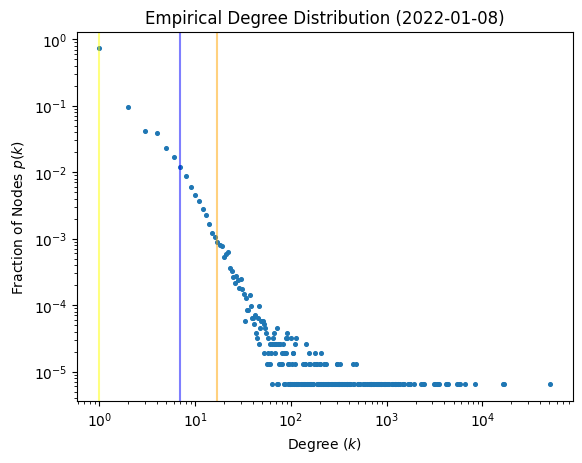

In [15]:
#ScatterPlot of empirical distribution
plt.scatter(x,y,s=7, label="Empirical Degree Distribution")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree ($k$)")
plt.ylabel("Fraction of Nodes $p(k)$")
plt.title("Empirical Degree Distribution (2022-01-08)")
#median
plt.axvline(np.median(g_deg), color="yellow", alpha=0.5)
#95-Percentil
plt.axvline(np.percentile(g_deg, 95), color="blue", alpha=0.5)
#99%-percentile
plt.axvline(np.percentile(g_deg, 99), color="orange", alpha=0.5)
plt.savefig(path_plots+"Empirical Degree Distribution_Scatter.png", bbox_inches='tight')
plt.show()


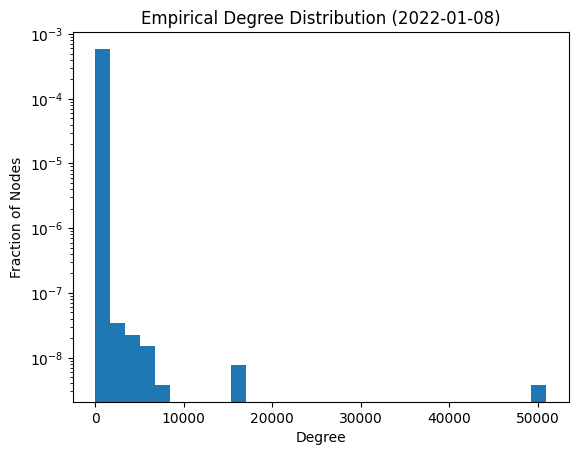

In [16]:
#Histogram of empirical distribution
plt.hist(g_deg, bins =30,density=True)
plt.title("Empirical Degree Distribution (2022-01-08)")
plt.yscale("log")
plt.ylabel("Fraction of Nodes")
plt.xlabel("Degree")
plt.savefig(path_plots+"Empirical Degree Distribution_Histogram.png", bbox_inches='tight')
plt.show()


# Centrality

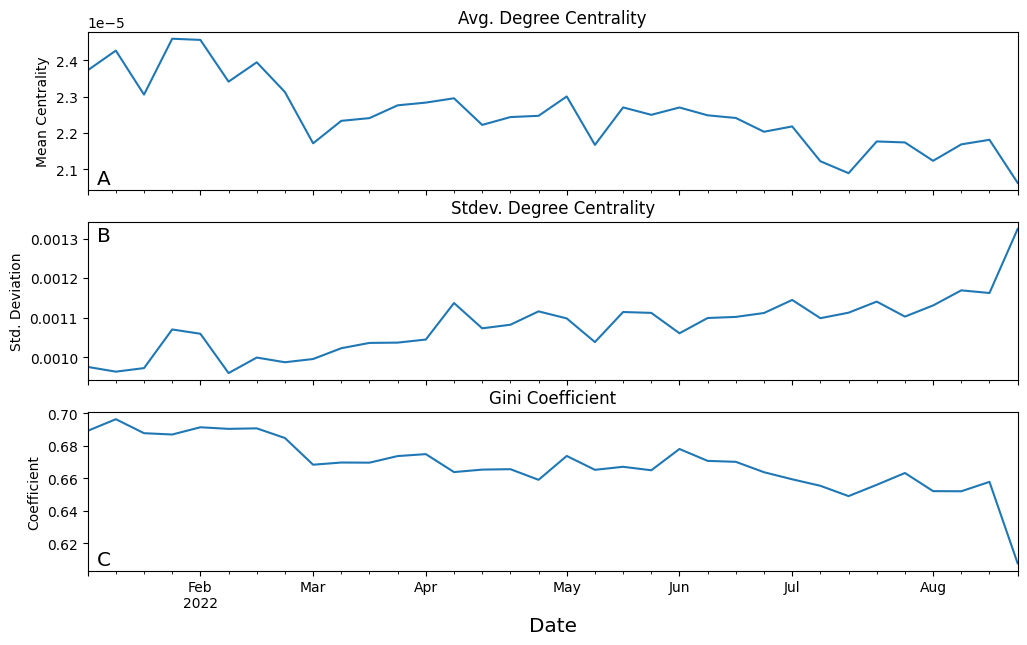

In [17]:
#Degree Cengrality
figsize = (12, 7)
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
#fig.suptitle("Degree Centrality")
df_centrality.plot(x="date", y="mean_centrality", ax=ax1, figsize=figsize, legend=None, title="Avg. Degree Centrality", ylabel="Mean Centrality")
df_centrality.plot(x="date", y="std_centrality", ax=ax2, figsize=figsize, legend=None, title="Stdev. Degree Centrality", ylabel="Std. Deviation")
df_centrality.plot(x="date", y="gini_coefficient", ax=ax3, figsize=figsize, legend=None, title="Gini Coefficient", ylabel="Coefficient")

#ax1.set_yscale("log")
#ax1.set_yticks([1.3e5, 1.4e5, 1.5e5, 1.6e5])
ax1.text(0.01, 0.01, "A", size= "x-large", horizontalalignment='left', verticalalignment='bottom', transform=ax1.transAxes)
#ax2.set_yscale("log")
ax2.set_yticks([1e-3, 1.1e-3,1.2e-3,1.3e-3])
ax2.text(0.01, 0.85, "B", size= "x-large", horizontalalignment='left', verticalalignment='bottom', transform=ax2.transAxes)
#ax3.set_yscale("log")
ax3.text(0.01, 0.01, "C", size= "x-large", horizontalalignment='left', verticalalignment='bottom', transform=ax3.transAxes)

ax3.set_xlabel('Date', size="x-large")
plt.savefig(path_plots+"Degree Centrality.png", bbox_inches='tight')
plt.show()


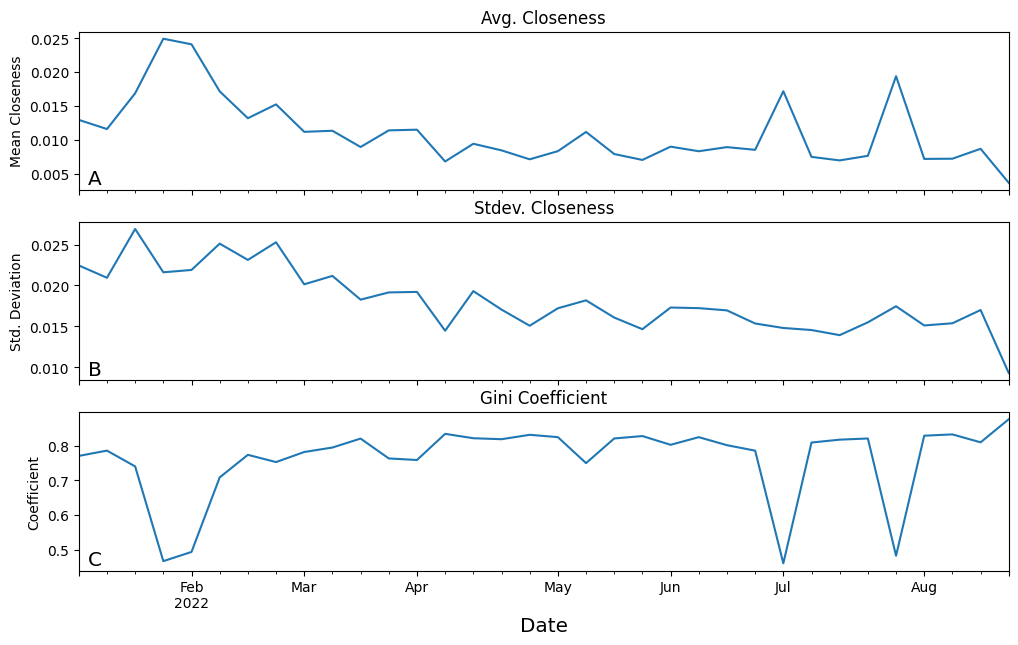

In [18]:
#Closeness
figsize = (12, 7)
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
#fig.suptitle("Closeness")
df_closeness.plot(x="date", y="mean_closeness", ax=ax1, figsize=figsize, legend=None, title="Avg. Closeness", ylabel="Mean Closeness")
df_closeness.plot(x="date", y="std_closeness", ax=ax2, figsize=figsize, legend=None, title="Stdev. Closeness", ylabel="Std. Deviation")
df_closeness.plot(x="date", y="gini_coefficient", ax=ax3, figsize=figsize, legend=None, title="Gini Coefficient", ylabel="Coefficient")

#ax1.set_yscale("log")
#ax1.set_yticks([1.3e5, 1.4e5, 1.5e5, 1.6e5])
ax1.text(0.01, 0.01, "A", size= "x-large", horizontalalignment='left', verticalalignment='bottom', transform=ax1.transAxes)
#ax2.set_yscale("log")
#ax2.set_yticks([1e-3, 1.1e-3,1.2e-3,1.3e-3])
ax2.text(0.01, 0.01, "B", size= "x-large", horizontalalignment='left', verticalalignment='bottom', transform=ax2.transAxes)
#ax3.set_yscale("log")
ax3.text(0.01, 0.01, "C", size= "x-large", horizontalalignment='left', verticalalignment='bottom', transform=ax3.transAxes)

ax3.set_xlabel('Date', size="x-large")
plt.savefig(path_plots+"Closeness.png", bbox_inches='tight')
plt.show()


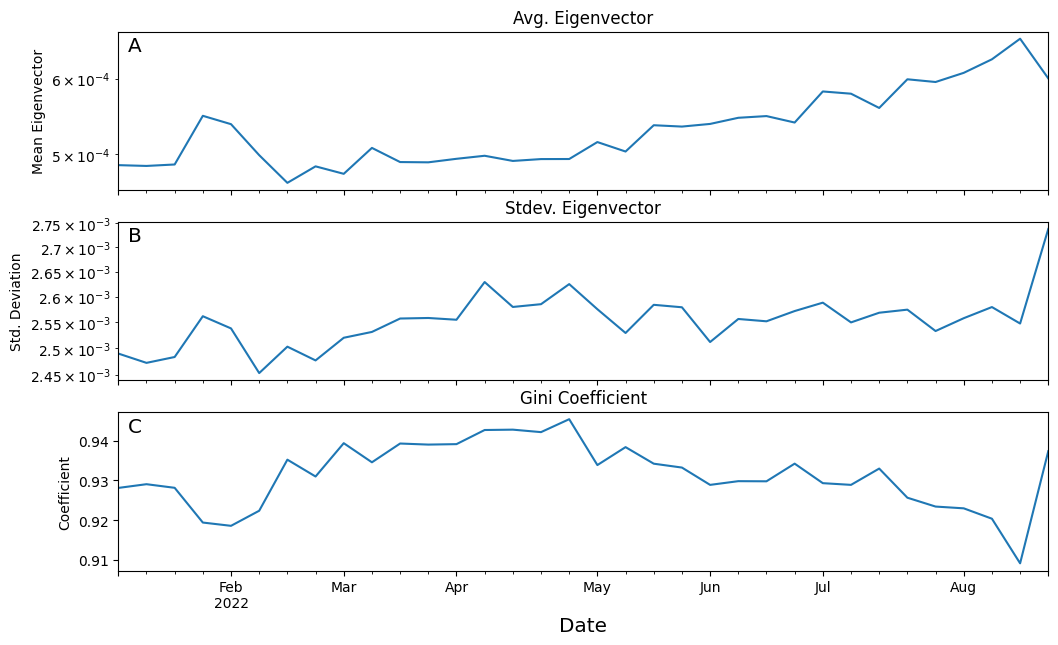

In [19]:
#Eigenvector
figsize = (12, 7)
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
#fig.suptitle("Eigenvector")
df_eigenvector.plot(x="date", y="mean_eigenvector", ax=ax1, figsize=figsize, legend=None, title="Avg. Eigenvector", ylabel="Mean Eigenvector")
df_eigenvector.plot(x="date", y="std_eigenvector", ax=ax2, figsize=figsize, legend=None, title="Stdev. Eigenvector", ylabel="Std. Deviation")
df_eigenvector.plot(x="date", y="gini_coefficient", ax=ax3, figsize=figsize, legend=None, title="Gini Coefficient", ylabel="Coefficient")

ax1.set_yscale("log")
#ax1.set_yticks([1.3e5, 1.4e5, 1.5e5, 1.6e5])
ax1.text(0.01, 0.85, "A", size= "x-large", horizontalalignment='left', verticalalignment='bottom', transform=ax1.transAxes)
ax2.set_yscale("log")
#ax2.set_yticks([1e-3, 1.1e-3,1.2e-3,1.3e-3])
ax2.text(0.01, 0.85, "B", size= "x-large", horizontalalignment='left', verticalalignment='bottom', transform=ax2.transAxes)
#ax3.set_yscale("log")
ax3.text(0.01, 0.85, "C", size= "x-large", horizontalalignment='left', verticalalignment='bottom', transform=ax3.transAxes)

ax3.set_xlabel('Date', size="x-large")
plt.savefig(path_plots+"Eigenvector.png", bbox_inches='tight')
plt.show()


## Attributes

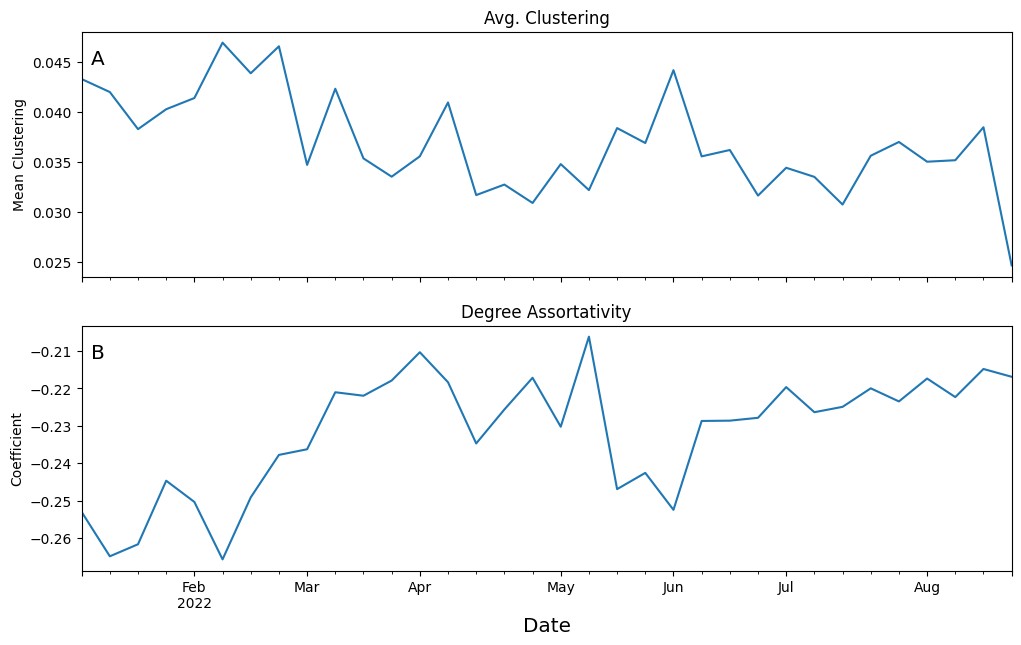

In [20]:
#Eigenvector
figsize = (12, 7)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
#fig.suptitle("Attributes")
df_attributes.plot(x="date", y="avg_clustering", ax=ax1, figsize=figsize, legend=None, title="Avg. Clustering", ylabel="Mean Clustering")
df_attributes.plot(x="date", y="degree_assortativity", ax=ax2, figsize=figsize, legend=None, title="Degree Assortativity", ylabel="Coefficient")

#ax1.set_yscale("log")
#ax1.set_yticks([1.3e5, 1.4e5, 1.5e5, 1.6e5])
ax1.text(0.01, 0.85, "A", size= "x-large", horizontalalignment='left', verticalalignment='bottom', transform=ax1.transAxes)
#ax2.set_yscale("log")
#ax2.set_yticks([1e-3, 1.1e-3,1.2e-3,1.3e-3])
ax2.text(0.01, 0.85, "B", size= "x-large", horizontalalignment='left', verticalalignment='bottom', transform=ax2.transAxes)

ax2.set_xlabel('Date', size="x-large")
plt.savefig(path_plots+"Attributes.png", bbox_inches='tight')
plt.show()
